# EDA

In [ ]:
import warnings
from IPython.display import display, HTML

In [ ]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package load

In [1]:
from timeit import timeit

import os
import time
import datetime
import glob
import urllib
import platform

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats
import pingouin as pg

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

## Settings

In [4]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    # import matplotlib.font_manager as fm
    # fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

In [5]:
### 코드 실행시간 측정
timeit("time.sleep(1)", number=2, globals=globals())

2.008180563

In [6]:
start = time.time() # 시작
time.sleep(1) # 수행시간 측정하고자 하는 코드 부분
sec = time.time() - start # 종료 - 시작 (걸린 시간)
 
times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
short = times.split(".")[0] # 초 단위 까지만
print(f"{times} sec")
print(f"{short} sec")

0:00:01.000427 sec
0:00:01 sec


In [7]:
%%time
time.sleep(1)

CPU times: user 982 µs, sys: 1.29 ms, total: 2.28 ms
Wall time: 1 s


In [8]:
%%timeit
time.sleep(1)

1 s ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Data load

In [9]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

boston = pd.read_csv('./data/housing.csv')

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

airline_stats = pd.read_csv("./Practical_Statictics/data/airline_stats.csv")
sp500_sym = pd.read_csv("./Practical_Statictics/data/sp500_sectors.csv")
sp500_px = pd.read_csv("./Practical_Statictics/data/sp500_data.csv.gz", index_col=0)
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

kc_tax = pd.read_csv("./Practical_Statictics/data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]

fish_multi = pd.read_csv("./stats_for_python/3-3-2-fish_multi_2.csv")
cov_data = pd.read_csv("./stats_for_python/3-2-3-cov.csv")
diamond = pd.read_csv('./r_csv/ggplot2/diamonds.csv', index_col='Unnamed: 0')
chicken = pd.read_csv('./r_csv/datasets/ChickWeight.csv', index_col='Unnamed: 0')
mtcars = pd.read_csv('./r_csv/datasets/mtcars.csv', index_col='Unnamed: 0')
economics = pd.read_csv('./r_csv/ggplot2/economics.csv', index_col='Unnamed: 0')
eurodist = pd.read_csv('./r_csv/datasets/eurodist.csv', index_col='city')
usarrests = pd.read_csv('./r_csv/datasets/USArrests.csv', index_col='Unnamed: 0')
titanic = pd.read_csv('./ADP_book_ver01/data/titanic.csv')
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')

line_sample_x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
line_sample_y = np.array([2, 3, 4, 3, 5, 4, 6, 7, 4, 8])
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

time = pd.DataFrame({"time": [7000, 6800, 6600, 6400, 6200, 6000, 5800, 5600, 5400, 5200, 5000, 4800, 4600, 4400, 4200, 4000, 3800, 3600, 3400],
                     "pop": [200, 400, 450, 500, 300, 100, 400, 700, 830, 1200, 400, 350, 200, 700, 370, 800, 200, 100, 120], 
                     "grp": [2, 5, 8, 3, 2, 2, 4, 7, 9, 4, 4, 2, 2, 7, 5, 12, 5, 4, 4],
                     "med": [1.2, 1.3, 1.2, 0.9, 2.1, 1.4, 2.9, 3.4, 2.1, 1.1, 1.2, 1.5, 1.2, 0.9, 0.5, 3.3, 2.2, 1.1, 1.2]})

score = pd.Series([1, 2, 3, 4, 10, 2, 30, 42, 31, 50, 80, 76, 90, 87, 21, 43, 65, 76, 32, 12, 34, 54])

students = pd.DataFrame({'이름':['장화', '홍련', '콩쥐', '팥쥐', '해님', '달님'], 
                         '국어': [70, 85, None, 100, None, 85], 
                         '수학':[65, 100, 80, 95, None, 70]})

health = pd.DataFrame({'연도': [2017, 2018, 2019, 2020, 2021, 2022], 
                       '키': [160, 162, 165, None, None, 166],
                       '몸무게': [53, 52, None, 50, 51, 54],
                       '시력': [1.2, None, 1.2, 1.2, 1.1, 0.8],
                       '병결': [None, None, None, 2, None, 1]})

subject = pd.DataFrame({"korean": [85, 75, 65, 78, 59, 60, 90, 100, 99, 91, 70],
                        "math": [80, 60, 75, 40, 50, 64, 70, 78, 90, 58, 50],
                        "english": [80, 70, 69, 79, 80, 95, 98, 97, 67, 80, 59],
                        "science": [90, 100, 50, 80, 67, 89 ,60, 79, 89, 80, 100]})

faithful = pd.read_csv('./r_csv/datasets/faithful.csv', index_col='Unnamed: 0')

ramen = pd.DataFrame({"면": [2, 1, 5, 2, 3, 4, 4, 1, 3, 5],
                      "그릇": [4, 5, 3, 2, 5, 3, 4, 2, 3, 5],
                      "국물": [5, 1, 4, 3, 5, 2, 3, 1, 2, 3]},
                     index=["쇠고기라면", "해물라면", "얼큰라면", "떡라면", "짬뽕라면", "만두라면", "치즈라면", "된장라면", "볶음라면", "김치라면"])

computer = pd.DataFrame({"Price": [6, 7, 6, 5, 7, 6, 5, 6, 3, 1, 2, 5, 2, 3, 1, 2], 
                         "Software": [5, 3, 4, 7, 7, 4, 7, 5, 5, 3, 6, 7, 4, 5, 6, 3],
                         "Aesthetics": [3, 2, 4, 1, 5, 2, 2, 4, 6, 7, 6, 7, 5, 6, 5, 7],
                         "Brand": [4, 2, 5, 3, 5, 3, 1, 4, 7, 5, 7, 6, 6, 5, 5, 7]})

arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
birth_data = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
ldeaths = pd.read_csv('./r_csv/datasets/ldeaths.csv').drop('Unnamed: 0', axis=1)
text_df = pd.read_csv('./data/chatgpt.csv')

## Processing
- Data preprocessing 기법

### (1) Missing Value

#### Find NA

In [116]:
titanic_df.isna().head(3)

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False

In [117]:
students.isna()

이름     국어     수학
0  False  False  False
1  False  False  False
2  False   True  False
3  False  False  False
4  False   True   True
5  False  False  False

In [118]:
students.notna()

이름     국어     수학
0  True   True   True
1  True   True   True
2  True  False   True
3  True   True   True
4  True  False  False
5  True   True   True

In [119]:
# !pip install missingno
import missingno as msno

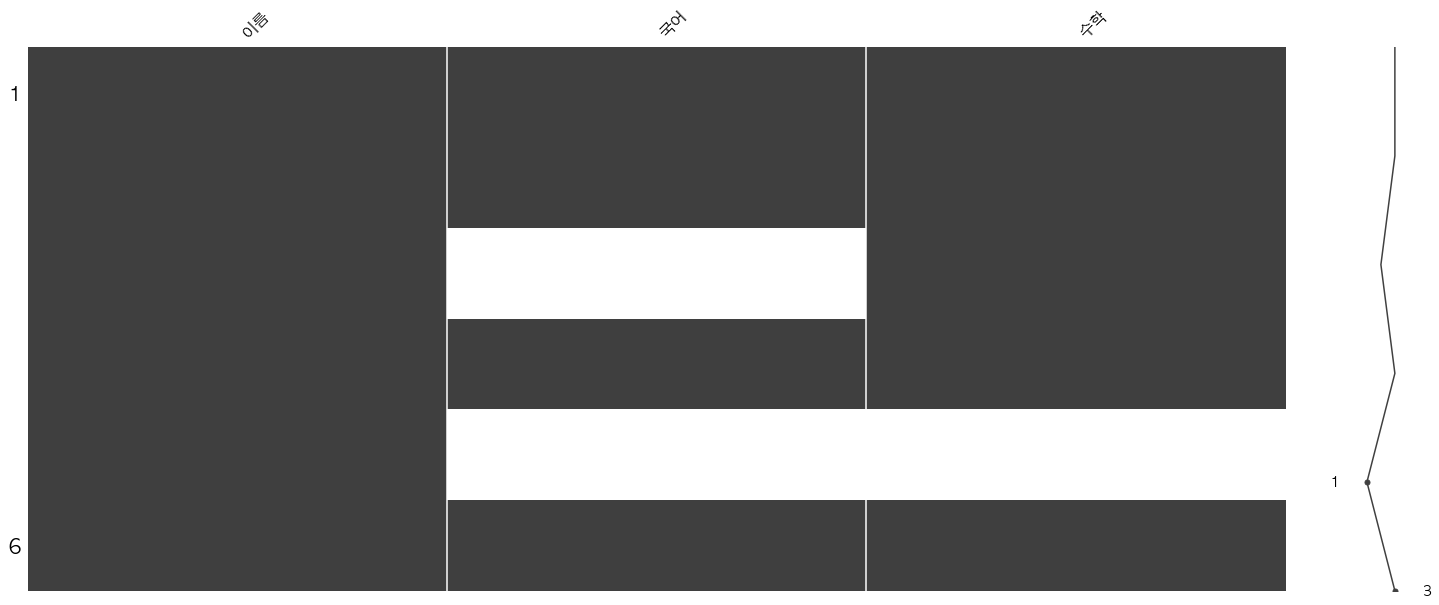

In [120]:
### Missingmap
# 큰 데이터의 missing 확인에 유용
msno.matrix(students)
plt.show()

In [121]:
### column 별 NA 개수
students.isna().sum()

이름    0
국어    2
수학    1
dtype: int64

In [122]:
### row 별 NA 개수
students.isna().sum(1)

0    0
1    0
2    1
3    0
4    2
5    0
dtype: int64

In [123]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Drop NA

In [125]:
students.dropna() # 결측 행 삭제, axis 변수 또는 'index'/'columns'으로 행/열 조정 가능

이름     국어     수학
0  장화   70.0   65.0
1  홍련   85.0  100.0
3  팥쥐  100.0   95.0
5  달님   85.0   70.0

In [126]:
students.dropna(thresh=2) # 결측값 아닌 개수 지정

이름     국어     수학
0  장화   70.0   65.0
1  홍련   85.0  100.0
2  콩쥐    NaN   80.0
3  팥쥐  100.0   95.0
5  달님   85.0   70.0

In [127]:
students.dropna(subset=['수학']) # subset에 NA가 있는 경우 제거

이름     국어     수학
0  장화   70.0   65.0
1  홍련   85.0  100.0
2  콩쥐    NaN   80.0
3  팥쥐  100.0   95.0
5  달님   85.0   70.0

In [128]:
students.dropna(how='all', subset=['국어', '수학']) # 국어, 수학이 모두 NA이면 삭제

이름     국어     수학
0  장화   70.0   65.0
1  홍련   85.0  100.0
2  콩쥐    NaN   80.0
3  팥쥐  100.0   95.0
5  달님   85.0   70.0

In [129]:
students.dropna(how='any') # 한 컬럼 이상이면 삭제

이름     국어     수학
0  장화   70.0   65.0
1  홍련   85.0  100.0
3  팥쥐  100.0   95.0
5  달님   85.0   70.0

#### Fill NA

In [130]:
### 값 채우기
students.fillna(value=0)

이름     국어     수학
0  장화   70.0   65.0
1  홍련   85.0  100.0
2  콩쥐    0.0   80.0
3  팥쥐  100.0   95.0
4  해님    0.0    0.0
5  달님   85.0   70.0

In [131]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [132]:
health # original table

연도      키   몸무게   시력   병결
0  2017  160.0  53.0  1.2  NaN
1  2018  162.0  52.0  NaN  NaN
2  2019  165.0   NaN  1.2  NaN
3  2020    NaN  50.0  1.2  2.0
4  2021    NaN  51.0  1.1  NaN
5  2022  166.0  54.0  0.8  1.0

In [133]:
health.fillna(0)

연도      키   몸무게   시력   병결
0  2017  160.0  53.0  1.2  0.0
1  2018  162.0  52.0  0.0  0.0
2  2019  165.0   0.0  1.2  0.0
3  2020    0.0  50.0  1.2  2.0
4  2021    0.0  51.0  1.1  0.0
5  2022  166.0  54.0  0.8  1.0

In [134]:
health.fillna(health.mean()) # 평균으로 채우기

연도       키   몸무게   시력   병결
0  2017  160.00  53.0  1.2  1.5
1  2018  162.00  52.0  1.1  1.5
2  2019  165.00  52.0  1.2  1.5
3  2020  163.25  50.0  1.2  2.0
4  2021  163.25  51.0  1.1  1.5
5  2022  166.00  54.0  0.8  1.0

In [135]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [136]:
### column별 NA 채우기
health['병결'] = health['병결'].fillna(0)
health['몸무게'] = health['몸무게'].fillna(health['몸무게'].mean())
health

연도      키   몸무게   시력   병결
0  2017  160.0  53.0  1.2  0.0
1  2018  162.0  52.0  NaN  0.0
2  2019  165.0  52.0  1.2  0.0
3  2020    NaN  50.0  1.2  2.0
4  2021    NaN  51.0  1.1  0.0
5  2022  166.0  54.0  0.8  1.0

In [137]:
### pad/ffill, backfill/bfill
health.fillna(method='pad', inplace=True) # 직전 값으로 대체. ffill 옵션도 동일한 결과. 그리고 원본 데이터를 반영 (inplace)
health

연도      키   몸무게   시력   병결
0  2017  160.0  53.0  1.2  0.0
1  2018  162.0  52.0  1.2  0.0
2  2019  165.0  52.0  1.2  0.0
3  2020  165.0  50.0  1.2  2.0
4  2021  165.0  51.0  1.1  0.0
5  2022  166.0  54.0  0.8  1.0

In [138]:
### 새로운 feature 만들기 (is_na 등)
np.where(health['키'].isna(), 1, 0)

array([0, 0, 0, 0, 0, 0])

In [139]:
from sklearn.impute import SimpleImputer

In [140]:
### Imputer: 모든 수치형 변수에 적용
imputer = SimpleImputer(strategy="median")

In [141]:
housing_num = housing.drop("ocean_proximity", axis=1) # 수치 변수만 추출
imputer.fit(housing_num) 
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [142]:
housing_num.median().values # imputer가 저장하고 있는 것과 동일

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [143]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [144]:
### 모델로 결측값 예측
#KNN, DNN, Stochastic regression, Extrapolation & Interpolation

In [145]:
from sklearn.impute import KNNImputer

In [146]:
### KNN Imputation
# 수치형 변수에만 사용 가능
imputer = KNNImputer()

In [147]:
x = imputer.fit_transform(housing_num) # fit and transform
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [148]:
diabetes = pd.read_csv('./data/diabetes.csv')

# 0이 되면 안되는 변수들 선택
diabetes.loc[diabetes["Glucose"]==0.0, "Glucose"] = np.NAN
diabetes.loc[diabetes["BloodPressure"]==0.0, "BloodPressure"] = np.NAN
diabetes.loc[diabetes["SkinThickness"]==0.0, "SkinThickness"] = np.NAN
diabetes.loc[diabetes["Insulin"]==0.0, "Insulin"] = np.NAN
diabetes.loc[diabetes["BMI"]==0.0, "BMI"] = np.NAN

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [149]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [150]:
for feature in missing_columns:
    diabetes[feature + '_imp'] = diabetes[feature]

    number_missing = diabetes[feature].isnull().sum()
    observed_values = diabetes.loc[diabetes[feature].notnull(), feature]
    diabetes.loc[diabetes[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace=True)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
### Regression imputation
# 변수의 분산을 줄인다는 단점이 있음
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
    deter_data["Det" + feature] = diabetes[feature + "_imp"]
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[diabetes[feature].isnull(), "Det" + feature] = model.predict(diabetes[parameters])[diabetes[feature].isnull()]

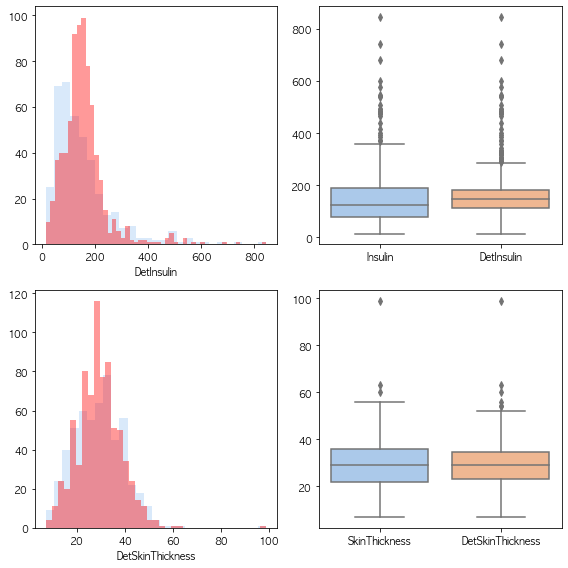

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde=False, ax=axes[index, 0], color='red') 
    sns.boxplot(data = pd.concat([diabetes[variable], deter_data["Det" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

In [154]:
### Single Stochastic Imputation
random_data = pd.DataFrame(columns=["Ran" + name for name in missing_columns])

for feature in missing_columns:
    random_data["Ran" + feature] = diabetes[feature + '_imp']
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(diabetes[parameters])
    std_error = (predict[diabetes[feature].notnull()] - diabetes.loc[diabetes[feature].notnull(), feature + '_imp']).std()
    
    # observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size=diabetes[feature].shape[0], loc = predict, scale = std_error)
    random_data.loc[(diabetes[feature].isnull()) & (random_predict > 0),
                    "Ran" + feature] = random_predict[(diabetes[feature].isnull()) & (random_predict > 0)]

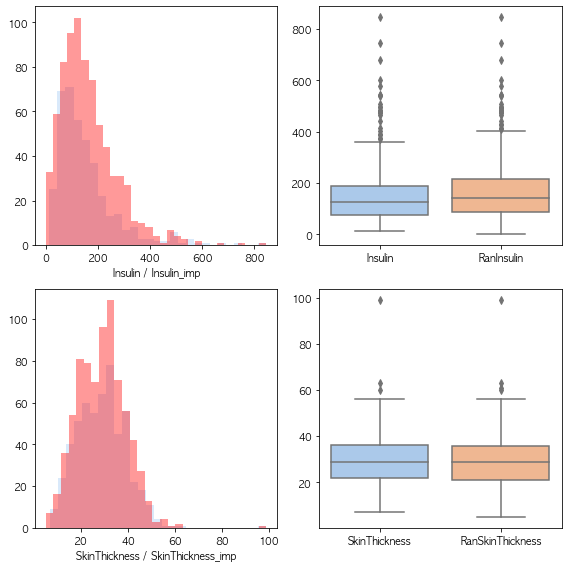

In [155]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde=False, ax=axes[index, 0], color='red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    sns.boxplot(data = pd.concat([diabetes[variable], random_data["Ran" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

### (2) Duplicates

In [156]:
### 중복 삭제
health['키'].drop_duplicates().tolist()

[160.0, 162.0, 165.0, 166.0]

In [157]:
set(health['키'])

{160.0, 162.0, 165.0, 166.0}

In [158]:
health[['시력','병결']].drop_duplicates() # 모든 컬럼이 같은 경우에만 제거

시력   병결
0  1.2  0.0
3  1.2  2.0
4  1.1  0.0
5  0.8  1.0

In [159]:
health.drop_duplicates(subset=['시력']) # 특정 컬럼 기준 drop

연도      키   몸무게   시력   병결
0  2017  160.0  53.0  1.2  0.0
4  2021  165.0  51.0  1.1  0.0
5  2022  166.0  54.0  0.8  1.0

In [160]:
health

연도      키   몸무게   시력   병결
0  2017  160.0  53.0  1.2  0.0
1  2018  162.0  52.0  1.2  0.0
2  2019  165.0  52.0  1.2  0.0
3  2020  165.0  50.0  1.2  2.0
4  2021  165.0  51.0  1.1  0.0
5  2022  166.0  54.0  0.8  1.0

In [161]:
# find duplicates
health[health.duplicated(subset=['시력', '병결'], keep='first')]

연도      키   몸무게   시력   병결
1  2018  162.0  52.0  1.2  0.0
2  2019  165.0  52.0  1.2  0.0

In [162]:
# find all duplicates (include first)
pd.concat([health[health.duplicated(subset=['시력', '병결'], keep='first')], 
           health[health.duplicated(subset=['시력', '병결'], keep='last')]]).drop_duplicates()

연도      키   몸무게   시력   병결
1  2018  162.0  52.0  1.2  0.0
2  2019  165.0  52.0  1.2  0.0
0  2017  160.0  53.0  1.2  0.0

### (3) Outlier

#### Outlier detect

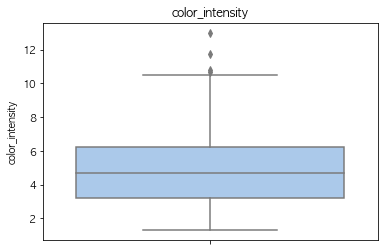

In [163]:
### Boxplot 확인
sns.boxplot(y=wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [164]:
### Outlier detect function
def outliers_iqr(df, column):
    quartile_1, quartile_3 = np.percentile(df[column], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    
    outliers = df[(df[column] > upper_whis) | (df[column] < lower_whis)]
    
    return outliers[[column]]

In [165]:
outliers = outliers_iqr(df=wine, column='color_intensity')
outliers

color_intensity
151            10.80
158            13.00
159            11.75
166            10.68

In [166]:
### DBSCAN
# -1로 클러스터링 된 데이터를 outlier로 함
# DBSCAN 부분 참고

#### Outlier cleansing

In [167]:
### Trimming
# Outlier 삭제
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [168]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN # Outlier를 NA로 만든 다음, 대체
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean()) # 평균 치환
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [169]:
### Winsorizing (조정), Clipping
# 상/하한을 정하고, 넘는 값을 상/하한으로 조정

In [170]:
from scipy.stats.mstats import winsorize

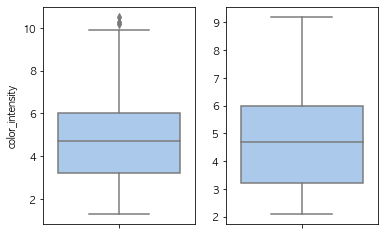

In [171]:
winsorized = winsorize(wine['color_intensity'], (0.05, 0.05))

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=wine['color_intensity'], ax=axes[0])
sns.boxplot(y=winsorized, ax=axes[1])
plt.show()

### (4) Categorical data
- 범주형 변수의 수학적 연산이 가능하게끔 함: Dummy 변수 생성
- Label(Ordinal) encoding, One-hot encoding
- LabelBinarizer는 sparse matrix의 One-hot encoding에 사용

In [172]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

#### LabelEncoder, OrdinalEncoder
- cat -> num
- target을 숫자로 변환하는 데 용이하며, ML 모델에 사용하기에는 적합하지 않음

In [173]:
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [174]:
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [175]:
### OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

#### LabelBinarizer
- Sparse One-hot encoding

In [176]:
lb = LabelBinarizer(sparse_output=True)
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer(sparse_output=True)

In [177]:
lb.classes_

array([1, 2, 4, 6])

In [178]:
lb.transform([1, 6]).toarray()

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

In [179]:
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))
lb.classes_

array([0, 1, 2])

In [180]:
lb.transform([0, 1, 2, 1]).toarray()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

#### One-hot encoder

In [181]:
encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [182]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [183]:
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [184]:
# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [185]:
### get_dummies
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
dummy_col = pd.get_dummies(df)
dummy_col

item_TV  item_냉장고  item_믹서  item_선풍기  item_전자레인지  item_컴퓨터
0        1         0        0         0           0         0
1        0         1        0         0           0         0
2        0         0        0         0           1         0
3        0         0        0         0           0         1
4        0         0        0         1           0         0
5        0         0        0         1           0         0
6        0         0        1         0           0         0
7        0         0        1         0           0         0

In [186]:
# 생성된 dummy의 T/F를 1/0으로 변경
for col in dummy_col:
    dummy_col[col] = np.where(dummy_col[col], 1, 0)
    
pd.get_dummies(iris, columns=['Class'])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Class_Setosa  Class_Versicolour  Class_Virginica  
0               1                  0                0  
1               1                  0                0  
2               1                  0                0  
3               1                  0                0  
4               1                  0                0  
..            ...                ...              ...  
145             0                  0                1  
146             0                  0                1  
147             0                  0                1  
148             0                  0                1  
149             0                  0                1  

[150 rows x 7 columns]

In [187]:
pd.get_dummies(iris, columns=['Class'], drop_first=True)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Class_Versicolour  Class_Virginica  
0                    0                0  
1                    0                0  
2                    0                0  
3                    0                0  
4                    0                0  
..                 ...              ...  
145                  0                1  
146                  0                1  
147                  0                1  
148                  0                1  
149                  0                1  

[150 rows x 6 columns]

#### Frequency Encoding
- Category의 빈도에 따른 encoding
- 중복되는 값이 나올 수 있음

In [188]:
df.groupby('item').size() / len(df)

item
TV       0.125
냉장고      0.125
믹서       0.250
선풍기      0.250
전자레인지    0.125
컴퓨터      0.125
dtype: float64

#### Target Encoding
- 특정 컬럼의 요약 값에 따른 encoding
- Frequency 방법의 확장판 

In [189]:
# sepal length의 평균에 따른 encoding
iris.groupby('Class')['sepal length (cm)'].mean()

Class
Setosa         5.006
Versicolour    5.936
Virginica      6.588
Name: sepal length (cm), dtype: float64

#### Feature Hashing
- FeatureHasher: Hashed array 반환

In [190]:
from sklearn.feature_extraction import FeatureHasher

In [191]:
h = FeatureHasher(n_features=10)

D = [{'dog': 1, 'cat':2, 'elephant':4}, {'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [192]:
h = FeatureHasher(n_features=8, input_type="string")

raw_x = [["dog", "cat", "snake"], ["snake", "dog"], ["cat", "bird"]]

f = h.transform(raw_x)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.]])

### (5) Data Split
- ML 모델에서는 7:3또는 6:2:2가 권장되나, 최근 train 비율을 더 높이기도 함
- Cross-Validation 기법

#### Holdout

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
# train_test_split(x, y, test_size, random_state, shuffle, stratify)
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [195]:
x_train.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
24                4.8               3.4                1.9               0.2
1                 4.9               3.0                1.4               0.2
15                5.7               4.4                1.5               0.4

In [196]:
y_train.head(3)

24    Setosa
1     Setosa
15    Setosa
Name: Class, dtype: object

In [197]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [198]:
y_train.value_counts() # class 불균형

Setosa         42
Virginica      41
Versicolour    37
Name: Class, dtype: int64

#### Stratified split

In [199]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris['Class'])
print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [200]:
y_train.value_counts()

Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64

#### Shuffle split

In [201]:
from sklearn.model_selection import ShuffleSplit

In [202]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print(rs)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)


In [203]:
for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0 4]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2 5]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4 0]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1 0]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1 0]
  Test:  index=[2 4]


In [204]:
# Specify train and test size
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=0)

for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1]
  Test:  index=[2 4]


#### Cross-validation

##### K-Fold

In [205]:
from sklearn.model_selection import KFold

In [206]:
kf = KFold(n_splits=5)
kf.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [207]:
iris_features = iris.drop(columns='Class', axis=1)
iris_label = iris['Class']

for i, (train_index, test_index) in enumerate(kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

Fold 0:
  Train: index=[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 1

##### Stratified K-Fold

In [208]:
from sklearn.model_selection import StratifiedKFold

In [209]:
s_kf = StratifiedKFold(n_splits=5)
s_kf.get_n_splits(X=iris_features, y=iris_label)
s_kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [210]:
for i, (train_index, test_index) in enumerate(s_kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]
    
    print('학습 레이블 데이터 분포:\n', y_train.value_counts())
    print('검증 레이블 데이터 분포:\n', y_test.value_counts())

Fold 0:
  Train: index=[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
학습 레이블 데이터 분포:
 Setosa         40
Versicolour    40
Virginica      40
Name: Class, dtype: int64
검증 레이블 데이터 분포:
 Setosa         10
Versicolour    10
Virginica      10
Name: Class, dtype: int64
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  4

##### Group K-Fold

In [211]:
from sklearn.model_selection import GroupKFold

In [212]:
x = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
gkf.get_n_splits(x, y, groups)

3

In [213]:
for train_index, test_index in gkf.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1 2 3 4 5] TEST: [6 7 8 9]
x_train: [0.1  0.2  2.2  2.4  2.3  4.55] 
x_test: [ 5.8  8.8  9.  10. ]
y_train: ['a' 'b' 'b' 'b' 'c' 'c'] 
y_test: ['c' 'd' 'd' 'd']
TRAIN: [0 1 2 6 7 8 9] TEST: [3 4 5]
x_train: [ 0.1  0.2  2.2  5.8  8.8  9.  10. ] 
x_test: [2.4  2.3  4.55]
y_train: ['a' 'b' 'b' 'c' 'd' 'd' 'd'] 
y_test: ['b' 'c' 'c']
TRAIN: [3 4 5 6 7 8 9] TEST: [0 1 2]
x_train: [ 2.4   2.3   4.55  5.8   8.8   9.   10.  ] 
x_test: [0.1 0.2 2.2]
y_train: ['b' 'c' 'c' 'c' 'd' 'd' 'd'] 
y_test: ['a' 'b' 'b']


In [214]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

groups = np.array([0, 0, 2, 2])
group_kfold = GroupKFold(n_splits=2)

group_kfold.get_n_splits(x, y, groups)

print(group_kfold)

GroupKFold(n_splits=2)


In [215]:
for train_index, test_index in group_kfold.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1] TEST: [2 3]
x_train: [[1 2]
 [3 4]] 
x_test: [[5 6]
 [7 8]]
y_train: [1 2] 
y_test: [3 4]
TRAIN: [2 3] TEST: [0 1]
x_train: [[5 6]
 [7 8]] 
x_test: [[1 2]
 [3 4]]
y_train: [3 4] 
y_test: [1 2]


In [216]:
group_kfold.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
group_kfold

GroupKFold(n_splits=2)

### (6) Scaling
- 표준화 (Standardization): 표준정규분포화
- 정규화 (Normalization): 범위 지정 (보통 0-1)

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import QuantileTransformer

In [218]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

#### Standard
- Classification에서 유용

In [219]:
std_scaler = StandardScaler()

x_train_sc = std_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = std_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.39, 3.02) (-0.00, 1.00)
Test_scaled (-1.92, 2.37) (0.11, 1.05)


In [220]:
#scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.733014         -0.361035           0.336976          0.170904
1           1.237816          0.315906           1.256002          1.502624
2           0.606814          0.767199           1.083685          1.635796
3          -0.907591          0.992846          -1.328758         -1.160816
4           0.606814          0.541552           1.313441          1.768968

#### MinMax
- Regression에서 유용

In [221]:
mm_scaler = MinMaxScaler()

x_train_sc = mm_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = mm_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.44, 0.26)
Test_scaled (-0.03, 0.97) (0.47, 0.28)


In [222]:
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.571429          0.375000           0.559322          0.500000
1           0.685714          0.500000           0.830508          0.916667
2           0.542857          0.583333           0.779661          0.958333
3           0.200000          0.625000           0.067797          0.083333
4           0.542857          0.541667           0.847458          1.000000

#### MaxAbs

In [223]:
ma_scaler = MaxAbsScaler()

x_train_sc = ma_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = ma_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.61, 0.24)
Test_scaled (0.04, 0.97) (0.63, 0.24)


#### Robust
- 이상치가 있는 데이터의 경우
- quantile_range 파라미터 조정 가능 (default [0.25, 0.75])

In [224]:
robust_scaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
x_train_sc = robust_scaler.fit_transform(x_train)
x_test_sc = robust_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.67, 2.33) (-0.02, 0.60)
Test_scaled (-1.17, 1.50) (0.04, 0.62)


#### Quantile
- output_discribution -> uniform, normal

In [225]:
q_scaler = QuantileTransformer()

x_train_sc = q_scaler.fit_transform(x_train)
x_test_sc = q_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.50, 0.29)
Test_scaled (0.00, 0.99) (0.53, 0.31)


#### Scale revert

In [226]:
x_original = q_scaler.inverse_transform(x_train_sc)
pd.DataFrame(x_original).head(3)

0    1    2    3
0  6.4  2.9  4.3  1.3
1  6.8  3.2  5.9  2.3
2  6.3  3.4  5.6  2.4

In [227]:
x_test.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
120                6.9               3.2                5.7               2.3
107                7.3               2.9                6.3               1.8
99                 5.7               2.8                4.1               1.3
52                 6.9               3.1                4.9               1.5
63                 6.1               2.9                4.7               1.4

#### Scale and split
- train data에 fit, test data는 train 기준으로 변환 (권장)
- 변환 수행 후 분할

In [228]:
# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [229]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [230]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [231]:
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


### (7) Transformation

#### Log Transformation
- Skewness 감소, 이상치 영향 감소 효과
- Target(y)에 적용 시 성능 증가 효과

In [232]:
### mercari price data
mercari_df = pd.read_csv('./data/mercari_train.tsv', sep='\t')
y_train_df = mercari_df['price']

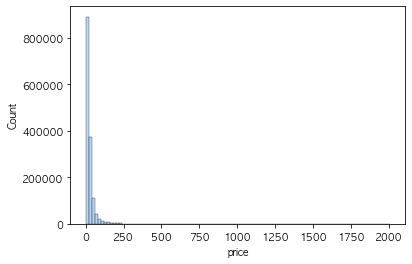

In [233]:
plt.figure(figsize=(6, 4))
sns.histplot(y_train_df, bins=100)
plt.show()

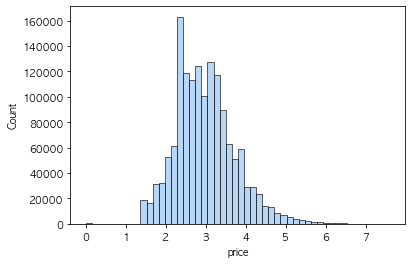

In [234]:
y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df, bins=50)
plt.show()

#### Exponential Transformation
- Log Transformation의 반대 연산

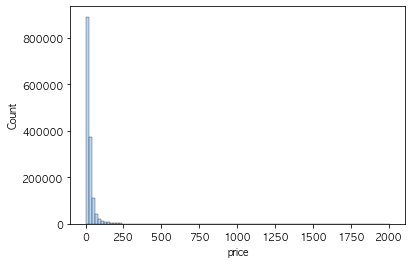

In [235]:
y_train_df = np.exp(y_train_df)
sns.histplot(y_train_df, bins=100)
plt.show()

#### Rank
- 순위 값으로 치환
- 비모수적 통계 적용할때 많이 사용

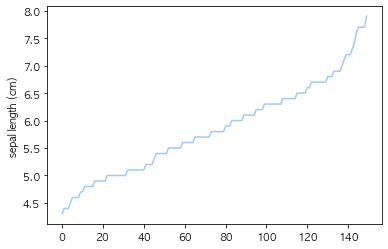

In [236]:
sepal_length = iris['sepal length (cm)'].sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length)
plt.show()

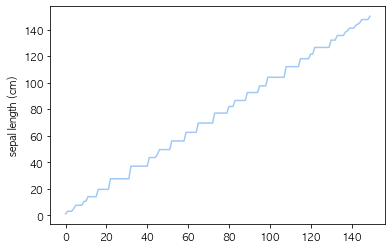

In [237]:
sepal_length_rank = iris['sepal length (cm)'].rank().sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length_rank)
plt.show()

#### Binning
- 구간 분할하여 categorical data로 변환
- cut 함수의 input은 numpy array

In [238]:
# 동일 길이로 나누기
bins = pd.cut(iris['sepal length (cm)'].values, 3)
bins.describe()

counts     freqs
categories                    
(4.296, 5.5]      59  0.393333
(5.5, 6.7]        71  0.473333
(6.7, 7.9]        20  0.133333

In [239]:
# 구간 값 정하고, 라벨 추가
bins = pd.cut(iris['sepal length (cm)'].values, bins=[4, 5, 6, 7, 8], labels=['bad', 'soso', 'med', 'good'])
bins.describe()

counts     freqs
categories                  
bad             32  0.213333
soso            57  0.380000
med             49  0.326667
good            12  0.080000

In [240]:
# 동일 개수로 나누기
bins = pd.qcut(iris['sepal length (cm)'].values, 3)
bins.describe()

counts     freqs
categories                                 
(4.2989999999999995, 5.4]      52  0.346667
(5.4, 6.3]                     56  0.373333
(6.3, 7.9]                     42  0.280000

In [241]:
# 구간에 들어갈 비율 조정
bins = pd.qcut(iris['sepal length (cm)'].values, [0, 0.25, 0.75, 1]) 
bins.describe()

counts     freqs
categories                                 
(4.2989999999999995, 5.1]      41  0.273333
(5.1, 6.4]                     74  0.493333
(6.4, 7.9]                     35  0.233333

### (8) Imbalance
- Under-sampling: 데이터 개수 감소로 인한 성능 저하 주의
- Over-sampling: 성능에 유리하나, Overfitting 가능성이 있음
- SMOTE: 소수 레이블의 값과 K-NN 사이에 임의의 새로운 데이터 생성. Recall 상승에 최적이며 K-NN을 사용하므로 수치형 데이터에 사용하는 것이 좋음. 일반적인 Over-sampling보다 시간 소요가 긴 편
    - SMOTEN: Nominal (Categorical) data
    - SMOTENC: Nominal and Continuous data. categorical_features를 리스트 형태의 파라미터로 제시해야 함
- BorderlineSMOTE: Borderline 부분에 대해서만 SMOTE 방식을 사용하는 것
    - 소수 범주의 데이터 한 개에 대해서 주변의 K개 데이터를 탐색하고 그중 다수 범주 데이터의 수를 확인
    - 주변 K개 데이터 중 다수 범주 데이터의 수가 K/2 ~ K 에 속할 경우 Danger 관측치라고 하는데, 이 관측치에 대해서만 SMOTE 적용
- ADASYN (Adaptive Synthetic Sampling): Borderline SMOTE 방법과 유사하나, 샘플링 개수를 데이터 위치에 따라 다르게 설정함
    - 모든 소수 범주 데이터에 대해 주변의 K개의 데이터를 탐색하고 다수 범주 데이터의 비율 계산
    - 소수 범주 데이터 주변의 다수 범주 데이터의 수에 따라 유동적으로 생성 가능
- SVMSMOTE: SVM의 hyperplane 경계면에 minor class 데이터 생성
- KMeansSMOTE: 데이터를 우선 클러스터링하여 minor class 데이터 주변으로 synthetic 데이터 생성
    - 전체 데이터 (major + minor)에 대해 KMeans clustering 수행 (default k=2)
    - major class의 데이터가 포함된 cluster는 oversampling 대상에서 제외
    - minor class 데이터만 존재하는 cluster에 대해 그 주변 값으로 synthetic data generate
- Weight 조정: 모델링 시 sample_weight 입력하여 적은 클래스의 가중치를 높임
- Default sampling strategy는 'not majority': 모든 클래스를 majority class의 크기로 맞춤

In [242]:
# ! pip install imblearn
from sklearn.datasets import make_classification
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE

In [243]:
### Data generate
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


#### Random Under-sampling

In [244]:
undersample=RandomUnderSampler(sampling_strategy='majority') # 가장 작은 사이즈에 맞춤
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [245]:
undersample = RandomUnderSampler(sampling_strategy=0.5) # 2:1 비율로
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


#### Random Over-sampling

In [246]:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [247]:
oversample = RandomOverSampler(sampling_strategy='minority') # 작은 사이즈 클래스를 큰 사이즈에 맞춤
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


#### SMOTE

In [248]:
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


#### Borderline SMOTE

In [249]:
b_smote_sample = BorderlineSMOTE(sampling_strategy='minority') 
x_bsm, y_bsm = b_smote_sample.fit_resample(x, y)
print(Counter(y_bsm))

Counter({0: 1900, 1: 1900})


#### ADASYN (Adaptive Synthetic Sampling)

In [250]:
adasyn_sample = ADASYN(sampling_strategy='minority') 
x_ada, y_ada = adasyn_sample.fit_resample(x, y)
print(Counter(y_ada))

Counter({1: 1905, 0: 1900})


#### SVM SMOTE

In [251]:
svm_smote_sample = SVMSMOTE(sampling_strategy='minority') 
x_ssm, y_ssm = svm_smote_sample.fit_resample(x, y)
print(Counter(y_ssm))

Counter({0: 1900, 1: 1900})


#### K-means SMOTE

In [252]:
kmeans_smote_sample = KMeansSMOTE(sampling_strategy='minority', cluster_balance_threshold=0.1) 
x_ksm, y_ksm = kmeans_smote_sample.fit_resample(x, y)
print(Counter(y_ksm))

Counter({0: 1900, 1: 1900})


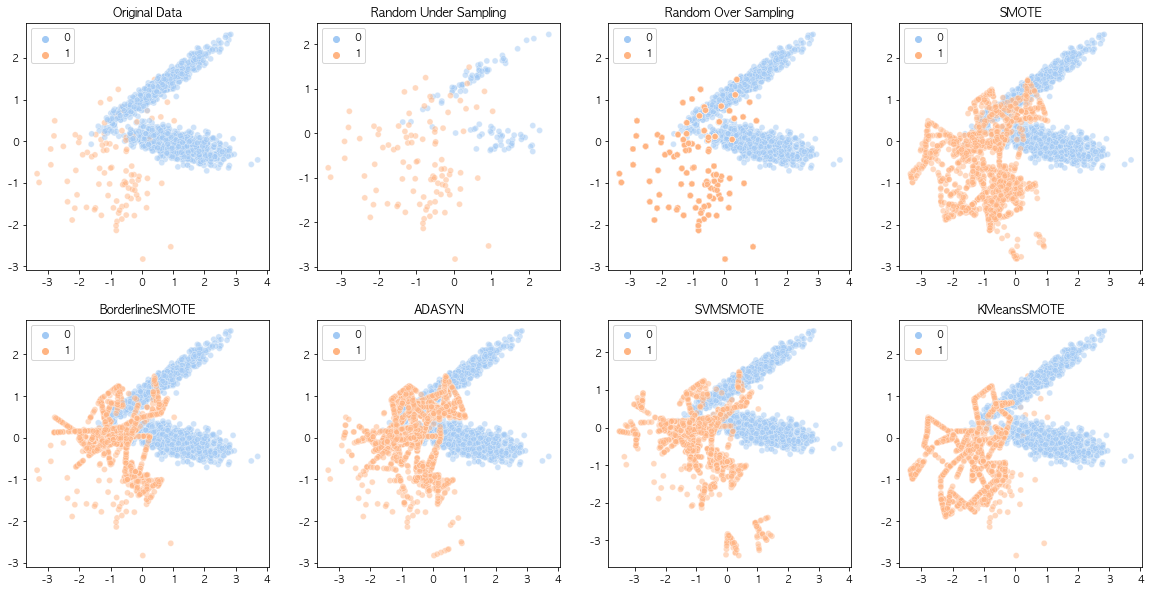

In [253]:
### Sampling Visualization
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.scatterplot(x=x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:, 1], y=x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over[:, 1], y=x_over[:, 2], hue=y_over, ax=axes[0][2], alpha=0.5)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], hue=y_sm, ax=axes[0][3], alpha=0.5)
sns.scatterplot(x=x_bsm[:, 1], y=x_bsm[:, 2], hue=y_bsm, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_ada[:, 1], y=x_ada[:, 2], hue=y_ada, ax=axes[1][1], alpha=0.5)
sns.scatterplot(x=x_ssm[:, 1], y=x_ssm[:, 2], hue=y_ssm, ax=axes[1][2], alpha=0.5)
sns.scatterplot(x=x_ksm[:, 1], y=x_ksm[:, 2], hue=y_ksm, ax=axes[1][3], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[0][2].set_title('Random Over Sampling')
axes[0][3].set_title('SMOTE')
axes[1][0].set_title('BorderlineSMOTE')
axes[1][1].set_title('ADASYN')
axes[1][2].set_title('SVMSMOTE')
axes[1][3].set_title('KMeansSMOTE')

plt.show()

### (9) Time-series Data
- 분해 시계열: 추세요인, 계절요인, 순환요인, 불규칙요인 (잔차)
- Multiplicative(추세에 따른 계절성이 있는 경우), Additvie(추세와 계절성이 별도로 존재하는 경우)
- -

In [254]:
arima_data.head()

day  price
0  2013-01-01   3794
1  2013-02-01   3863
2  2013-03-01   5190
3  2013-04-01   5783
4  2013-05-01   6298

In [255]:
arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)
arima_data.head(3)

price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190

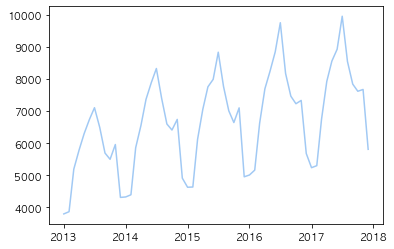

In [256]:
plt.plot(arima_data.index, arima_data['price'])
plt.show()

In [257]:
### ldeaths data
ldeaths.head()

time  value
0  1974.000000   3035
1  1974.083333   2552
2  1974.166667   2704
3  1974.250000   2554
4  1974.333333   2014

In [258]:
# 시간 변환
ldeaths['time'] = pd.Series([f'{y}-{m+1}' for y in range(1974, 1980) for m in range(12)])
ldeaths.head()

time  value
0  1974-1   3035
1  1974-2   2552
2  1974-3   2704
3  1974-4   2554
4  1974-5   2014

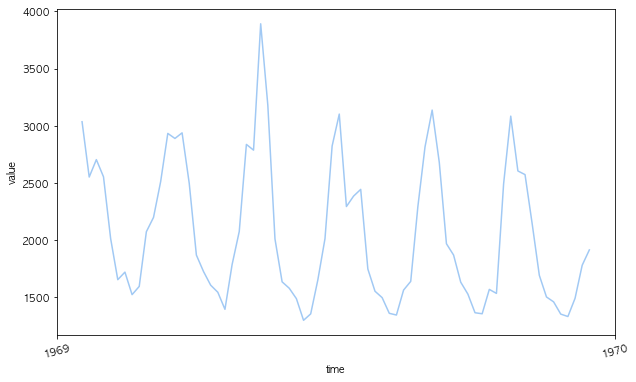

In [259]:
plt.figure(figsize=(10,6))
ax = plt.axes()            
plt.xticks(rotation=15)
    
ax.xaxis.set_major_locator(dates.DayLocator(interval=350))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

sns.lineplot(x='time', y='value', data=ldeaths, ax=ax)
plt.show()

In [260]:
ldeaths['time'] = pd.to_datetime(ldeaths['time'], format="%Y-%m")
ldeaths.set_index('time', inplace=True)
ldeaths.head(3)

value
time             
1974-01-01   3035
1974-02-01   2552
1974-03-01   2704

#### Seasonal decomposition

In [261]:
from statsmodels.tsa.seasonal import seasonal_decompose

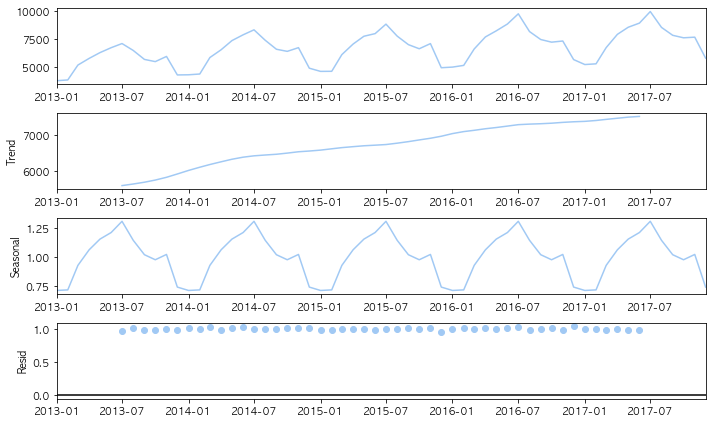

In [262]:
### Seasonal decomposition
ts = arima_data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

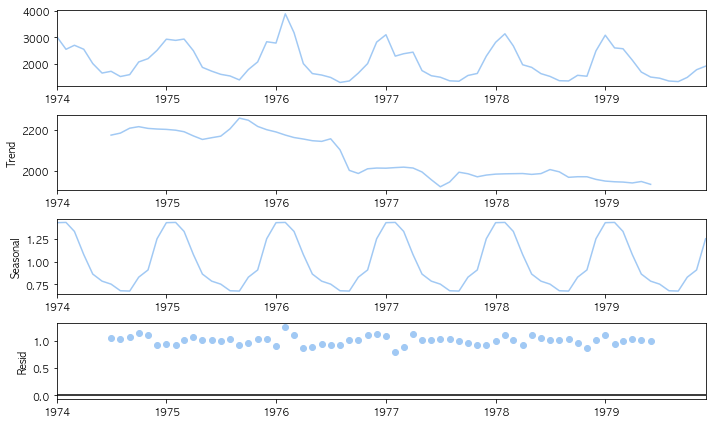

In [263]:
### Seasonal decomposition
ts = ldeaths
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

#### Upsampling/Downsampling

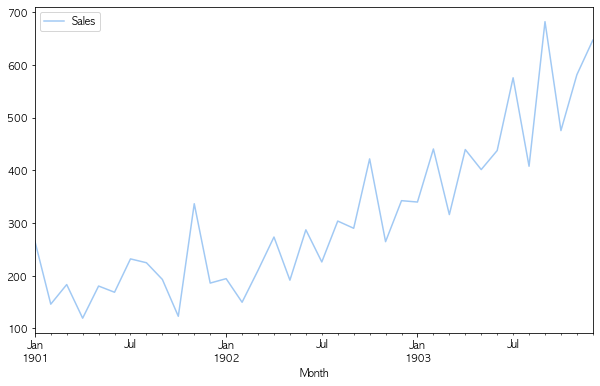

In [264]:
def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')
 
shampoo = pd.read_csv('./data/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
shampoo.plot()
plt.show()

In [265]:
### Upsampling
upsampled = shampoo.resample('D').mean() # Day frequency
upsampled

Sales
Month            
1901-01-01  266.0
1901-01-02    NaN
1901-01-03    NaN
1901-01-04    NaN
1901-01-05    NaN
...           ...
1903-11-27    NaN
1903-11-28    NaN
1903-11-29    NaN
1903-11-30    NaN
1903-12-01  646.9

[1065 rows x 1 columns]

In [266]:
print(shampoo.shape, upsampled.shape)

(36, 1) (1065, 1)


In [267]:
ts_upsample = ts.resample('S').mean() # Second frequency로 평균 시간 만들기
ts_upsample

value
time                       
1974-01-01 00:00:00  3035.0
1974-01-01 00:00:01     NaN
1974-01-01 00:00:02     NaN
1974-01-01 00:00:03     NaN
1974-01-01 00:00:04     NaN
...                     ...
1979-11-30 23:59:56     NaN
1979-11-30 23:59:57     NaN
1979-11-30 23:59:58     NaN
1979-11-30 23:59:59     NaN
1979-12-01 00:00:00  1915.0

[186624001 rows x 1 columns]

In [268]:
rng = pd.date_range('2019-12-31', periods=3, freq='5S')
ts = pd.DataFrame(np.array([0, 1, 3, 2, 10, 3]).reshape(3, 2), index=rng, columns=['col_1', 'col_2'])
ts

col_1  col_2
2019-12-31 00:00:00      0      1
2019-12-31 00:00:05      3      2
2019-12-31 00:00:10     10      3

In [269]:
### Downsampling (merge)
resample = shampoo.resample('Q') # Quarter-aware
quarterly_mean_sales = resample.mean()

In [270]:
quarterly_mean_sales.shape

(12, 1)

In [271]:
# Time 단위 downsampling
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)

In [272]:
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [273]:
series.resample('3T').sum() # 3시간 단위로 sum 하되, label은 가장 빠른 시간으로

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [274]:
series.resample('3T', label='right').sum() # label을 마지막 시간으로

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [275]:
series.resample('3T', label='right', closed='right').sum() # 오른쪽 부등호에 등호 붙이기

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

#### Missing value treatment

In [276]:
# ts_upsample.ffill()
# 앞의 값으로 채우기
ts_upsample.fillna(method='ffill')

value
time                       
1974-01-01 00:00:00  3035.0
1974-01-01 00:00:01  3035.0
1974-01-01 00:00:02  3035.0
1974-01-01 00:00:03  3035.0
1974-01-01 00:00:04  3035.0
...                     ...
1979-11-30 23:59:56  1781.0
1979-11-30 23:59:57  1781.0
1979-11-30 23:59:58  1781.0
1979-11-30 23:59:59  1781.0
1979-12-01 00:00:00  1915.0

[186624001 rows x 1 columns]

In [277]:
# ts_upsample.bfill()
# 뒤의 값으로 채우기
ts_upsample.fillna(method='bfill')

value
time                       
1974-01-01 00:00:00  3035.0
1974-01-01 00:00:01  2552.0
1974-01-01 00:00:02  2552.0
1974-01-01 00:00:03  2552.0
1974-01-01 00:00:04  2552.0
...                     ...
1979-11-30 23:59:56  1915.0
1979-11-30 23:59:57  1915.0
1979-11-30 23:59:58  1915.0
1979-11-30 23:59:59  1915.0
1979-12-01 00:00:00  1915.0

[186624001 rows x 1 columns]

In [278]:
# 평균으로 채우기 
ts_upsample.fillna(ts_upsample.mean())

value
time                         
1974-01-01 00:00:00  3035.000
1974-01-01 00:00:01  2056.625
1974-01-01 00:00:02  2056.625
1974-01-01 00:00:03  2056.625
1974-01-01 00:00:04  2056.625
...                       ...
1979-11-30 23:59:56  2056.625
1979-11-30 23:59:57  2056.625
1979-11-30 23:59:58  2056.625
1979-11-30 23:59:59  2056.625
1979-12-01 00:00:00  1915.000

[186624001 rows x 1 columns]

In [279]:
# 중앙값으로 채우기 
ts_upsample.fillna(ts_upsample.median())

value
time                       
1974-01-01 00:00:00  3035.0
1974-01-01 00:00:01  1870.0
1974-01-01 00:00:02  1870.0
1974-01-01 00:00:03  1870.0
1974-01-01 00:00:04  1870.0
...                     ...
1979-11-30 23:59:56  1870.0
1979-11-30 23:59:57  1870.0
1979-11-30 23:59:58  1870.0
1979-11-30 23:59:59  1870.0
1979-12-01 00:00:00  1915.0

[186624001 rows x 1 columns]

In [280]:
### Interpolation (보간)
# 시계열 데이터의 앞, 뒤 데이터 확인하여 결측치 보정
ts_upsample.interpolate(method='values') # 값 기준 선형 보간

value
time                            
1974-01-01 00:00:00  3035.000000
1974-01-01 00:00:01  3034.999820
1974-01-01 00:00:02  3034.999639
1974-01-01 00:00:03  3034.999459
1974-01-01 00:00:04  3034.999279
...                          ...
1979-11-30 23:59:56  1914.999793
1979-11-30 23:59:57  1914.999845
1979-11-30 23:59:58  1914.999897
1979-11-30 23:59:59  1914.999948
1979-12-01 00:00:00  1915.000000

[186624001 rows x 1 columns]

In [281]:
ts_upsample.interpolate(method='time') # 시간 기준 선형 보간

value
time                            
1974-01-01 00:00:00  3035.000000
1974-01-01 00:00:01  3034.999820
1974-01-01 00:00:02  3034.999639
1974-01-01 00:00:03  3034.999459
1974-01-01 00:00:04  3034.999279
...                          ...
1979-11-30 23:59:56  1914.999793
1979-11-30 23:59:57  1914.999845
1979-11-30 23:59:58  1914.999897
1979-11-30 23:59:59  1914.999948
1979-12-01 00:00:00  1915.000000

[186624001 rows x 1 columns]

In [282]:
upsampled.interpolate(method='linear') # 선형으로 값 채우기

Sales
Month                 
1901-01-01  266.000000
1901-01-02  262.125806
1901-01-03  258.251613
1901-01-04  254.377419
1901-01-05  250.503226
...                ...
1903-11-27  638.153333
1903-11-28  640.340000
1903-11-29  642.526667
1903-11-30  644.713333
1903-12-01  646.900000

[1065 rows x 1 columns]

In [283]:
upsampled.interpolate(option='spline') # smooth surface 보간

Sales
Month                 
1901-01-01  266.000000
1901-01-02  262.125806
1901-01-03  258.251613
1901-01-04  254.377419
1901-01-05  250.503226
...                ...
1903-11-27  638.153333
1903-11-28  640.340000
1903-11-29  642.526667
1903-11-30  644.713333
1903-12-01  646.900000

[1065 rows x 1 columns]

In [284]:
# dataframe with index as timeseries
time_sdata = pd.date_range("09/10/2021", periods=9, freq="W")

df = pd.DataFrame(index=time_sdata)
# there are four missing values
df["example"] = [10001.0, 10002.0, 10003.0, np.nan, 10004.0, np.nan, np.nan, 10005.0, np.nan]
df

example
2021-09-12  10001.0
2021-09-19  10002.0
2021-09-26  10003.0
2021-10-03      NaN
2021-10-10  10004.0
2021-10-17      NaN
2021-10-24      NaN
2021-10-31  10005.0
2021-11-07      NaN

In [285]:
df.interpolate()

example
2021-09-12  10001.000000
2021-09-19  10002.000000
2021-09-26  10003.000000
2021-10-03  10003.500000
2021-10-10  10004.000000
2021-10-17  10004.333333
2021-10-24  10004.666667
2021-10-31  10005.000000
2021-11-07  10005.000000

In [286]:
# Interpolating Missing Values to two values
# forward 방향으로 1개까지 Missing data 처리 (보간 개수 제한)
df.interpolate(limit=1, limit_direction="forward")

example
2021-09-12  10001.000000
2021-09-19  10002.000000
2021-09-26  10003.000000
2021-10-03  10003.500000
2021-10-10  10004.000000
2021-10-17  10004.333333
2021-10-24           NaN
2021-10-31  10005.000000
2021-11-07  10005.000000

In [287]:
# 아래에서 위로 보간
df.interpolate(method='values', limit=1, limit_direction='backward')

example
2021-09-12  10001.000000
2021-09-19  10002.000000
2021-09-26  10003.000000
2021-10-03  10003.500000
2021-10-10  10004.000000
2021-10-17           NaN
2021-10-24  10004.666667
2021-10-31  10005.000000
2021-11-07           NaN

#### Rolling & Shift

In [288]:
arima_data['price'].rolling(3).mean().head() # price의 과거 3개 값의 평균

day
2013-01-01            NaN
2013-02-01            NaN
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [289]:
arima_data['price'].rolling(3, min_periods=1).mean().head() # min_periods : 1, 2행을 과거 1, 2행 값만으로 계산

day
2013-01-01    3794.000000
2013-02-01    3828.500000
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [290]:
arima_data['price'].shift(3).head() # price의 값을 3칸 아래로 이동

day
2013-01-01       NaN
2013-02-01       NaN
2013-03-01       NaN
2013-04-01    3794.0
2013-05-01    3863.0
Name: price, dtype: float64

In [291]:
### get smoothing (MA) line
# computing a 7 day rolling average
birth_data['7day_rolling_avg'] = birth_data.Births.rolling(7).mean()

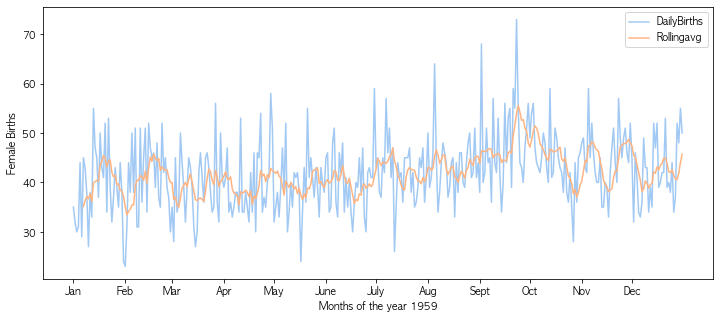

In [292]:
# set figure size
plt.figure(figsize=(12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot(x='Date', y='Births', data=birth_data, label='DailyBirths')

# plot using rolling average
sns.lineplot(x='Date', y='7day_rolling_avg', data=birth_data, label='Rollingavg')
plt.xlabel('Months of the year 1959')
  
# setting customized ticklabels for x axis
pos = ['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01', 
       '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
       '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01']
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
  
plt.xticks(pos, lab)
plt.ylabel('Female Births')
plt.show()

#### Resample
- 시간 단위별로 grouping
    - Y, M, D, H, T(min), S등의 rule 지정
- 시간 컬럼을 index로 지정하거나, on parameter 이용
- groupby와 유사하며, groupby와 함께 이용하는 것도 가능

In [293]:
birth_data.reset_index(drop=False, inplace=True)

In [294]:
birth_data['Date'] = pd.to_datetime(birth_data['Date']) # DateTime으로 변경 후 index로 지정
# birth_data.set_index('Date', drop=True, inplace=True)
birth_data.drop('7day_rolling_avg', axis=1, inplace=True)
birth_data.head()

index       Date  Births
0      0 1959-01-01      35
1      1 1959-01-02      32
2      2 1959-01-03      30
3      3 1959-01-04      31
4      4 1959-01-05      44

In [295]:
birth_data.resample(rule='2D', closed='right', label='right', on='Date').mean() # 2일 평균을 계산하되, 부등호와 label 값은 오른쪽(최신) 값으로

index  Births
Date                     
1959-01-01    0.0    35.0
1959-01-03    1.5    31.0
1959-01-05    3.5    37.5
1959-01-07    5.5    37.0
1959-01-09    7.5    40.5
...           ...     ...
1959-12-23  355.5    39.5
1959-12-25  357.5    41.0
1959-12-27  359.5    35.5
1959-12-29  361.5    50.0
1959-12-31  363.5    52.5

[183 rows x 2 columns]

In [296]:
birth_data.resample(rule='3M', on='Date').sum() # 3개월 단위로 sum

index  Births
Date                     
1959-01-31    465    1213
1959-04-30   6675    3561
1959-07-31  15226    3720
1959-10-31  23690    4165
1960-01-31  20374    2664

## Unsupervised Data Analysis

### (1) Correlation Analysis
- 두 변수의 관계를 알아보기 위함
- 상관계수를 구하고, 상관계수의 유의성 검정 진행
    - H0: 변수 간 상관성이 없다 (상관계수가 0이다)
    - 검정통계량은 df n-2인 T분포
- 상관계수 종류
    - Covariance
    - Pearson correlation: 선형 관계 측정. 일반적으로 사용
    - Spearman correlation: Rank correlation으로, 비선형 관계도 측정 가능
    - Kendall's Tau
    - Cramer's V
    - Auto-correlation coef

In [297]:
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [298]:
mtcars.loc[:, ['drat', 'disp']].corr() # pearson corr

drat      disp
drat  1.000000 -0.710214
disp -0.710214  1.000000

#### Covariance matrix

In [299]:
mtcars.cov()

mpg         cyl          disp           hp       drat  \
mpg    36.324103   -9.172379   -633.097208  -320.732056   2.195064   
cyl    -9.172379    3.189516    199.660282   101.931452  -0.668367   
disp -633.097208  199.660282  15360.799829  6721.158669 -47.064019   
hp   -320.732056  101.931452   6721.158669  4700.866935 -16.451109   
drat    2.195064   -0.668367    -47.064019   -16.451109   0.285881   
wt     -5.116685    1.367371    107.684204    44.192661  -0.372721   
qsec    4.509149   -1.886855    -96.051681   -86.770081   0.087141   
vs      2.017137   -0.729839    -44.377621   -24.987903   0.118649   
am      1.803931   -0.465726    -36.564012    -8.320565   0.190151   
gear    2.135685   -0.649194    -50.802621    -6.358871   0.275988   
carb   -5.363105    1.520161     79.068750    83.036290  -0.078407   

              wt       qsec         vs         am       gear       carb  
mpg    -5.116685   4.509149   2.017137   1.803931   2.135685  -5.363105  
cyl     1.367371  -1.886855  -0.729839  -0.465726  -0.649194   1.520161  
disp  107.684204 -96.051681 -44.377621 -36.564012 -50.802621  79.068750  
hp     44.192661 -86.770081 -24.987903  -8.320565  -6.358871  83.036290  
drat   -0.372721   0.087141   0.118649   0.190151   0.275988  -0.078407  
wt      0.957379  -0.305482  -0.273661  -0.338105  -0.421081   0.675790  
qsec   -0.305482   3.193166   0.670565  -0.204960  -0.280403  -1.894113  
vs     -0.273661   0.670565   0.254032   0.042339   0.076613  -0.463710  
am     -0.338105  -0.204960   0.042339   0.248992   0.292339   0.046371  
gear   -0.421081  -0.280403   0.076613   0.292339   0.544355   0.326613  
carb    0.675790  -1.894113  -0.463710   0.046371   0.326613   2.608871

#### Pearson
- scipy.stats 라이브러리를 이용할 경우, 상관계수에 대한 유의검정 p-value 추출 가능

In [300]:
stats.pearsonr(mtcars.drat, mtcars.disp) # 2개 column 상관분석

(-0.7102139271692701, 5.282021688157213e-06)

In [301]:
mtcars.rcorr() # pingouin import 후에 사용 가능. pearson correlation

mpg     cyl    disp      hp    drat      wt    qsec     vs     am  \
mpg        -     ***     ***     ***     ***     ***       *    ***    ***   
cyl   -0.852       -     ***     ***     ***     ***     ***    ***     **   
disp  -0.848   0.902       -     ***     ***     ***       *    ***    ***   
hp    -0.776   0.832   0.791       -      **     ***     ***    ***          
drat   0.681    -0.7   -0.71  -0.449       -     ***              *    ***   
wt    -0.868   0.782   0.888   0.659  -0.712       -            ***    ***   
qsec   0.419  -0.591  -0.434  -0.708   0.091  -0.175       -    ***          
vs     0.664  -0.811   -0.71  -0.723    0.44  -0.555   0.745      -          
am       0.6  -0.523  -0.591  -0.243   0.713  -0.692   -0.23  0.168      -   
gear    0.48  -0.493  -0.556  -0.126     0.7  -0.583  -0.213  0.206  0.794   
carb  -0.551   0.527   0.395    0.75  -0.091   0.428  -0.656  -0.57  0.058   

       gear carb  
mpg      **   **  
cyl      **   **  
disp    ***    *  
hp           ***  
drat    ***       
wt      ***    *  
qsec         ***  
vs           ***  
am      ***       
gear      -       
carb  0.274    -

In [302]:
# 특정 변수 지정 가능
housing.drop('ocean_proximity', axis=1).corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Spearman
- 범주형 번수의 Pearson 상관계수

In [303]:
stats.spearmanr(mtcars.wt, mtcars.cyl)

SpearmanrResult(correlation=0.8577281622201577, pvalue=3.5741568243795457e-10)

In [304]:
mtcars.corr(method='spearman')

mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.910801 -0.908882 -0.894665  0.651455 -0.886422  0.466936   
cyl  -0.910801  1.000000  0.927652  0.901791 -0.678881  0.857728 -0.572351   
disp -0.908882  0.927652  1.000000  0.851043 -0.683592  0.897706 -0.459782   
hp   -0.894665  0.901791  0.851043  1.000000 -0.520125  0.774677 -0.666606   
drat  0.651455 -0.678881 -0.683592 -0.520125  1.000000 -0.750390  0.091869   
wt   -0.886422  0.857728  0.897706  0.774677 -0.750390  1.000000 -0.225401   
qsec  0.466936 -0.572351 -0.459782 -0.666606  0.091869 -0.225401  1.000000   
vs    0.706597 -0.813789 -0.723664 -0.751593  0.447457 -0.587016  0.791571   
am    0.562006 -0.522071 -0.624068 -0.362328  0.686571 -0.737713 -0.203332   
gear  0.542782 -0.564310 -0.594470 -0.331402  0.744816 -0.676128 -0.148200   
carb -0.657498  0.580068  0.539778  0.733379 -0.125223  0.499812 -0.658718   

            vs        am      gear      carb  
mpg   0.706597  0.562006  0.542782 -0.657498  
cyl  -0.813789 -0.522071 -0.564310  0.580068  
disp -0.723664 -0.624068 -0.594470  0.539778  
hp   -0.751593 -0.362328 -0.331402  0.733379  
drat  0.447457  0.686571  0.744816 -0.125223  
wt   -0.587016 -0.737713 -0.676128  0.499812  
qsec  0.791571 -0.203332 -0.148200 -0.658718  
vs    1.000000  0.168345  0.282662 -0.633695  
am    0.168345  1.000000  0.807688 -0.064365  
gear  0.282662  0.807688  1.000000  0.114887  
carb -0.633695 -0.064365  0.114887  1.000000

In [305]:
mtcars.rcorr(method='spearman', padjust='holm') # spearman with holm adjust

mpg     cyl    disp      hp    drat      wt    qsec      vs      am  \
mpg        -     ***     ***     ***      **     ***             ***       *   
cyl   -0.911       -     ***     ***     ***     ***       *     ***       *   
disp  -0.909   0.928       -     ***     ***     ***             ***      **   
hp    -0.895   0.902   0.851       -       *     ***     ***     ***           
drat   0.651  -0.679  -0.684   -0.52       -     ***                     ***   
wt    -0.886   0.858   0.898   0.775   -0.75       -              **     ***   
qsec   0.467  -0.572   -0.46  -0.667   0.092  -0.225       -     ***           
vs     0.707  -0.814  -0.724  -0.752   0.447  -0.587   0.792       -           
am     0.562  -0.522  -0.624  -0.362   0.687  -0.738  -0.203   0.168       -   
gear   0.543  -0.564  -0.594  -0.331   0.745  -0.676  -0.148   0.283   0.808   
carb  -0.657    0.58    0.54   0.733  -0.125     0.5  -0.659  -0.634  -0.064   

       gear carb  
mpg       *   **  
cyl       *    *  
disp     **    *  
hp           ***  
drat    ***       
wt      ***       
qsec          **  
vs            **  
am      ***       
gear      -       
carb  0.115    -

In [306]:
### Subject data
subject.head()

korean  math  english  science
0      85    80       80       90
1      75    60       70      100
2      65    75       69       50
3      78    40       79       80
4      59    50       80       67

In [307]:
subject.rcorr(method='spearman')

korean    math english science
korean       -                        
math     0.497       -                
english  0.202   0.129       -        
science    0.0  -0.062  -0.425       -

#### Kendall's Tau
- Measure of the correspondence between two rankings
- 순위 일치도
- 순위의 상관계수

In [308]:
from scipy.stats import kendalltau

In [309]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 6, 2, 7, 4, 5]
  
# Calculating Kendall Rank correlation
kendalltau(x, y)

KendalltauResult(correlation=0.4285714285714286, pvalue=0.2388888888888889)

#### Kendall's W
- Kendall's coefficient of concordance
- Non-parametric statistic for rank correlation
- 세 집단 이상의 상관성 계산 가능

In [310]:
# !pip install kendall-w
import kendall_w.kendall_w as kw

In [311]:
annotations = [[1, 1, 1, 2], [2, 2, 2, 3], [3, 3, 3, 1]]
kw.compute_w(annotations)

0.4375

#### Cramer's V
- 명목형 (범주형) 변수의 상관관계 계산
- Contingency table 형식으로 input 생성해야 함

In [312]:
dataset = np.array([[13, 17, 11], [4, 6, 9], [20, 31, 42]])
dataset

array([[13, 17, 11],
       [ 4,  6,  9],
       [20, 31, 42]])

In [313]:
# Finding Chi-squared test statistic, sample size, and minimum of rows and columns
chi_2 = stats.chi2_contingency(dataset, correction=False)[0]
n = np.sum(dataset)
minimum_dimension = min(dataset.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((chi_2/n) / minimum_dimension)
  
# Print the result
print(result)

0.12181939439334678


#### Partial Correlation
- 일반적인 다중 상관관계 분석을 통한 변수간의 상관계수는 특정 두 변수간의 순수한 상관관계를 나타낸다고 할 수 없음
- 특정 변수의 영향을 제거한 상태에서의 두 변수간의 순수한 상관관계를 파악하기 위해선 편(부분) 상관관계 분석이라는 기법을 사용해야 함
- 두 변수 x, y 각각에서 제 3의 변수 z에 의해 선형적으로 설명되는 부분을 제거하고 남은 잔차들간의 상관계수를 구해야 함

In [314]:
from pingouin import partial_corr

In [315]:
# Pearson
partial_corr(data=mtcars, x='mpg', y='cyl', covar='wt', method='pearson') # covar -> 통제하고자 하는 공변량

n         r           CI95%     p-val
pearson  32 -0.559577  [-0.76, -0.26]  0.001064

In [316]:
# Spearman
partial_corr(data=mtcars, x='mpg', y='cyl', covar='wt', method='spearman') # covar -> 통제하고자 하는 공변량

n         r           CI95%     p-val
spearman  32 -0.632407  [-0.81, -0.36]  0.000135

#### Auto Correlation
- 시계열 데이터 사이의 상관성
- 특정 시점(t)의 데이터와 t+n의 데이터 간의 상관계수 파악
- ACF function

In [317]:
arima_data.head()

price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298

In [318]:
from statsmodels.tsa.stattools import acf

In [319]:
acf(arima_data['price'], nlags=20, fft=False)

array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
       -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
        0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
        0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
       -0.16477475])

In [320]:
acf(arima_data['price'], nlags=20, qstat=True) # Ljung-Box q statistic & p-value 추가. 잔차가 white noise를 따르는 지 확인 -> H0: 잔차가 white noise를 따른다.

(array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
        -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
         0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
         0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
        -0.16477475]),
 array([ 37.94401844,  52.50037174,  54.34180767,  54.85465569,
         63.18445145,  75.24867676,  83.17693947,  83.96614588,
         84.64021172,  94.08551774, 120.40031253, 158.8424724 ,
        180.63576012, 187.07373436, 187.17730135, 189.65693865,
        201.79850112, 217.46466365, 228.38742506, 230.91244191]),
 array([7.28039383e-10, 3.97822304e-12, 9.48671046e-12, 3.48496886e-11,
        2.66598267e-12, 3.41146236e-14, 3.09359282e-15, 7.75246413e-15,
        1.92493244e-14, 8.26131919e-16, 1.50616176e-20, 9.03974065e-28,
        1.25875615e-31, 2.36853084e-32, 8.44659679e-32, 9.67338596e-32,
        1.24496569e-33, 3.13582644e-36, 7.12714627e-38, 7.85057907e-38]))

In [321]:
acf(arima_data['price'], nlags=20, alpha=0.05) # Confidence Interval

(array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
        -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
         0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
         0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
        -0.16477475]),
 array([[ 1.        ,  1.        ],
        [ 0.52272762,  1.02878815],
        [ 0.10078526,  0.85200831],
        [-0.24451169,  0.5804614 ],
        [-0.50470823,  0.32897783],
        [-0.76896243,  0.06709184],
        [-0.85496247,  0.01800165],
        [-0.79754545,  0.12536562],
        [-0.58190307,  0.3718372 ],
        [-0.38221769,  0.57448028],
        [-0.12327958,  0.83588897],
        [ 0.09250097,  1.08498722],
        [ 0.16518078,  1.24340414],
        [-0.07037744,  1.11984454],
        [-0.34187969,  0.9061823 ],
        [-0.5967507 ,  0.66754128],
        [-0.80353011,  0.46101562],
        [-1.00986363,  0.26060796],
        [-1.06979327,  0.22866063],
 

In [322]:
from statsmodels.graphics.tsaplots import plot_acf

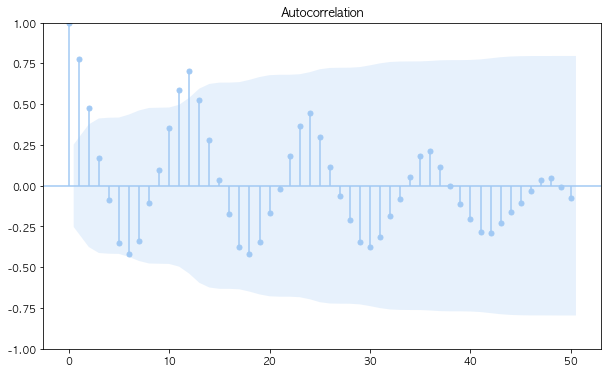

In [323]:
plot_acf(x=arima_data['price'], lags=50)
plt.show()

#### Partial Auto Correlation
- 특정 시점(t)의 데이터와 t+n의 데이터 간의 상관계수 파악하되, 그 사이에 있는 시점 데이터의 영향도 제거

In [324]:
from statsmodels.tsa.stattools import pacf

In [325]:
pacf(arima_data['price'], nlags=20)

array([ 1.        ,  0.78890632, -0.34306071, -0.22423997, -0.1232589 ,
       -0.39768343,  0.30771301,  0.13977001,  0.35822355, -0.02132234,
        0.41418364,  0.4704723 ,  0.23373142, -0.65603062, -0.59451517,
       -0.34472427,  0.29950263,  0.57985284, -0.04939371, -1.34571401,
        0.33253078])

In [326]:
pacf(arima_data['price'], nlags=20, alpha=0.05)

(array([ 1.        ,  0.78890632, -0.34306071, -0.22423997, -0.1232589 ,
        -0.39768343,  0.30771301,  0.13977001,  0.35822355, -0.02132234,
         0.41418364,  0.4704723 ,  0.23373142, -0.65603062, -0.59451517,
        -0.34472427,  0.29950263,  0.57985284, -0.04939371, -1.34571401,
         0.33253078]),
 array([[ 1.        ,  1.        ],
        [ 0.53587606,  1.04193658],
        [-0.59609098, -0.09003045],
        [-0.47727023,  0.02879029],
        [-0.37628916,  0.12977137],
        [-0.65071369, -0.14465316],
        [ 0.05468275,  0.56074328],
        [-0.11326026,  0.39280027],
        [ 0.10519328,  0.61125381],
        [-0.2743526 ,  0.23170792],
        [ 0.16115338,  0.6672139 ],
        [ 0.21744204,  0.72350257],
        [-0.01929885,  0.48676168],
        [-0.90906088, -0.40300035],
        [-0.84754543, -0.3414849 ],
        [-0.59775453, -0.09169401],
        [ 0.04647237,  0.5525329 ],
        [ 0.32682258,  0.8328831 ],
        [-0.30242398,  0.20363655],
 

In [327]:
from statsmodels.graphics.tsaplots import plot_pacf

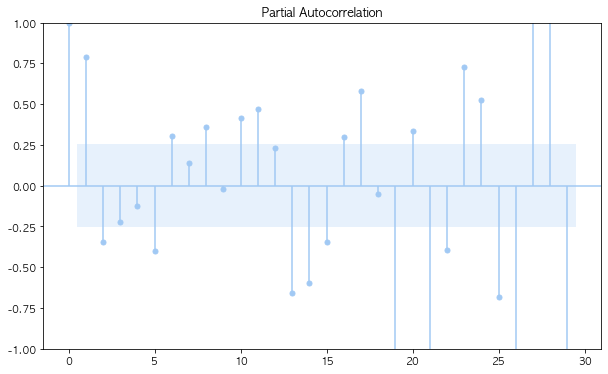

In [328]:
plot_pacf(x=arima_data['price'], lags=29)
plt.show()

#### CCA
- Canonical Correlation Analysis (정준상관분석)
- 각 집단의 두 선형 결합에 대한 상관분석. 요인분석과 다변량 회귀분석의 역할을 결합한 분석방법으로 알려져 있음
- 모든 변수들은 원칙적으로 연속형이어야 하지만 범주형 변수일 경우 더미 변수화하여 분석에 사용할 수 있음
- 각각 p, q 개로 이루어진 두 변수 그룹 X와 Y가 있을 때, X와 Y를 소속된 개별 변수들간의 선형결합으로 이루어진 정준변수라 하고, 정준변수 X와 Y 사이의 상관계수 p를 정준상관계수라고 함
- 가능한 모든 선형결합 중 두 변수 X,Y 간 상관계수를 최대화 시키는 선형결합 X,Y를 찾으며 이때, 선형결합을 나타내는 개별 변수들의 계수들을 정준계수라고 함
- 정준변수간 상관계수가 최대일 때는 제1 정준상관계수라고 하고 이에 대응되는 정준변수는 제1 정준변수라 함
- X와 Y의 가능한 모든 선형결합 중에서 제1 정준변수 쌍과는 서로 상관 없으면서 상관계수를 가장 크게 해주는 또 다른 선형결합 X와 Y가 제2 정준변수
- 정준상관분석의 목적은 정준상관계수와 정준변수를 추정하는 것 외에도 정준적재량과 교차적재량을 통해 두 변수 그룹간의 관계에 대한 각 변수의 상대적 영향력을 확인하는 것
    - 정준적재량 (canonical loadings): 정준변수와 해당 정준변수를 구성하는 측정변수들 사이의 상관계수
    - 교차적재량 (cross loadings): 정준변수와 대립하는 정준변수의 측정 변수들 사이의 상관계수
    - 이를 통해 변수 그룹들 사이에 내포된 상대적 중요도의 의미를 파악할 수 있음
- 차원축소 방법으로도 사용

In [329]:
from sklearn.cross_decomposition import CCA

In [330]:
cca_data = pd.read_excel('./data/cca_data.xlsx')
 
x = cca_data[['Weight', 'Waist', 'Pulse']].values ## 설명 변수 집단: 생리적 변수
y = cca_data[['Chins', 'Situps', 'Jumps']].values ## 종속 변수 집단: 운동량 변수

In [331]:
# 귀무가설: 생리적 변수는 운동량과 연관성이 없다
# 연구가설: 생리적 변수는 운동량과 유의한 상관관계를 가지고 있다.

# 정준변수 구하기
cca = CCA(n_components=1).fit(x, y)
x_c, y_c = cca.transform(x, y)

In [332]:
x_c1 = pd.DataFrame(x_c)[0]
y_c1 = pd.DataFrame(x_c)[0]
print(x_c)
print('\n', y_c)

[[-0.02468003]
 [ 0.28186932]
 [ 0.46275646]
 [ 0.15657182]
 [-0.25055945]
 [ 0.10792552]
 [ 0.15097223]
 [-0.203494  ]
 [-1.2698048 ]
 [-0.23314634]
 [-0.19259852]
 [-0.42858299]
 [ 0.00978148]
 [ 1.77820899]
 [-0.04172843]
 [ 0.00339145]
 [ 0.50445943]
 [-0.54821989]
 [-0.25950936]
 [-0.00361289]]

 [[-0.095968  ]
 [ 0.71700988]
 [ 0.76491769]
 [ 0.03728794]
 [-0.42811337]
 [ 0.54137737]
 [ 0.2989697 ]
 [ 0.11422451]
 [-1.29213118]
 [ 0.1778875 ]
 [-0.39350495]
 [-0.52661561]
 [-0.74610916]
 [ 1.42618716]
 [ 0.72020543]
 [-0.4237238 ]
 [ 0.88430825]
 [-1.05155077]
 [-1.26193648]
 [ 0.53727785]]


In [333]:
# 정준상관계수 구하기
cc_1 = stats.pearsonr(x_c1, y_c1)
print('제1정준상관계수:', cc_1)

# 정준적재량, 교차적재량
print('생리적 정준변수와 해당 변수들간 정준적재량:', np.corrcoef(x_c1.T, x.T)[0, 1:])
print('생리적 정준변수와 운동량 변수들간 교차적재량:', np.corrcoef(x_c1.T, y.T)[0, 1:])
print('운동량 정준변수와 해당 변수들간 정준적재량:', np.corrcoef(y_c1.T, y.T)[0, 1:])
print('운동량 정준변수와 생리적 변수들간 교차적재량:', np.corrcoef(y_c1.T, x.T)[0, 1:])

제1정준상관계수: (1.0, 0.0)
생리적 정준변수와 해당 변수들간 정준적재량: [ 0.62065861  0.92543282 -0.33284891]
생리적 정준변수와 운동량 변수들간 교차적재량: [-0.57890573 -0.65059385 -0.12904413]
운동량 정준변수와 해당 변수들간 정준적재량: [-0.57890573 -0.65059385 -0.12904413]
운동량 정준변수와 생리적 변수들간 교차적재량: [ 0.62065861  0.92543282 -0.33284891]


In [334]:
print(cca.coef_)

[[  2.23882453  29.77930328   4.84091049]
 [ -4.56024769 -60.65727657  -9.86042029]
 [  0.17069351   2.2704476    0.36908297]]


### (2) Distance Metrics
- Clustering의 기준이 되는 지표들
- Numeric
    - 수학적: Euclidian(제곱), Manhattan(절대값), Chebyshev(각 dimension의 Manhattan 거리 중 최대값), Minkowski(n제곱), Canberra(가중 절대값), Cosine(벡터 방향각)
    - 통계적: Standardized(표본분산), Mahalanobis(표본 공분산)
- Categorical
    - Dice (2*교집합/A + B 영역), Jaccard(교집합/합집합 영역), Hamming (같은 위치에서, 서로 다른 원소의 개수)
- Mixed: Gower

In [335]:
from scipy.spatial import distance

#### Numeric

In [336]:
a = np.array((1, 2, 3, 4))
b = np.array((1, 1, 1, 3))

In [337]:
### Euclidian
distance.euclidean(a, b)

2.449489742783178

In [338]:
### Manhattan
distance.cityblock(a, b)

4

In [339]:
### Chebyshev
distance.chebyshev(a, b)

2

In [340]:
### Canberra
distance.canberra(a, b)

0.976190476190476

In [341]:
### Minkowski
distance.minkowski(a, b)

2.449489742783178

In [342]:
### Cosine
distance.cosine(a, b)

0.05131670194948623

In [343]:
### Correlation
# 1 - pd.DataFrame([a, b]).T.corr()[1][0]
# 선형 관계 correlation의 역수
distance.correlation(a, b)

0.2254033307585166

In [344]:
### Standardized
iv = [[0.5, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 1]] # inverse of sample variance(diag) matrix
distance.mahalanobis(a, b, iv)

2.0

In [345]:
### Mahalanobis
iv = [[1, 0.5, 0.5, 1], [0.5, 1, 0.5, 1], [0.5, 0.5, 1, 1], [1, 1, 1, 1]] # inverse of cov matrix
distance.mahalanobis(a, b, iv)

3.7416573867739413

#### Categorical

In [346]:
a = np.array((1, 0, 1, 1, 1))
b = np.array((1, 0, 0, 0, 1))

In [347]:
### Dice
distance.dice(a, b)

0.3333333333333333

In [348]:
### Jaccard
distance.jaccard(a, b)

0.5

In [349]:
### Hamming
distance.hamming(a, b)

0.4

#### Oridinal

In [350]:
a = np.array((1, 2, 3, 4))
b = np.array((1, 3, 4, 8))

In [351]:
### Rank Correlation distance
# Spearman 상관계수의 역수
1 - pd.DataFrame([a, b]).T.corr(method='spearman')[1][0]

0.0

#### Mixed
- Gower: 수치형+범주형 모든 변수가 0-1 사이에 오도록 함
    - 수치형은 Manhattan, 범주형은 다르면 1, 같으면 0

In [352]:
# !pip install gower
import gower

In [353]:
loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz")
defaults = loan_data.loc[loan_data['outcome']=='default', ]
x = defaults[['dti', 'payment_inc_ratio', 'home_', 'purpose_']].loc[0:4, :]

In [354]:
gower.gower_matrix(x)

array([[0.        , 0.62204784, 0.6863877 , 0.632904  , 0.37727892],
       [0.62204784, 0.        , 0.8143398 , 0.7608561 , 0.5389727 ],
       [0.6863877 , 0.8143398 , 0.        , 0.43070832, 0.30910876],
       [0.632904  , 0.7608561 , 0.43070832, 0.        , 0.505625  ],
       [0.37727892, 0.5389727 , 0.30910876, 0.505625  , 0.        ]],
      dtype=float32)

### (3) Clustering: Hierarchical
- 개체(군집) 간 거리(유사성) 기반 분석
- 연결법
    - 최단, 최장, 평균: 지역적 최적화
    - 중심, 와드: 군집의 크기에 가중을 둘 수 있음

#### Agglomerative Clustering

In [355]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [356]:
usarrests.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [357]:
label_list = usarrests.index
label_list

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

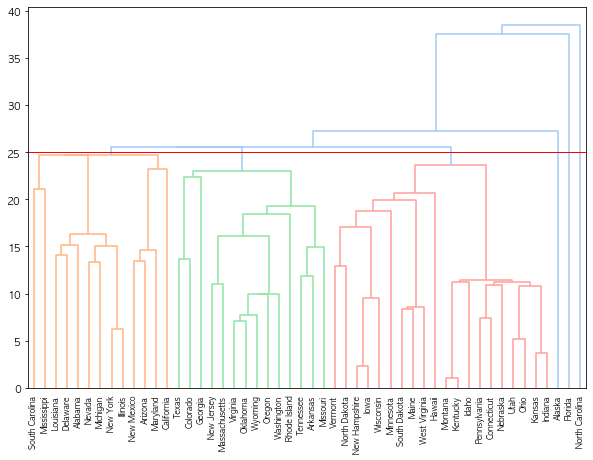

In [358]:
### 최단연결법
# 군집 별 관측치 거리의 최소값으로 거리 측정
# 군집의 객체 수가 비슷하지 않을 수 있음 
single = linkage(usarrests.iloc[:, 1::], metric='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            color_threshold=25,# 군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


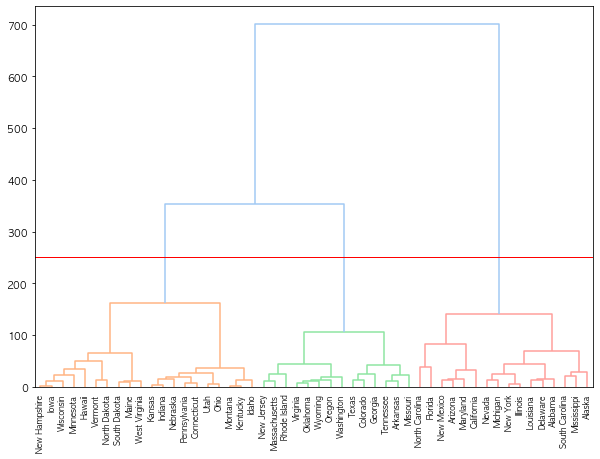

In [359]:
### 와드연결법
# 최단연결법의 단점 보완. 군집 내 오차(SSE)에 기반한 거리 측정
# 상대적으로 계산량이 많지만, 해석력이 높음
ward = linkage(usarrests.iloc[:, 1::], metric='euclidean', method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


In [360]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [361]:
usarrests['cluster'] = assignments
usarrests.groupby('cluster').mean()

Murder     Assault   UrbanPop       Rape
cluster                                             
1        11.812500  272.562500  68.312500  28.375000
2         8.214286  173.285714  70.642857  22.842857
3         4.270000   87.550000  59.750000  14.390000

In [362]:
from sklearn.cluster import AgglomerativeClustering

In [363]:
x = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(x)

In [364]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [365]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [366]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

In [367]:
import gower

In [368]:
x = defaults[['dti', 'payment_inc_ratio', 'home_', 'purpose_']].loc[0:4, :]
x

dti  payment_inc_ratio home_            purpose_
0   1.00            2.39320  RENT      major_purchase
1   5.55            4.57170   OWN      small_business
2  18.08            9.71600  RENT               other
3  10.08           12.21520  RENT  debt_consolidation
4   7.06            3.90888  RENT               other

In [369]:
dist_matrix = gower.gower_matrix(x)
model_average = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed')
clusters_average = model_average.fit_predict(dist_matrix)
clusters_average

array([0, 1, 0, 0, 0])

#### HDBSCAN
- Hierachical DBSCAN
- 계층적 구조 및 Local density에 대한 정보 반영
- HDBDCAN Steps
    - Transform the space according to the density/sparsity.
    - Build the minimum spanning tree of the distance weighted graph.
    - Construct a cluster hierarchy of connected components.
    - Condense the cluster hierarchy based on minimum cluster size.
    - Extract the stable clusters from the condensed tree.

In [370]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

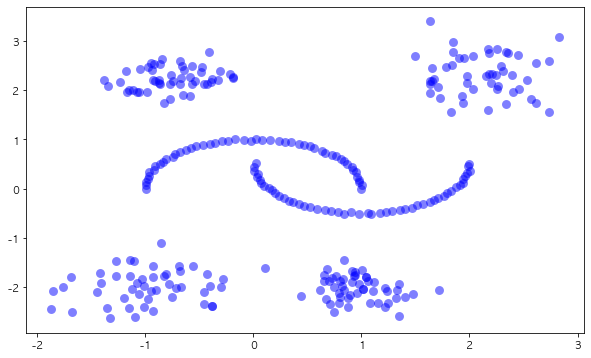

In [371]:
num=100
moons, _ = make_moons(n_samples=num, noise=0.01)
blobs, _ = make_blobs(n_samples=num, centers=[(-0.75,2.25), (1.0, -2.0)], cluster_std=0.25)
blobs2, _ = make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)
test_data = np.vstack([moons, blobs,blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', alpha=0.5, s=80, linewidths=0)
plt.show()

In [372]:
# !pip install hdbscan
import hdbscan

In [373]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True) # min_size는 없을 경우 min_cluster_size로 자동 생성
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

<AxesSubplot:>

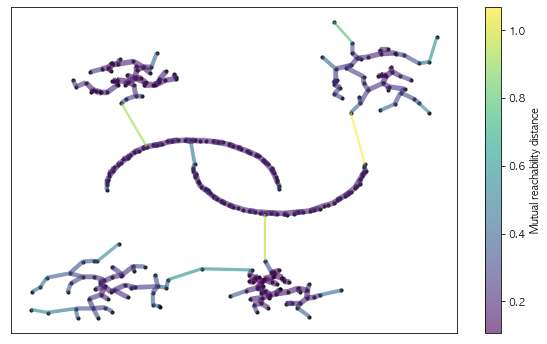

In [374]:
# Cluster hierachy tree 
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=10, 
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

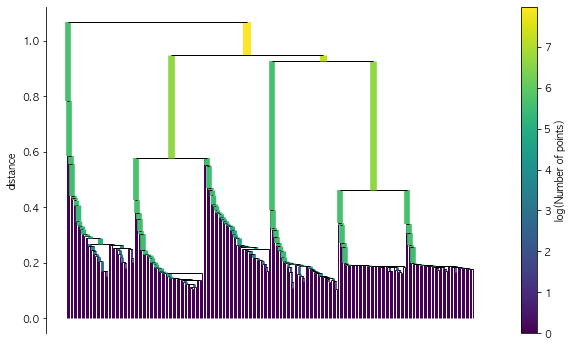

In [375]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True) # dendrogram

<AxesSubplot:ylabel='$\\lambda$ value'>

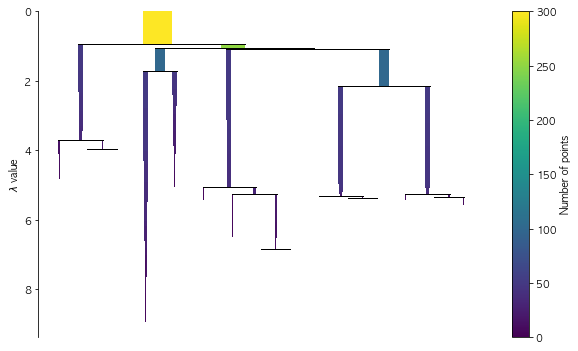

In [376]:
# 일정 distance 미만의 데이터(minimum size 미만의 클러스터)를 noise로 처리
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

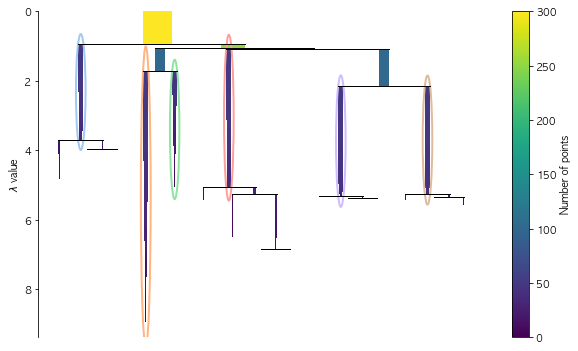

In [377]:
# 안정적인 클러스터 추출 (오래 살아남은 클러스터)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

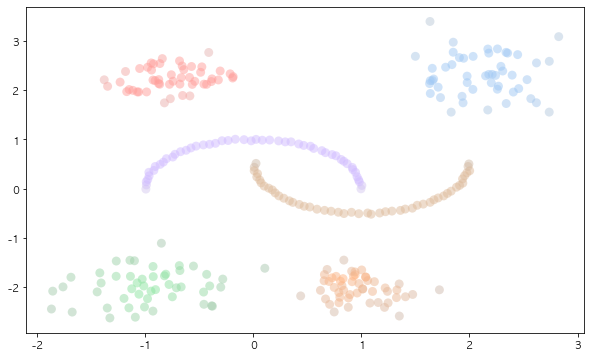

In [378]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, alpha=0.5, s=80, linewidths=0)

### (4) Clustering: Non-hierarchical

#### K-Means
- 군집 개수만큼 초기값을 지정하고 초기 군집을 형상한 후, 평균을 재계산하여 값 갱신
- 초기 센트로이드는 K-means++ 알고리즘이 기본값 (random보다 좋음)
- 이상치 영향을 많이 받을 수 있고, 볼록한 군집 형태가 아니면 성능이 떨어짐
- 변수가 많은 경우 정확도가 떨어짐 (PCA 고려)
- 최적의 K 판단
    - Calinski_harabasz: 높을수록 성능이 좋음
    - Elbow: SSE가 급격하게 줄거나, 기울기가 소실되는 구간 판단
    - Silhouette score, silhouette plot: 샘플 개수 실루엣 계수 종합적으로 판단
        - 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 판단
        - (b-a)/max(a, b). a는 클러스터 내 다른 샘플까지의 평균 거리, b는 가장 가까운 클러스터까지 평균 거리

In [379]:
x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(x.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [380]:
cluster = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
cluster['target'] = y
cluster.head(3)

ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0

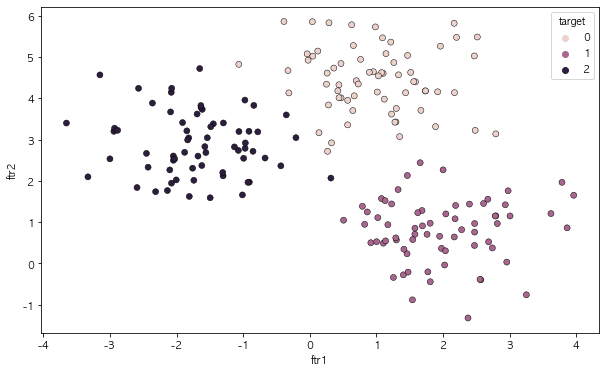

In [381]:
sns.scatterplot(x=cluster['ftr1'], y=cluster['ftr2'], edgecolor='black', hue=cluster['target'])
plt.show()

In [382]:
from sklearn.cluster import KMeans

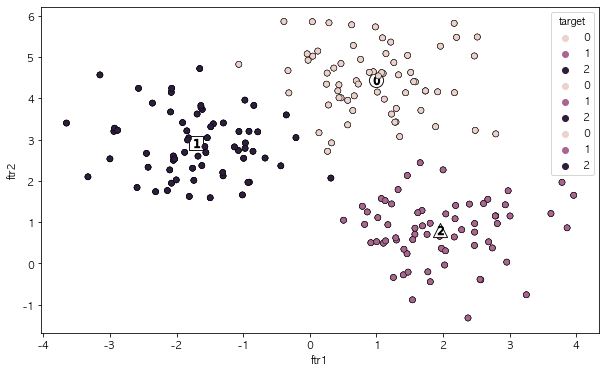

In [383]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(x)
cluster['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cluster[cluster['kmeans_label']==label]
    center_x_y = centers[label]
    sns.scatterplot(x=cluster['ftr1'], y=cluster['ftr2'], edgecolor='black', hue=cluster['target'])
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [384]:
print(cluster.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [385]:
### another blobs
blob_centers = np.array([[ 0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

x, y = make_blobs(n_samples=1000, centers=blob_centers, cluster_std=blob_std, random_state=7)

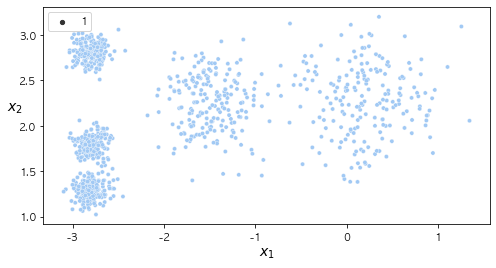

In [386]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x[:, 0], y=x[:, 1], size=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

In [387]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)

# cluster 중심
kmeans.cluster_centers_[:20]

array([[-2.80248802,  2.8023078 ],
       [ 0.20088156,  2.2751718 ],
       [-2.80906999,  1.29323645],
       [-1.47273449,  2.25383102],
       [-2.77986689,  1.79516229]])

In [388]:
# labels
kmeans.labels_[:20]

array([0, 1, 1, 2, 0, 4, 1, 1, 1, 0, 1, 3, 4, 3, 4, 4, 3, 1, 1, 2],
      dtype=int32)

In [389]:
x_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(x_new)

array([1, 1, 0, 0], dtype=int32)

In [390]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), inewidths=1, colors='k')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], color='black', size=2)
    
    if show_centroids:
        centroids = clusterer.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color='w', zorder=10, alpha=0.9)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color='k', zorder=11, alpha=1)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

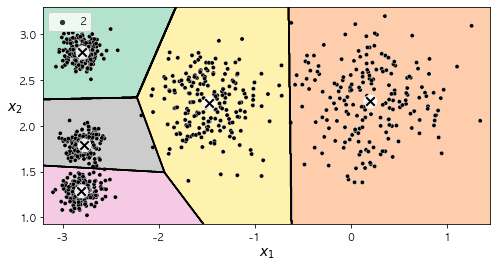

In [391]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, x)
plt.show()

In [392]:
### 하드 군집
# 각 샘플에 대해 가장 가까운 클러스터 선택

### 소프트 군집
# 클러스터마다 샘플에 점수 부여
# 중심과의 유클리드 거리
kmeans.transform(x_new)

array([[2.91507065, 0.34069476, 2.8966168 , 1.49444875, 2.78740353],
       [5.85769281, 2.81261152, 5.85190643, 4.47993125, 5.78349546],
       [0.27945159, 3.28192302, 1.7174097 , 1.69979648, 1.22478264],
       [0.36111077, 3.20876775, 1.22177434, 1.54697741, 0.7384137 ]])

##### Inertia

In [393]:
### 이너셔
#각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
# 랜덤 초기화를 하여 여러 번 알고리즘을 실행한 다음, 이너셔가 낮은 모델 선택
kmeans.inertia_

104.89322309085537

In [394]:
# score는 음수 출력 (클 수록 좋은 것 규칙)
kmeans.score(x)

-104.89322309085537

In [395]:
# n_init 지정 가능 (default 10)
kmeans_rnd_10_inits = KMeans(n_clusters=5, n_init=10, init="random", algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(x)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

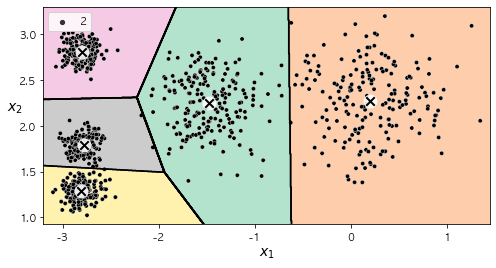

In [396]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, x)
plt.show()

In [397]:
### elkan 알고리즘 (default) 은 더 빠르지만, 희소 행렬은 지원하지 않음
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(x)

72.8 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [398]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(x)

52.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


##### Minibatch K-means

In [399]:
from sklearn.cluster import MiniBatchKMeans

In [400]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(x)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [401]:
minibatch_kmeans.inertia_

104.90898558895428

In [402]:
### mnist data
x_train, x_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [403]:
# memmap 사용
filename = "my_mnist.data"
x_mm = np.memmap(filename, dtype='float32', mode='write', shape=x_train.shape)
x_mm[:] = x_train

In [404]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(x_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [405]:
# batch load
def load_next_batch(batch_size):
    return x[np.random.choice(len(x), batch_size, replace=False)]

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None
np.random.seed(42)
for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    x_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(x_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        x_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(x_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
        
best_kmeans.score(x)

-104.91647497929381

In [406]:
# 시간 비교
times = np.empty((20, 2))
inertias = np.empty((20, 2))
for k in range(1, 21):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 20), end="")
    times[k-1, 0] = timeit("kmeans_.fit(x)", number=3, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(x)", number=3, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

20/20

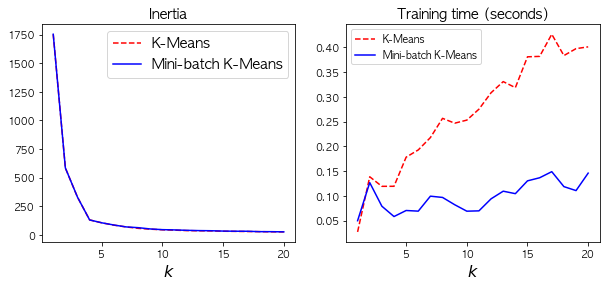

In [407]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.lineplot(x=range(1, 21), y=inertias[:, 0], color="red", linestyle="dashed", label="K-Means")
sns.lineplot(x=range(1, 21), y=inertias[:, 1], color="blue", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
sns.lineplot(x=range(1, 21), y=times[:, 0], color="red", linestyle="dashed", label="K-Means")
sns.lineplot(x=range(1, 21), y=times[:, 1], color="blue", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.show()

##### Cohesion, Separation
- Cohesion(응집도): 클러스터 내의 모든 거리 가중치의 합. 클러스터 내의 객체들이 밀집해있는 정도를 측정함(=SSE, inertia)
- Separation(분리도): 클러스터 외부 객체 간의 모든 거리 가중치의 합으로, 클러스터 간 잘 분리되어 있는 정도를 측정함. 각 클러스터의 중심점과의 pairwise 거리 최소값으로 측정

In [408]:
from sklearn.metrics import pairwise_distances_argmin_min

In [409]:
d = pairwise_distances_argmin_min(kmeans.cluster_centers_, x)[1]

print(f'군집결과의 응집도는 {round(kmeans.inertia_, 3)}, 분리도는 {round(sum(d) / len(d), 3)}')

군집결과의 응집도는 104.893, 분리도는 0.014


##### Best K
- Elbow method
- Silhuette score
- Calinski-harabasz score

In [410]:
### elbow plot
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

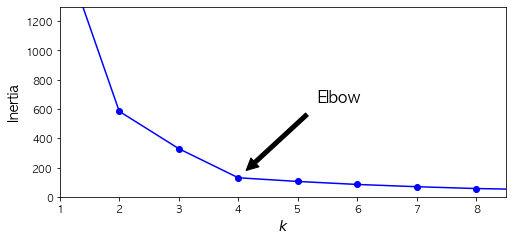

In [411]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction', 
             fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()

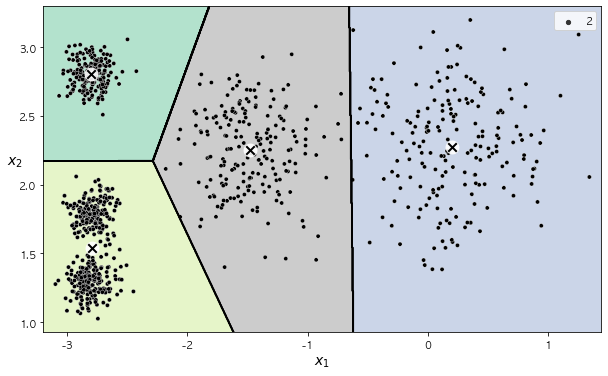

In [412]:
plot_decision_boundaries(kmeans_per_k[4-1], x)
plt.show()

In [413]:
from sklearn.metrics import silhouette_score

In [414]:
### silhouette score
# 전체 평균이 1에 가까울수록 좋음
# 군집의 스코어 편차가 작은 것이 좋음
silhouette_score(x, kmeans.labels_)

0.6591912689661514

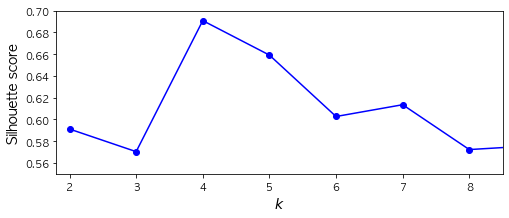

In [415]:
silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [416]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

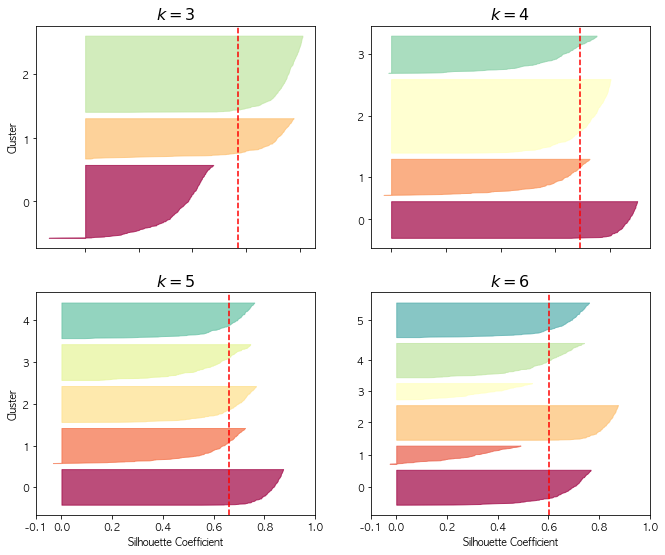

In [417]:
### silhouette diagram
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x, y_pred)

    padding = len(x) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [418]:
x = iris.drop('Class', axis=1)
x.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [419]:
### elbow plot
def elbow(x):
    sse=[]
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
    print(sse)

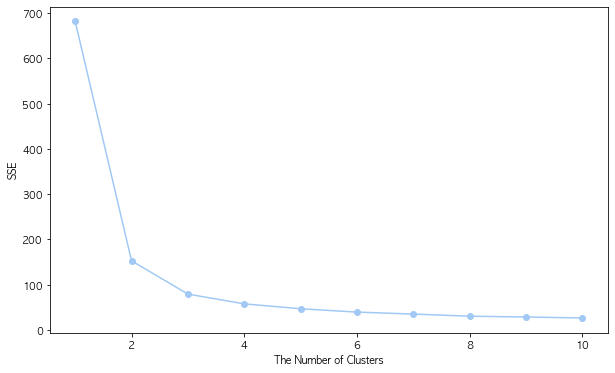

[681.3706, 152.34795176035792, 78.85144142614601, 57.256009315718146, 46.44618205128205, 39.066035353535355, 34.723277629233515, 29.99042640692641, 28.278674715635248, 26.094089542638308]


In [420]:
elbow(x)

In [421]:
from sklearn.metrics import calinski_harabasz_score

In [422]:
# 클러스터별 콜린스키 하라바츠 결과 비교
# 가장 높은 값 선택
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(x, labels))

513.9245459802768
561.62775662962
530.4871420421675
495.54148767768777
473.5154538824768
443.84523107907245
440.59767319067873
407.0468400265113


In [423]:
# 최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(x)

# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.drop('Class', axis=1).groupby(['cluster']).mean()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 5.901613          2.748387           4.393548   
1                 5.006000          3.428000           1.462000   
2                 6.850000          3.073684           5.742105   

         petal width (cm)  
cluster                    
0                1.433871  
1                0.246000  
2                2.071053

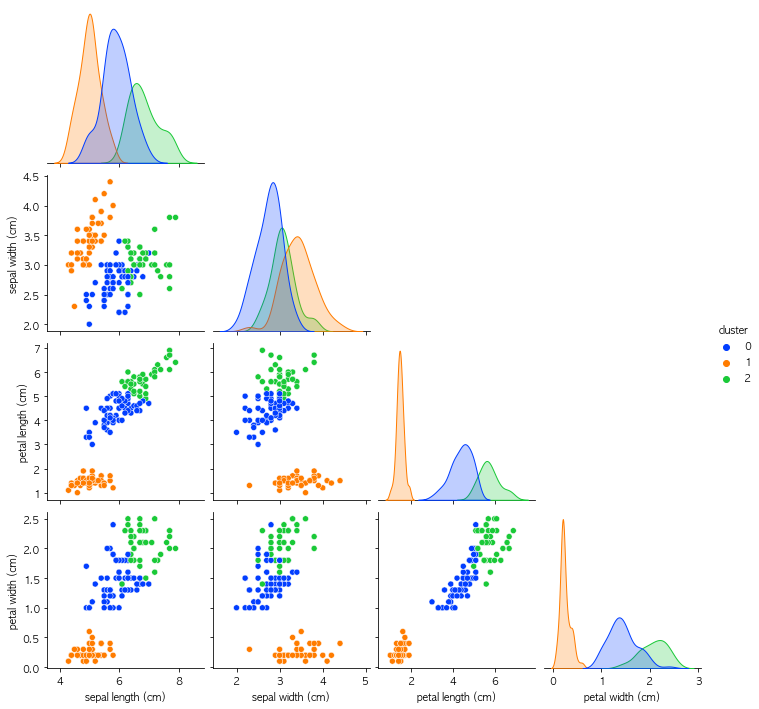

In [424]:
# k-means 시각화 
# 군집결과 시각화
sns.pairplot(iris, diag_kind='kde', hue="cluster", corner=True, palette='bright')
plt.show()


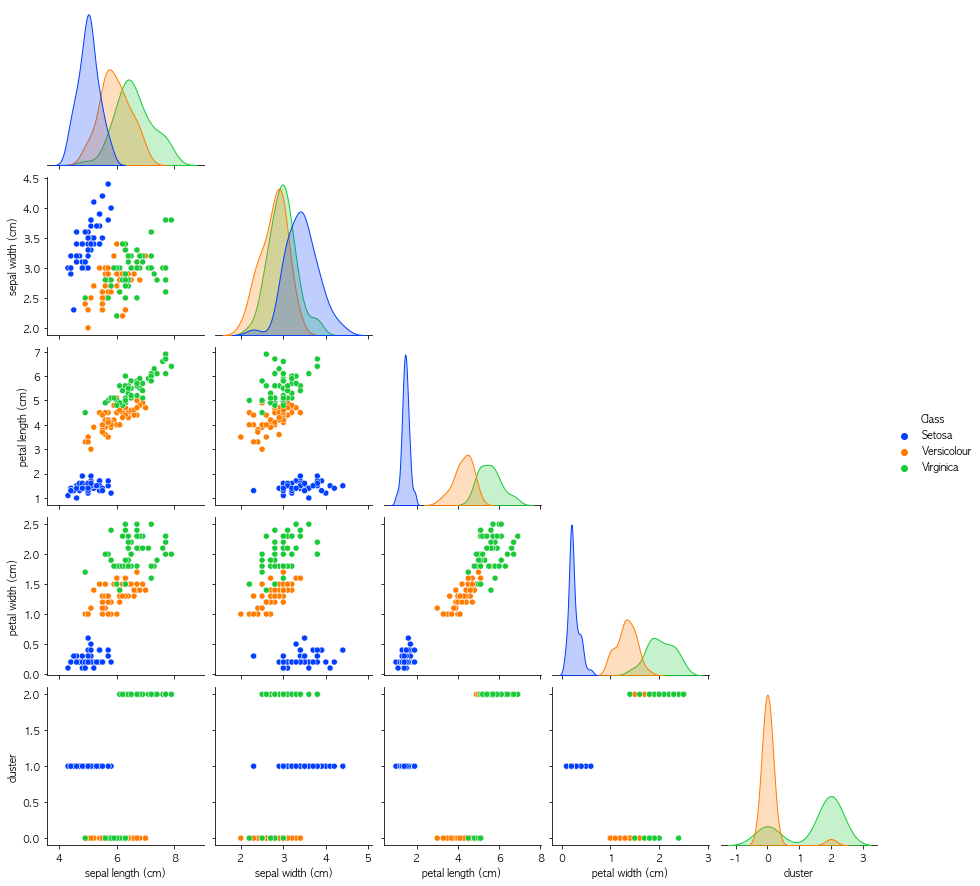

In [425]:
### 원본 class와 비교
sns.pairplot(iris, diag_kind='kde', hue="Class", corner=True, palette='bright')
plt.show()

In [426]:
iris_result = iris.groupby(['Class', 'cluster'])['sepal length (cm)'].count()
print(iris_result)

Class        cluster
Setosa       1          50
Versicolour  0          48
             2           2
Virginica    0          14
             2          36
Name: sepal length (cm), dtype: int64


In [427]:
from sklearn.decomposition import PCA

In [428]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(x)

iris['pca_x'] = pca_transformed[:,0]
iris['pca_y'] = pca_transformed[:,1]
iris.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

    Class  cluster     pca_x     pca_y  
0  Setosa        1 -2.684126  0.319397  
1  Setosa        1 -2.714142 -0.177001  
2  Setosa        1 -2.888991 -0.144949

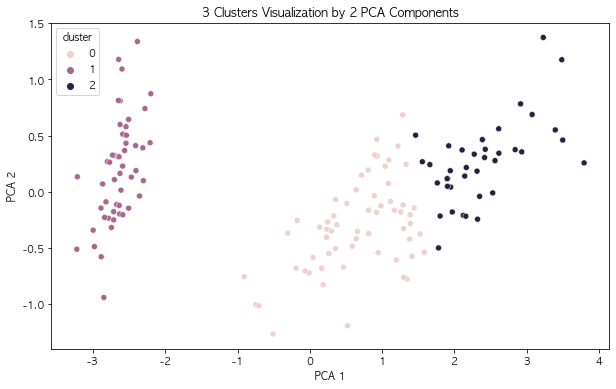

In [429]:
sns.scatterplot(x=iris['pca_x'], y=iris['pca_y'], hue=iris.cluster)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [430]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(x.iloc[:, :4], iris['cluster'])
print('silhouette_samples() return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
iris['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(x.iloc[:, :4], iris['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


In [431]:
iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [432]:
import matplotlib.cm as cm

In [433]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

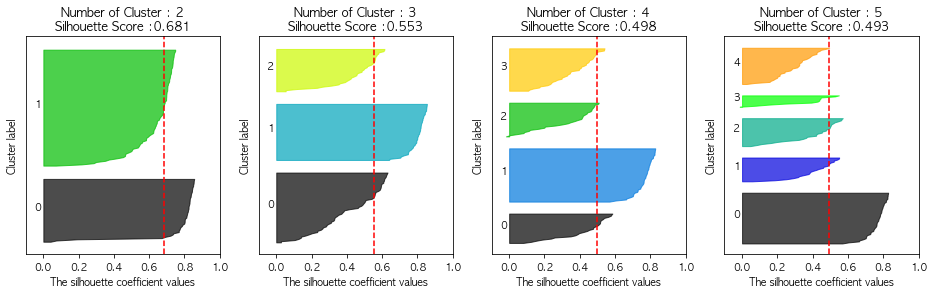

In [434]:
visualize_silhouette([2, 3, 4, 5], x.iloc[:, :4])

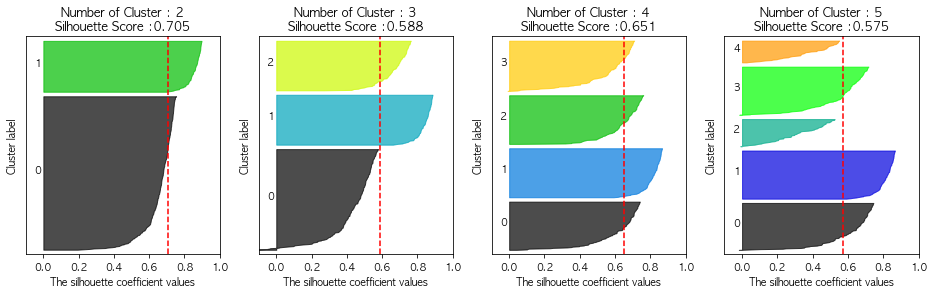

In [435]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
x, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], x)

In [436]:
# wine data
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline    Class  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

In [437]:
wine['Class'] = np.where(wine['Class']=='class_0', 0, np.where(wine['Class']=='class_1', 1, 2))

In [438]:
x = wine.drop('Class', axis=1)
y = wine['Class']

In [439]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled, columns=[x.columns])

In [440]:
# 클러스터별 콜린스키 하라바츠 결과 비교
# 가장 높은 값 선택
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(scaled)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(scaled, labels))

69.25508094364052
70.74301842860513
55.34262963272185
46.891949650326964
41.53465326257077
37.4145500510151
34.33092074746437
32.75036225847007


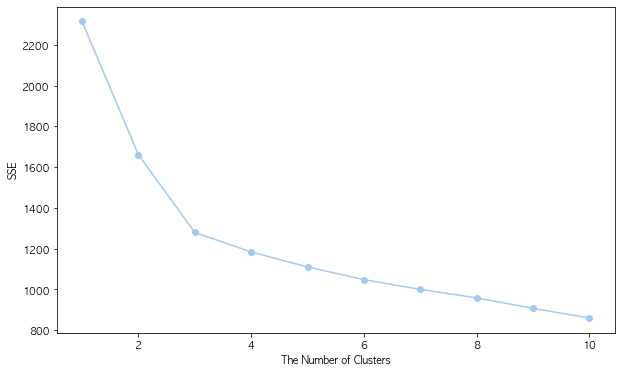

[2314.0, 1660.5731405564195, 1279.5193242054538, 1184.1264000570986, 1110.2544418911068, 1048.290820855525, 1000.5226455912729, 958.723454960076, 907.3396066550768, 860.1938374610759]


In [441]:
elbow(scaled)

In [442]:
#최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(x)

# 할당된 군집을 데이터에 추가
new_labels = km.labels_
wine['cluster'] = new_labels

wine.groupby(['cluster']).mean()

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        13.804468    1.883404  2.426170          17.023404  105.510638   
1        12.516667    2.494203  2.288551          20.823188   92.347826   
2        12.929839    2.504032  2.408065          19.890323  103.596774   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.867234    3.014255              0.285319         1.910426   
1             2.070725    1.758406              0.390145         1.451884   
2             2.111129    1.584032              0.388387         1.503387   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
cluster                                                                         
0               5.702553  1.078298                      3.114043  1195.148936   
1               4.001575  0.941159                      2.490725   458.231884   
2               5.316388  0.883968                      2.365484   728.338710   

            Class  
cluster            
0        0.021277  
1        1.275362  
2        1.258065

In [443]:
from sklearn.metrics import confusion_matrix

In [444]:
confusion_matrix(y, wine['cluster'])

array([[46,  0, 13],
       [ 1, 50, 20],
       [ 0, 19, 29]])

In [445]:
d = pairwise_distances_argmin_min(km.cluster_centers_, scaled_df)[1]

print(f'군집결과의 응집도는 {round(km.inertia_, 3)}, 분리도는 {round(sum(d) / len(d), 3)}')

군집결과의 응집도는 2370523.009, 분리도는 798.379


##### K-means 활용

In [446]:
### 데이터 전처리 with K-means
# digit data
x_digits, y_digits = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, random_state=42)

In [447]:
from sklearn.linear_model import LogisticRegression

In [448]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [449]:
log_reg_score = log_reg.score(x_test, y_test) # 기본 모델 정확도
log_reg_score

0.9688888888888889

In [450]:
from sklearn.pipeline import Pipeline

In [451]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50, random_state=42)), # K-means 추가
                     ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [452]:
pipeline_score = pipeline.score(x_test, y_test)
pipeline_score

0.9777777777777777

In [453]:
from sklearn.model_selection import GridSearchCV

In [454]:
### 최적의 K 찾기
param_grid = dict(kmeans__n_clusters=range(85, 95))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............................kmeans__n_clusters=85; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=85; total time=   6.1s
[CV] END ..............................kmeans__n_clusters=85; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=86; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=86; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=86; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=87; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=87; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=87; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=88; total time=   5.6s
[CV] END ..............................kmeans__n_clusters=88; total time=   5.7s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(85, 95)}, verbose=2)

In [455]:
grid_clf.best_params_

{'kmeans__n_clusters': 86}

In [456]:
grid_clf.score(x_test, y_test)

0.9822222222222222

In [457]:
### Semi-supervised learning
# base model
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])
log_reg.score(x_test, y_test)

0.8333333333333334

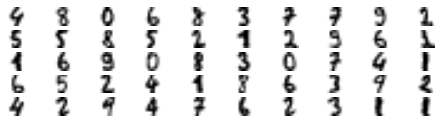

In [458]:
# 대표 이미지 labeling 후 학습
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)
representative_digit_idx = np.argmin(x_digits_dist, axis=0)
x_representative_digits = x_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, x_representative_digit in enumerate(x_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(x_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [459]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [460]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [461]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_representative_digits, y_representative_digits)
log_reg.score(x_test, y_test)

0.09555555555555556

In [462]:
# label 전체 전파
y_train_propagated = np.empty(len(x_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [463]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [464]:
log_reg.score(x_test, y_test)

0.15333333333333332

In [465]:
# 센트로이드 근처 75%에 label 전파
percentile_closest = 75

x_cluster_dist = x_digits_dist[np.arange(len(x_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_==i)
    cluster_dist = x_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (x_cluster_dist > cutoff_distance)
    x_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (x_cluster_dist!=-1)
x_train_partially_propagated = x_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [466]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [467]:
log_reg.score(x_test, y_test)

0.15777777777777777

In [468]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.19541375872382852

In [469]:
### Online retail - customer segmentation
# RFM 기법
# Recency: 가장 최근 상품 구입일에서 오늘까지 기간
# Frequency: 상품 구매 횟수
# Monetary value: 총 구매 금액
retail_df = pd.read_excel(io='./data/Online Retail.xlsx')
retail_df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom

In [470]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [471]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [472]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [473]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


In [474]:
# 주문 금액 컬럼 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [475]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [476]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [477]:
### 주문번호 기준 데이터를 고객 기준 데이터로 변경
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {'InvoiceDate': 'max',
                'InvoiceNo': 'count',
                'sale_amount':'sum'}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'sale_amount':'Monetary'})
cust_df = cust_df.reset_index()
cust_df.head(3)

CustomerID             Recency  Frequency  Monetary
0       12346 2011-01-18 10:01:00          1  77183.60
1       12747 2011-12-07 14:34:00        103   4196.01
2       12748 2011-12-09 12:20:00       4595  33719.73

In [478]:
# Recency 계산
cust_df['Recency'] = datetime.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days + 1)
print('cust_df 로우와 컬럼 건수는 ', cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        3        103   4196.01
2       12748        1       4595  33719.73

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

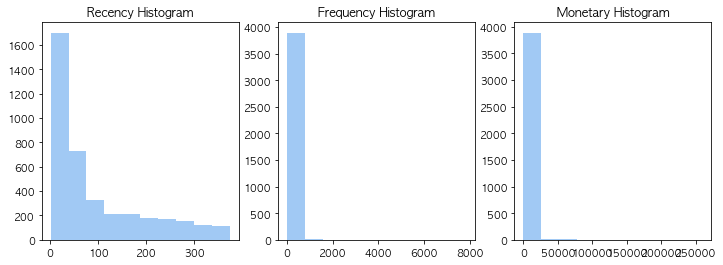

In [479]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [480]:
cust_df[['Recency','Frequency','Monetary']].describe()

Recency    Frequency       Monetary
count  3920.000000  3920.000000    3920.000000
mean     92.742092    90.388010    1864.385601
std      99.533485   217.808385    7482.817477
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     300.280000
50%      51.000000    41.000000     652.280000
75%     143.000000    99.250000    1576.585000
max     374.000000  7847.000000  259657.300000

In [481]:
x_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
x_features_scaled = StandardScaler().fit_transform(x_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(x_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [482]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

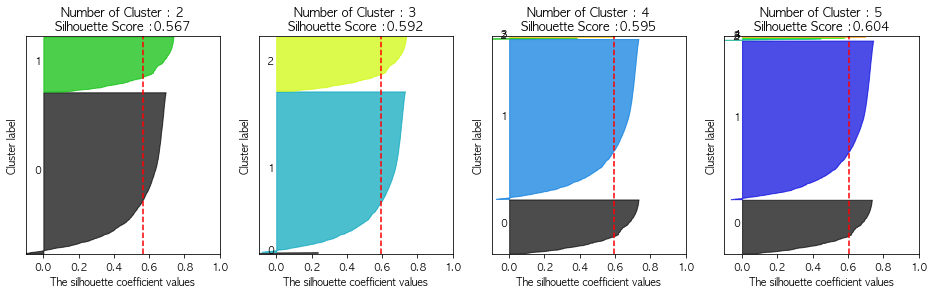

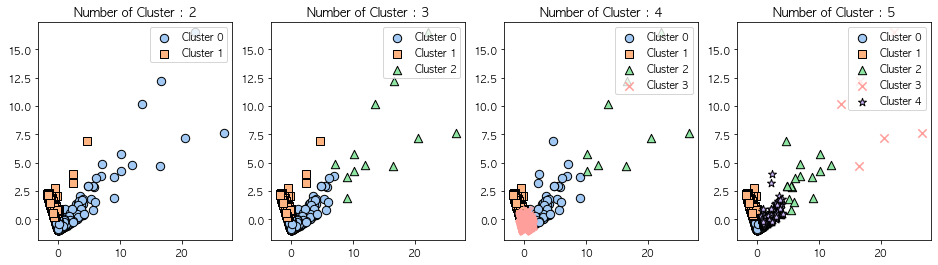

In [483]:
visualize_silhouette([2, 3, 4, 5], x_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], x_features_scaled)

In [484]:
### Log 변환을 통해 데이터 변환
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
x_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
x_features_scaled = StandardScaler().fit_transform(x_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(x_features_scaled, labels)))

실루엣 스코어는 : 0.303


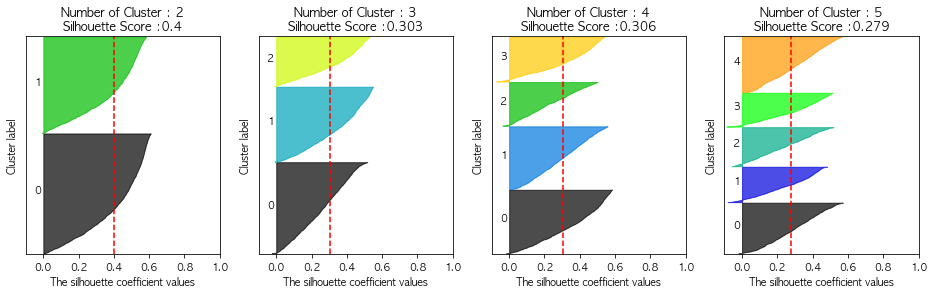

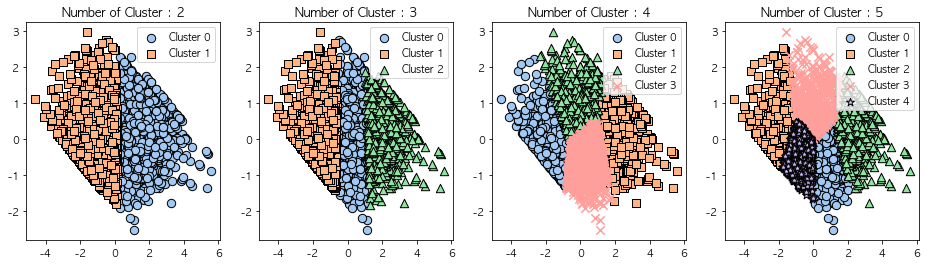

In [485]:
visualize_silhouette([2, 3, 4, 5], x_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], x_features_scaled)

#### K-medoids
- 평균 대신 중앙값 사용

In [486]:
x = iris.drop(['Class', 'cluster'], axis=1)

In [487]:
# !pip install scikit-learn-extra
# 제공되지 않는 패키지
from sklearn_extra.cluster import KMedoids

In [488]:
kme = KMedoids(n_clusters=3, metric='euclidean', random_state=1)
kme.fit(x)

# 할당된 군집을 iris 데이터에 추가
new_labels = kme.labels_
iris['cluster_kme'] = new_labels

iris.tail(10) # 군집이 조금 다르게 이루어졌음

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
140                6.7               3.1                5.6               2.4   
141                6.9               3.1                5.1               2.3   
142                5.8               2.7                5.1               1.9   
143                6.8               3.2                5.9               2.3   
144                6.7               3.3                5.7               2.5   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         Class  cluster     pca_x     pca_y  silhouette_coeff  cluster_kme  
140  Virginica        2  2.314155  0.183651          0.570234            2  
141  Virginica        2  1.922268  0.409203          0.410255            2  
142  Virginica        0  1.415236 -0.574916          0.232253            0  
143  Virginica        2  2.563013  0.277863          0.613247            2  
144  Virginica        2  2.418746  0.304798          0.567078            2  
145  Virginica        2  1.944110  0.187532          0.425136            2  
146  Virginica        0  1.527167 -0.375317          0.104171            2  
147  Virginica        2  1.764346  0.078859          0.314930            2  
148  Virginica        2  1.900942  0.116628          0.352454            2  
149  Virginica        0  1.390189 -0.282661          0.185442            0

#### Mean Shift
- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
- 데이터의 분포를 이용하여 군집 중심을 찾음
- KDE (Kernel Density Estimation) 이용
    - 적절한 KDE bandwidth(h) 제공이 중요
    - 작을수록 좁고 뾰족한 KDE이며, overfitting 확률이 높음

In [489]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [490]:
x, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [ 0  1  2  3  4  5  6  7  8  9 10]


In [491]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3]


In [492]:
bandwidth = estimate_bandwidth(x)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.754


In [493]:
cluster = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
cluster['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(x)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


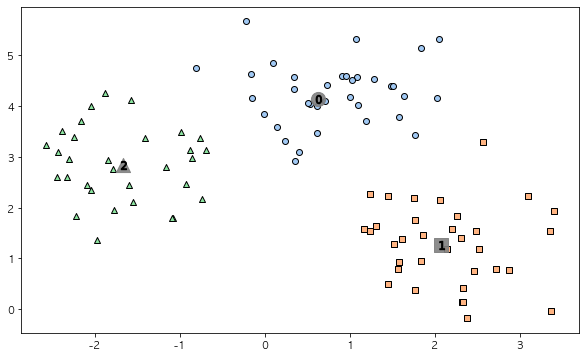

In [494]:
cluster['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = cluster[cluster['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [495]:
print(cluster.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  33
        1                   1
1       1                  33
2       2                  31
        0                   2
Name: meanshift_label, dtype: int64


#### Mixture distribution
- 분포 기반 군집분석. 어느 모형(분포)에서 나왔을 확률이 높은지를 계산하며, 통계적으로 엄밀한 결과를 얻을 수 있음
- 일반적으로 타원형 클러스터를 가정
- 주로 정규분포를 가정하나, 다른 분포여도 상관없음
- 군집의 크기가 너무 작거나, 가정한 분포와 실제 데이터의 차이가 크면 성능이 떨어짐
- 이상치 처리, scaling 필요
- EM(Expectation-Maximization) Algorithm
    - 초기값 설정
    - 잠재변수 Z의 기대치 계산 (X가 특정 군집에 속할 확률)
    - 기대치를 이용해 파라미터 추정 (계산된 확률로 모수 추정)
    - 반복 정지. Likelihood가 최대가 될 때 수렴함

In [496]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [497]:
df = iris.drop(['pca_x', 'pca_y', 'silhouette_coeff'], axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Class', axis=1))

In [498]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [499]:
df['gmm_cluster'] = gmm_labels

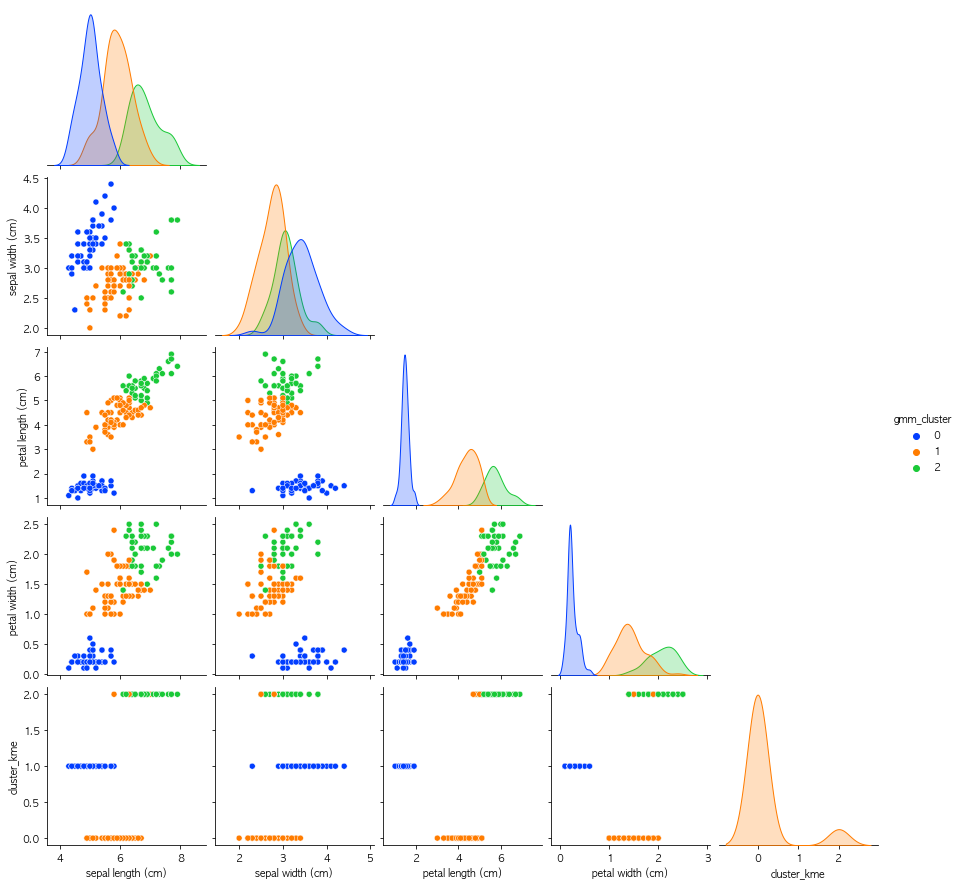

In [500]:
# 군집결과 시각화
sns.pairplot(df.drop('cluster', axis=1), diag_kind='kde', hue="gmm_cluster", corner=True, palette='bright')
plt.show()

In [501]:
# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = df.groupby(['Class'])['gmm_cluster'].value_counts()
print(iris_result)

Class        gmm_cluster
Setosa       0              50
Versicolour  1              48
             2               2
Virginica    2              36
             1              14
Name: gmm_cluster, dtype: int64


In [502]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, is_center=True):
    if is_center:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    is_noise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            is_noise = True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if is_center:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    if is_noise:
        legend_loc = 'upper center'
    else: legend_loc = 'upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

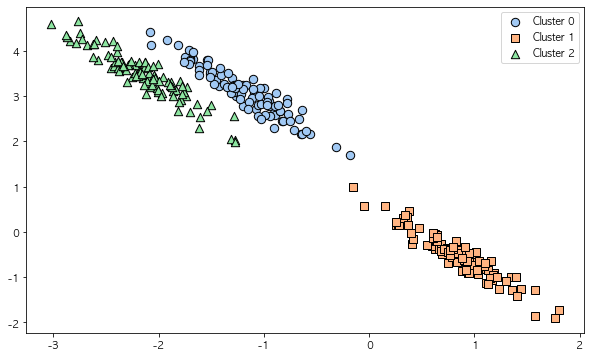

In [503]:
### 길게 늘어난 타원형의 데이터 셋 -> KMeans는 잘 클러스터링 하지 못하는 데이터
# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
x, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 데이터 변환 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_aniso = np.dot(x, transformation)
# feature 데이터 셋과 make_blobs(x) 의 y 결과 값을 DataFrame으로 저장
cluster = pd.DataFrame(data=x_aniso, columns=['ftr1', 'ftr2'])
cluster['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, cluster, 'target', is_center=False)

In [504]:
# 3개의 n_components기반 GMM을 x_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(x_aniso).predict(x_aniso)
cluster['gmm_label'] = gmm_label

print('\n### Gaussian Mixture Clustering ###')
print(cluster.groupby('target')['gmm_label'].value_counts())


### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


In [505]:
# faithful data
faithful.head()

eruptions  waiting
1      3.600       79
2      1.800       54
3      3.333       74
4      2.283       62
5      4.533       85

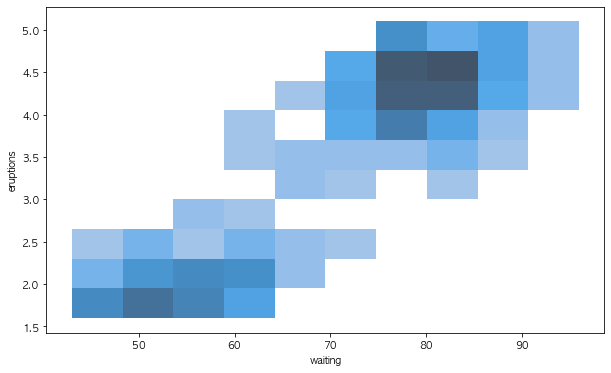

In [506]:
sns.histplot(x='waiting', y='eruptions', data=faithful)
plt.show()

In [507]:
scaler = StandardScaler()
faithful_scaled = scaler.fit_transform(faithful)

gmm = GaussianMixture(n_components=2)
gmm.fit(faithful_scaled)
gmm_labels = gmm.predict(faithful_scaled)
gmm_labels

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1])

In [508]:
faithful['gmm_cluster'] = gmm_labels

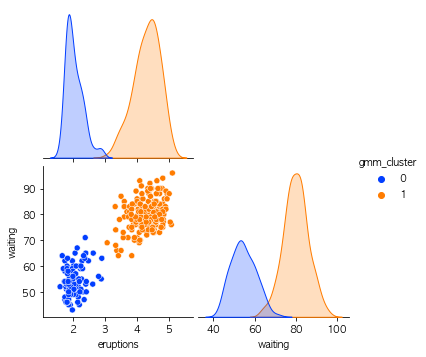

In [509]:
# 군집결과 시각화
sns.pairplot(faithful, diag_kind='kde', hue="gmm_cluster", corner=True, palette='bright')
plt.show()

In [510]:
### mixed blobs
x1, y1 = make_blobs(n_samples=100, centers=((4, -4), (0, 0)), random_state=42)
x1 = x1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

x2, y2 = make_blobs(n_samples=25, centers=1, random_state=42)
x2 = x2 + [6, -8]
x = np.r_[x1, x2] # array 붙이기
y = np.r_[y1, y2]

In [511]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [512]:
gm.weights_

array([0.2368444 , 0.39932141, 0.3638342 ])

In [513]:
gm.means_

array([[ 3.03543564,  0.86914847],
       [-1.53583314,  1.23734961],
       [-0.08868617, -0.16945711]])

In [514]:
gm.covariances_

array([[[ 1.0146403 , -0.23275168],
        [-0.23275168,  0.96153326]],

       [[ 0.62196185,  0.68773089],
        [ 0.68773089,  0.98949207]],

       [[ 0.45077719,  0.52738099],
        [ 0.52738099,  0.87891856]]])

In [515]:
# EM 수렴 여부
gm.converged_

True

In [516]:
# 반복 횟수
gm.n_iter_

4

In [517]:
# predict
gm.predict(x)
# gm.predict_proba(x)

array([2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [518]:
### 생성 모델의 특징
# 군집으로부터 샘플 생성
x_new, y_new = gm.sample(6)
print(x_new, y_new)

[[ 3.38161146  2.33254389]
 [-1.30325812  1.42244585]
 [-1.26539824 -1.49204408]
 [ 0.06338836  0.35687283]
 [ 0.31833122  0.17710092]
 [ 0.25208798 -0.72294966]] [0 1 2 2 2 2]


In [519]:
# PDF 추정
# 점수가 높을수록 밀도가 높음
gm.score_samples(x)

array([-2.03258751, -2.17086215, -3.83024553, -1.87464553, -2.65439074,
       -3.21340998, -1.88825542, -2.00479653, -3.70013238, -3.11569122,
       -1.8017335 , -2.46077275, -2.04730229, -2.14713553, -2.1567461 ,
       -2.75969012, -2.26919459, -3.29028438, -2.62688669, -1.92347127,
       -1.8871611 , -3.82034126, -2.65725966, -2.4852267 , -4.07835149,
       -2.07976823, -2.38125921, -2.79043898, -2.39074995, -3.29481999,
       -2.4716914 , -2.3641291 , -2.39344197, -2.5885198 , -3.25335674,
       -6.85948201, -1.99255213, -3.78256394, -3.11896251, -1.89247477,
       -2.20354285, -3.77759371, -2.15082132, -2.4956231 , -2.39714258,
       -3.23364606, -2.68880912, -4.24574108, -2.1881714 , -2.07733633,
       -2.8192741 , -2.6580395 , -4.35754584, -2.86530234, -3.19491375,
       -3.76411993, -4.31886138, -2.17667128, -1.93630751, -2.48742732,
       -2.23448788, -1.96927835, -3.87220062, -2.77161749, -2.11707028,
       -1.80923132, -4.47427538, -3.17801656, -1.86551829, -3.29

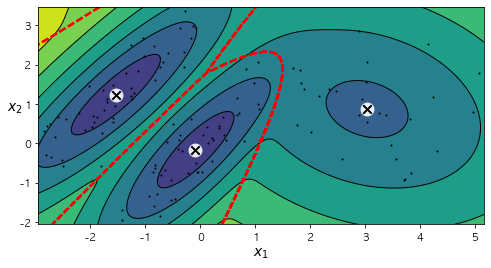

In [520]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    centroids = clusterer.means_[clusterer.weights_ > clusterer.weights_.max() / 10]
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color='k', zorder=11, alpha=1)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, x)
plt.show()

##### Covariance types
- full(기본값): 제약이 없습니다. 모든 클러스터가 어떤 크기의 타원도 될 수 있습니다.
- tied: 모든 클러스터가 동일하지만 어떤 타원도 가능합니다(즉, 공분산 행렬을 공유합니다).
- spherical": 모든 클러스터가 원형이지만 지름은 다를 수 있습니다(즉, 분산이 다릅니다).
- diag": 클러스터는 어떤 크기의 타원도 될 수 있지만 타원은 축에 나란해야 합니다(즉, 공분산 행렬이 대각 행렬입니다).

In [521]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

gm_full.fit(x)
gm_tied.fit(x)
gm_spherical.fit(x)
gm_diag.fit(x)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

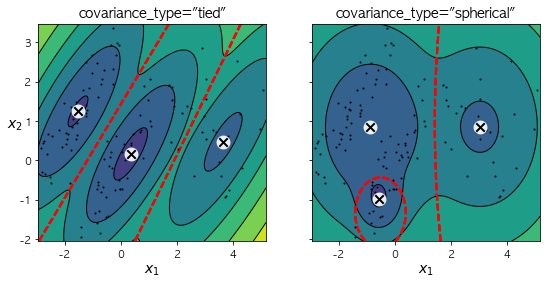

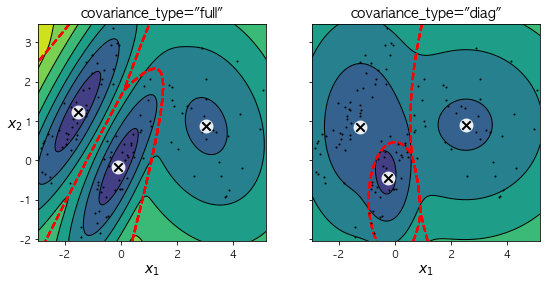

In [522]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_gaussian_mixture(gm_tied, x)
plt.title('covariance_type="{}"'.format(gm_tied.covariance_type), fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(gm_spherical, x, show_ylabels=False)
plt.title('covariance_type="{}"'.format(gm_spherical.covariance_type), fontsize=14)
plt.show()

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_gaussian_mixture(gm_full, x)
plt.title('covariance_type="{}"'.format(gm_full.covariance_type), fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(gm_diag, x, show_ylabels=False)
plt.title('covariance_type="{}"'.format(gm_diag.covariance_type), fontsize=14)
plt.show()

##### Outlier detection with Gaussian Mixture
- 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있음
- 사용할 밀도 임곗값을 결정해야 함

In [523]:
densities = gm.score_samples(x)
density_threshold = np.percentile(densities, 4) # 밀도 임계값 정의
anomalies = x[densities < density_threshold]

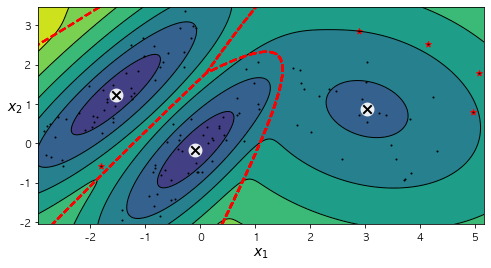

In [524]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, x)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()

##### Best K
- BIC, AIC 등 이론적 정보 기준 사용
- 과한 클러스터를 제한하고, 데이터의 잘 맞는 모델을 찾음

In [525]:
gm.bic(x)

853.0276656489054

In [526]:
gm.aic(x)

804.9463321147663

In [527]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(x) for k in range(1, 11)]

In [528]:
bics = [model.bic(x) for model in gms_per_k]
aics = [model.aic(x) for model in gms_per_k]

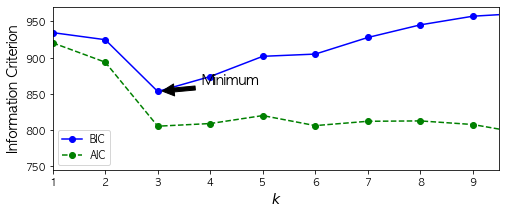

In [529]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [530]:
### Best K and covariance type
min_bic = np.infty
for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(x).bic(x)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [531]:
print(best_k, best_covariance_type)

4 tied


##### Bayesian Gaussian Mixture
- 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 수렴시킴
- 최적의 클러스터 개수보다 큰 컴포넌트의 개수 지정

In [532]:
from sklearn.mixture import BayesianGaussianMixture

In [533]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(x)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [534]:
np.round(bgm.weights_, 2) # 3개의 클러스터 감지

array([0.4 , 0.25, 0.34, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

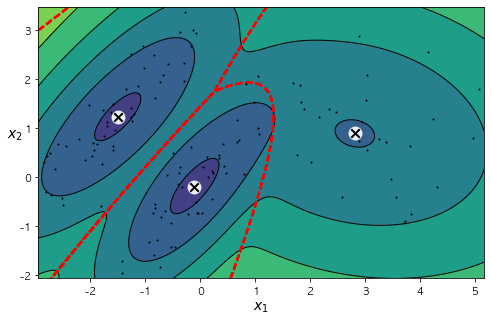

In [535]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, x)
plt.show()

In [536]:
### 클러스터 개수에 대한 사전 믿음(Prior belief) 지정
# weight_concentration_prior
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(x[:nn])
bgm_high.fit(x[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

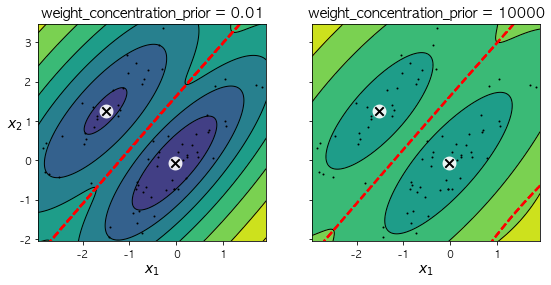

In [537]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, x[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, x[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)
plt.show()

In [538]:
### 반달 모양에는 잘 적합되지 않음
# 타원형에 적합
x_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [539]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(x_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

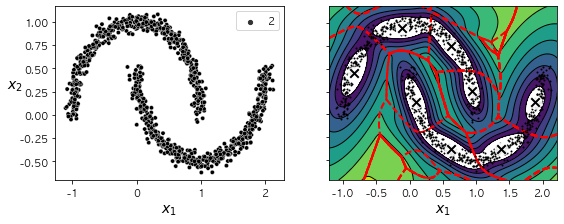

In [540]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
sns.scatterplot(x=x_moons[:, 0], y=x_moons[:, 1], color='black', size=2)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, x_moons, show_ylabels=False)

plt.show()

#### SOM
- Self-Organizing Maps
- unsupervised NN
- input layer - competitive layer (fully connected). 각 뉴런에서 거리를 구해, 승자 독점 학습

In [541]:
# !pip install minisom
from minisom import MiniSom

In [542]:
wine.reset_index(inplace=True, drop=True)
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Class  cluster  
0                          3.92   1065.0      0        0  
1                          3.40   1050.0      0        0  
2                          3.17   1185.0      0        0  
3                          3.45   1480.0      0        0  
4                          2.93    735.0      0        2

In [543]:
som_data = wine.drop(['Class', 'cluster'], axis=1)
som_target = wine['Class']

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
som_array = sc.fit_transform(som_data)

In [544]:
n_neurons = 5
m_neurons = 4

som = MiniSom(n_neurons, m_neurons, som_array.shape[1], sigma=1.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0)
som.random_weights_init(som_array)
som.train_random(data=som_array, num_iteration=100)

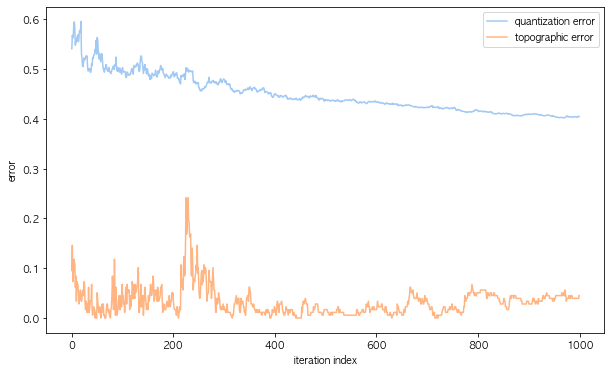

In [545]:
# iter에 따른 Error 시각화
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(som_array))
    som.update(som_array[rand_i], som.winner(som_array[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(som_array))
    t_error.append(som.topographic_error(som_array))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

In [546]:
som.winner(som_array[0])

(0, 2)

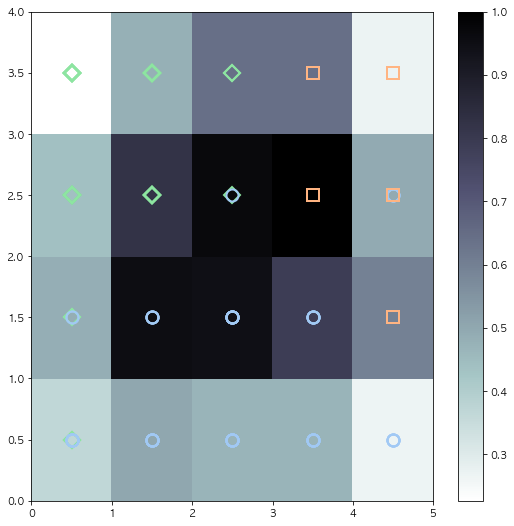

In [547]:
### SOM Visualization
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(som_array):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[som_target[cnt]-1], markerfacecolor='None', 
             markeredgecolor=colors[som_target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

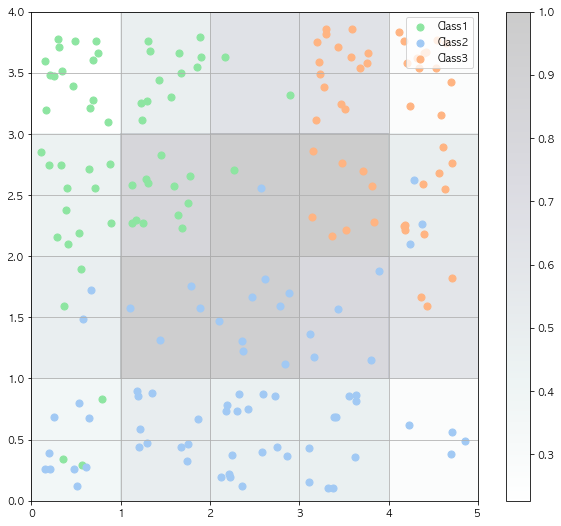

In [548]:
label_names = {0:'Class1', 1:'Class2', 2:'Class3'}

w_x, w_y = zip(*[som.winner(d) for d in som_array])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(som_target):
    idx_target = som_target==c
    plt.scatter(w_x[idx_target] + .5 + (np.random.rand(np.sum(idx_target)) - .5) * .8,
                w_y[idx_target] + .5 + (np.random.rand(np.sum(idx_target)) -.5) *.8, s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

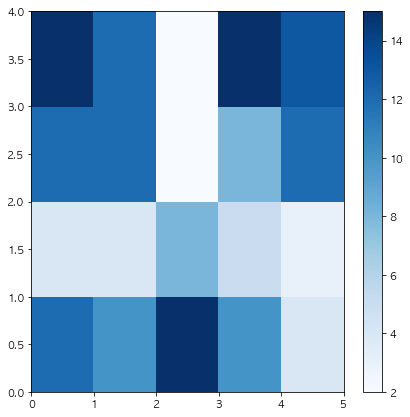

In [549]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(som_array)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [550]:
import matplotlib.gridspec as gridspec

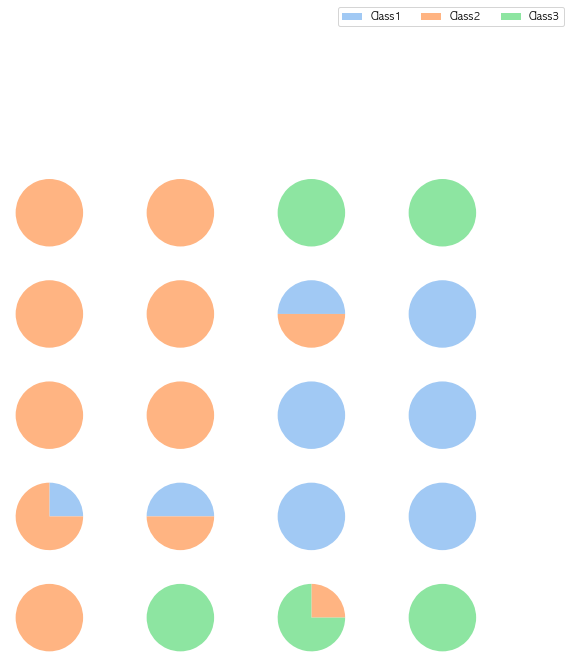

In [551]:
labels_map = som.labels_map(som_array, [label_names[t] for t in som_target.values])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[m_neurons-1-position[0], position[1]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(2, 3), ncol=3)
plt.show()

#### DBSCAN
- Density Based Spatial Clusting of Applications with Noise
- 군집 개수를 사전에 결정하지 않는 알고리즘
- 초기 군집 개수를 정해주지 않아도 됨
- 주변 epsilon 거리의 데이터를 군집으로 인식하고, 최소 군집 데이터 수를 정할 수 있음
    - epsilon-이웃
    - epsilon-이웃 안에 min_samples 이상의 샘플이 있다면, core instance (밀집 지역의 샘플)
    - core instance의 이웃은 동일한 클러스터
    - 클러스터에 들어가지 못하면 이상치로 판단 (-1)
- 반달 형태의 군집에 잘 적합
- 새로운 데이터의 군집 예측 불가 (예측이 필요하면 KNN Classifier 사용)

In [552]:
x, y = make_moons(n_samples=100, noise=0.05, random_state=42)

In [553]:
from sklearn.cluster import DBSCAN

In [554]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.05)

In [555]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [556]:
dbscan.core_sample_indices_[:10] # 핵심 샘플 index

array([], dtype=int64)

In [557]:
dbscan.components_[:3] # 핵심 샘플

array([], shape=(0, 2), dtype=float64)

In [558]:
np.unique(dbscan.labels_) # -1은 이상치

array([-1])

In [559]:
### 이웃 범위를 넓혀서 클러스터링
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(x)

DBSCAN(eps=0.2)

In [560]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

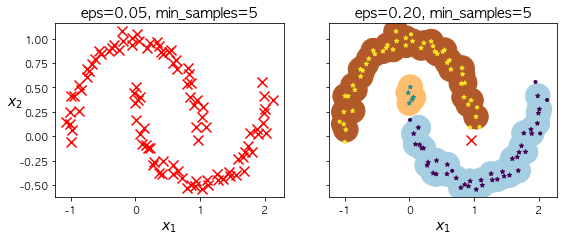

In [561]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x, size=600, show_ylabels=False)

plt.show()

In [562]:
from sklearn.neighbors import KNeighborsClassifier

In [563]:
### KNN을 이용한 새 데이터 예측 구현
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [564]:
x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(x_new)

array([2, 2, 0, 0])

In [565]:
knn.predict_proba(x_new)

array([[0.28, 0.1 , 0.62],
       [0.18, 0.1 , 0.72],
       [0.76, 0.02, 0.22],
       [0.6 , 0.  , 0.4 ]])

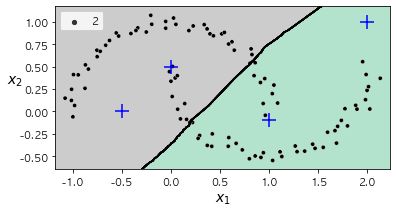

In [566]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, x, show_centroids=False)
plt.scatter(x_new[:, 0], x_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [567]:
y_dist, y_pred_idx = knn.kneighbors(x_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1, -1, -1, -1])

In [568]:
### iris data
feature = iris.iloc[:, :4]
feature.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [569]:
model = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')

In [570]:
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict],axis=1)
r['target'] = iris.Class
r.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   predict  target  
0        0  Setosa  
1        0  Setosa  
2        0  Setosa  
3        0  Setosa  
4        0  Setosa

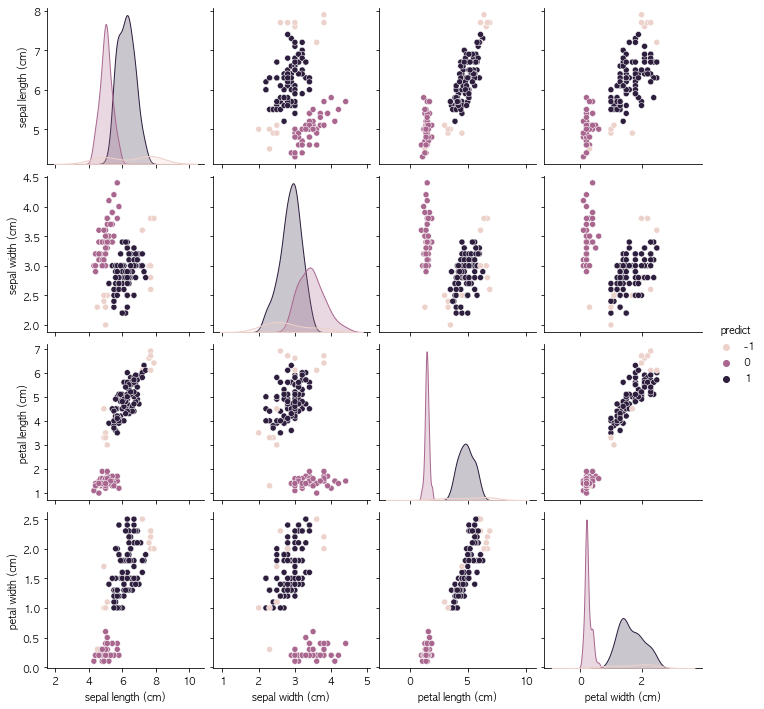

In [571]:
sns.pairplot(r, hue='predict')
plt.show()

In [572]:
iris_result = r.groupby(['target'])['predict'].value_counts()
print(iris_result)

target       predict
Setosa        0         49
             -1          1
Versicolour   1         46
             -1          4
Virginica     1         42
             -1          8
Name: predict, dtype: int64


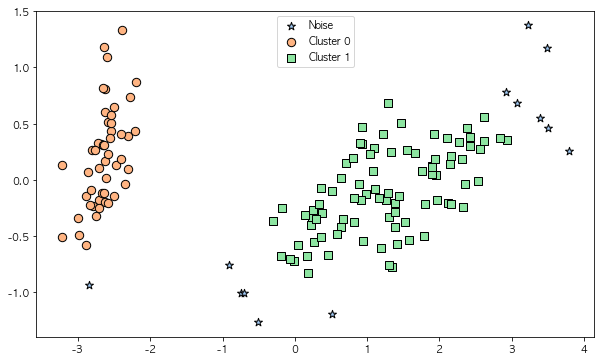

In [573]:
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(feature)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
r['ftr1'] = pca_transformed[:,0]
r['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(model, r, 'predict', is_center=False)

target       predict
Setosa        0         50
Versicolour   1         50
Virginica     1         47
             -1          3
Name: predict, dtype: int64


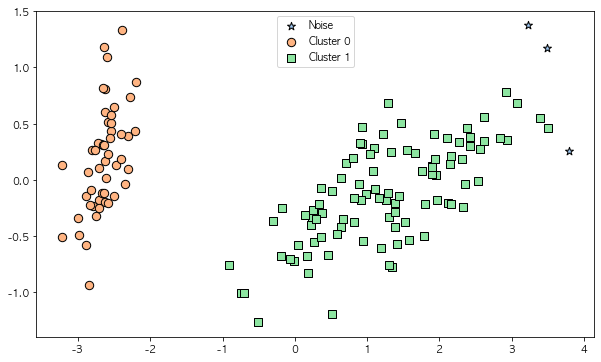

In [574]:
### eps 0.8로 상승 -> noise 감소
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature)

r['predict'] = dbscan_labels
r['target'] = iris.Class

iris_result = r.groupby(['target'])['predict'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, r, 'predict', is_center=False)

target       predict
Setosa        0         48
             -1          2
Versicolour   1         44
             -1          6
Virginica     1         36
             -1         14
Name: predict, dtype: int64


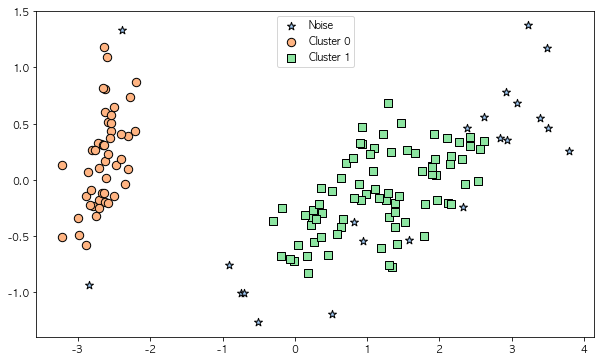

In [575]:
### min_samples 상승 -> noise 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature)

r['predict'] = dbscan_labels
r['target'] = iris.Class

iris_result = r.groupby(['target'])['predict'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, r, 'predict', is_center=False)

In [576]:
from sklearn.datasets import make_circles

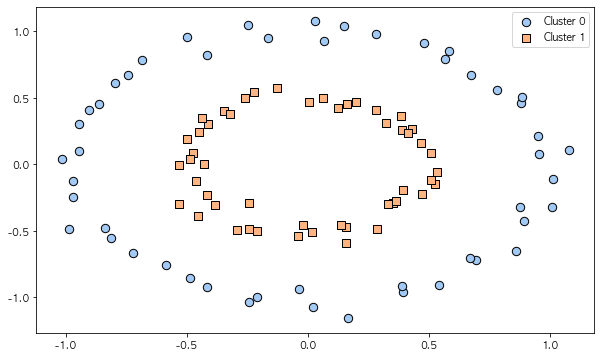

In [577]:
### make_circles dataset
x, y = make_circles(n_samples=100, shuffle=True, noise=0.05, random_state=0, factor=0.5)
cluster = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
cluster['target'] = y

visualize_cluster_plot(None, cluster, 'target', is_center=False)

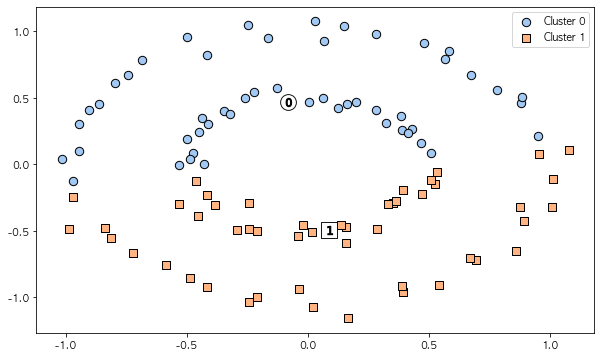

In [578]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(x)
cluster['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, cluster, 'kmeans_cluster', is_center=True)

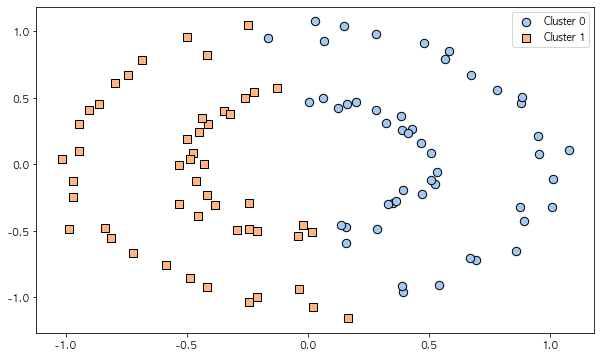

In [579]:
# GMM으로 make_circles() 데이터 셋을 클러스터링 수행. 
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(x).predict(x)
cluster['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, cluster, 'gmm_cluster', is_center=False)

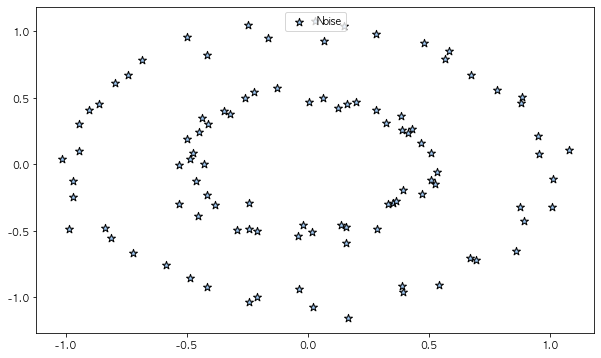

In [580]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x)
cluster['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, cluster, 'dbscan_cluster', is_center=False)

In [581]:
### Gower distance 사용
# 범주형 변수가 있는 경우
'''
import gower

distance_matrix = gower.gower_matrix(dataframe)
columns = [f'Customer_{i}' for i in range(1,11)]
distance_matrix = pd.DataFrame(distance_matrix, index=columns, columns=columns)

dbscan_cluster = DBSCAN(eps=0.3, min_samples=2, metric="precomputed")
dbscan_cluster.fit(distance_matrix)

dbscan_cluster.labels_
'''

'\nimport gower\n\ndistance_matrix = gower.gower_matrix(dataframe)\ncolumns = [f\'Customer_{i}\' for i in range(1,11)]\ndistance_matrix = pd.DataFrame(distance_matrix, index=columns, columns=columns)\n\ndbscan_cluster = DBSCAN(eps=0.3, min_samples=2, metric="precomputed")\ndbscan_cluster.fit(distance_matrix)\n\ndbscan_cluster.labels_\n'

#### Spectral clustering
- 샘플 사이 유사도 행렬을 받아 저차원 임베딩 (차원축소)
- 저차원 공간에서 군집 알고리즘 사용 (K-means)
- 샘플 개수가 많거나, 클러스터 크기가 다르면 성능 저하

In [582]:
from sklearn.cluster import SpectralClustering

In [583]:
sc1 = SpectralClustering(n_clusters=2, gamma=10, random_state=42)
sc1.fit(x)

sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(x)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [584]:
np.percentile(sc1.affinity_matrix_, 95)

0.6062259936328367

In [585]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

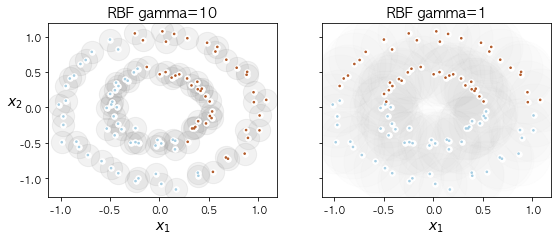

In [586]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, x, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, x, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### (5) Dimensional reduction
- Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법
- 데이터를 더 잘 설명할 수 있는 잠재적인 요소 추출
- 자료의 크기가 작을 경우 용이하고, 데이터가 크면 높은 차원이 유리할 수 있음

#### PCA
- Principal Component Analysis
- 자료의 변동이 최대한 보존되는 저차원 자료 생성
- SVD 알고리즘 기반으로 구현됨
-  PCA(SVD)는 반드시 StandardScaler로 스케일링 해야 함

In [587]:
from sklearn.decomposition import PCA

In [588]:
iris.drop(['pca_x', 'pca_y', 'silhouette_coeff', 'cluster_kme', 'cluster'], axis=1, inplace=True)

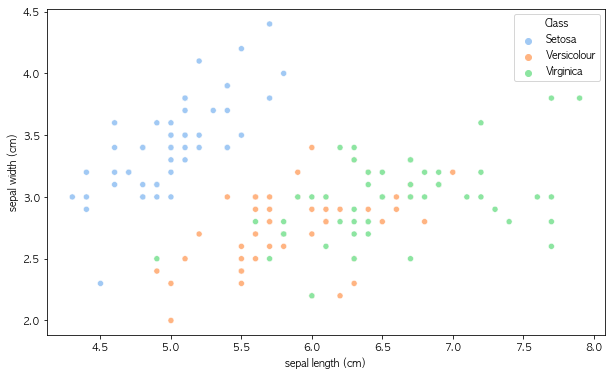

In [589]:
sns.scatterplot(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], hue=iris.Class)
plt.show()

In [590]:
x = iris.drop(columns = 'Class') # 수치형 데이터만 추출
x = StandardScaler().fit_transform(x) # 수치형 변수 정규화

pd.DataFrame(x).head()

0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444

In [591]:
# 주성분 추출
pca = PCA(n_components=len(iris.columns.difference(['Class'])))
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


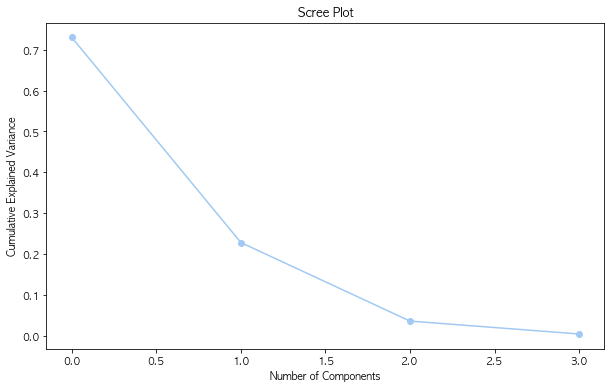

In [592]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [593]:
pca = PCA(n_components=2)                    
principal_components = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2']) 
principal_iris.head()

pc1       pc2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835

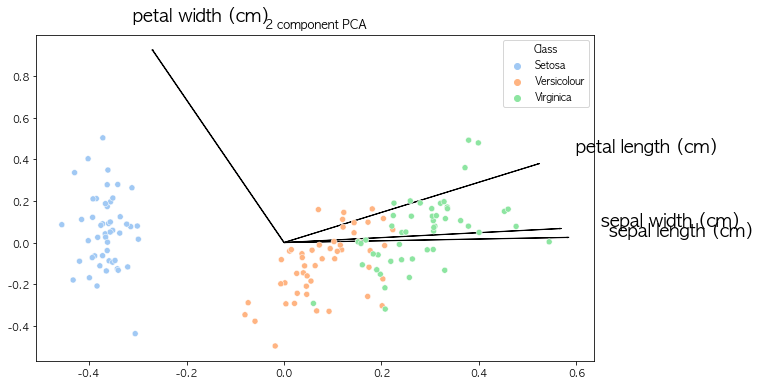

In [594]:
### Biplot
PC1 = pca.fit_transform(x)[:,0]
PC2 = pca.fit_transform(x)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = iris.columns.difference(['Class'])
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2, hue=iris.Class)
plt.title('2 component PCA')
plt.show()

In [595]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [596]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, x, iris.Class, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

pca_x = principal_iris[['pc1', 'pc2']]
scores_pca = cross_val_score(rcf, pca_x, iris.Class, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [597]:
### credit card
# !pip install xlrd
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
df = pd.read_excel('./data/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 24 columns]

In [598]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'}, inplace=True)
x = df.drop('default', axis=1)
y = df['default']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

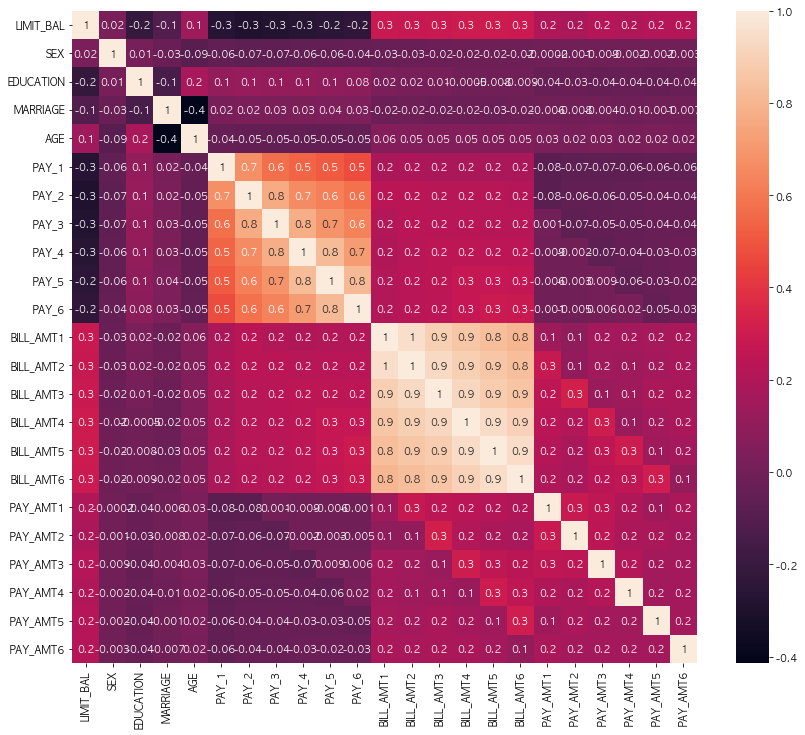

In [599]:
plt.figure(figsize=(14, 12))
sns.heatmap(x.corr(), annot=True, fmt='.1g')
plt.show()

In [600]:
# 상관성이 높은 변수만 PCA
# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x[cols_bill])
x.loc[:, cols_bill] = df_cols_scaled

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [601]:
rcf = RandomForestClassifier(n_estimators=30, random_state=156)
scores = cross_val_score(rcf, x, y, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8035 0.8166 0.8197]
평균 정확도: 0.8133


In [602]:
# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7874 0.7951 0.7981]
PCA 변환 데이터 셋 평균 정확도:0.7935


In [603]:
### USArrest
usarrests.head()

Murder  Assault  UrbanPop  Rape  cluster
Alabama       13.2      236        58  21.2        1
Alaska        10.0      263        48  44.5        1
Arizona        8.1      294        80  31.0        1
Arkansas       8.8      190        50  19.5        2
California     9.0      276        91  40.6        1

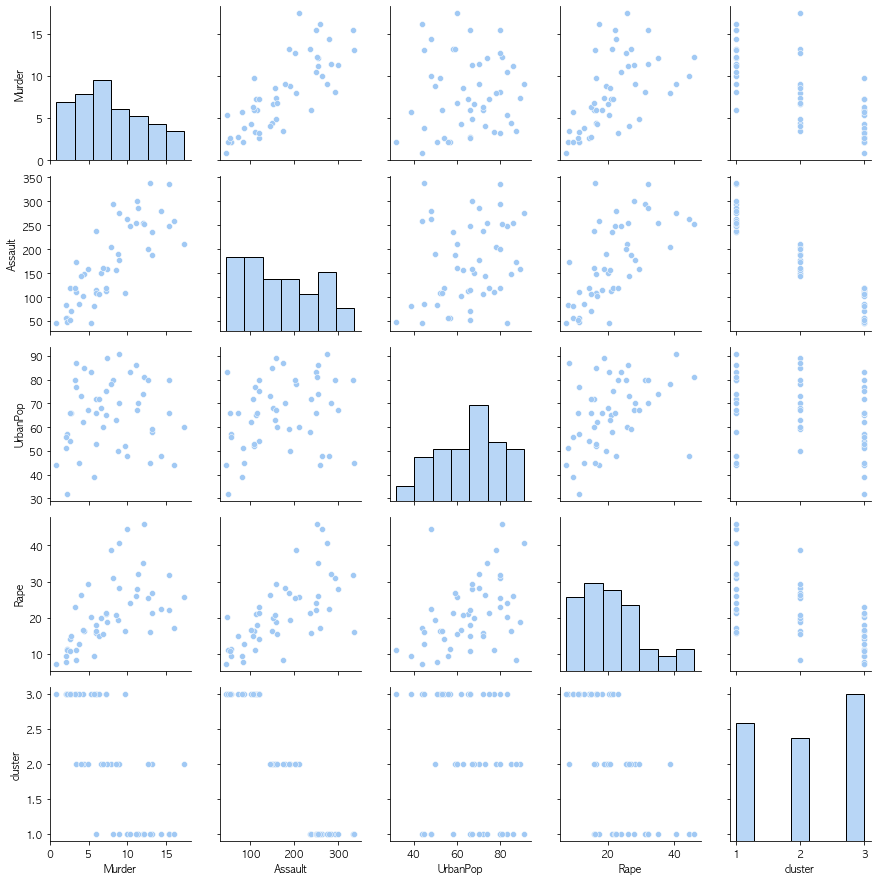

In [604]:
### 분포 확인
g = sns.PairGrid(usarrests)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

In [605]:
usarrests_scaled = StandardScaler().fit_transform(usarrests)
pd.DataFrame(usarrests_scaled).head()

0         1         2         3         4
0  1.255179  0.790787 -0.526195 -0.003451 -1.278487
1  0.513019  1.118060 -1.224067  2.509424 -1.278487
2  0.072361  1.493817  1.009122  1.053466 -1.278487
3  0.234708  0.233212 -1.084492 -0.186794 -0.094703
4  0.281093  1.275635  1.776781  2.088814 -1.278487

In [606]:
pca = PCA(n_components=len(usarrests.columns))
pca_fit = pca.fit(usarrests_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [12.84825703  7.09742266  4.38537174  3.58974203  1.55921446]
분산 설명력:  [0.66031084 0.20149363 0.07692594 0.05154499 0.0097246 ]


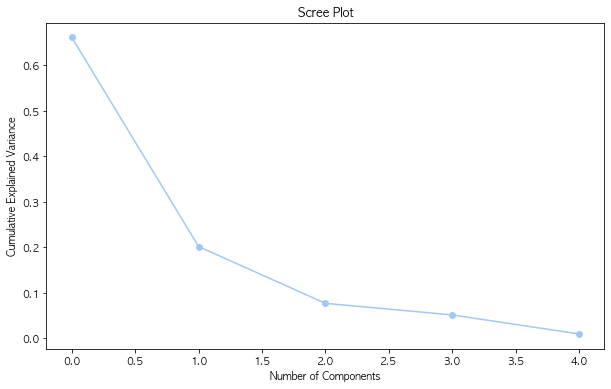

In [607]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [608]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(usarrests_scaled)
principal_usarrests = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2'])
principal_usarrests.index = usarrests.index
principal_usarrests.head()

pc1       pc2
Alabama     1.541890  1.164580
Alaska      2.343754  0.974211
Arizona     2.160046 -0.764090
Arkansas   -0.033222  1.133210
California  2.767393 -1.650587

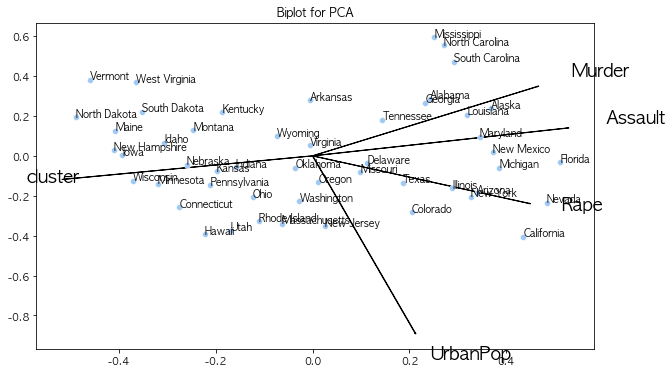

In [609]:
### Biplot
PC1 = pca.fit_transform(usarrests_scaled)[:,0]
PC2 = pca.fit_transform(usarrests_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = usarrests.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for city in principal_usarrests.index:
    plt.annotate(city, (principal_usarrests.loc[city, 'pc1']*scalePC1, principal_usarrests.loc[city, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

In [610]:
### Ramen data
ramen.head()

면  그릇  국물
쇠고기라면  2   4   5
해물라면   1   5   1
얼큰라면   5   3   4
떡라면    2   2   3
짬뽕라면   3   5   5

In [611]:
ramen_scaled = StandardScaler().fit_transform(ramen)

In [612]:
pca = PCA(n_components=len(ramen.columns))
pca_fit = pca.fit(ramen_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [3.96592216 2.8530831  2.47616199]
분산 설명력:  [0.52428462 0.27133611 0.20437927]


In [613]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ramen_scaled)
principal_ramen = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2'])
principal_ramen.index = ramen.index
principal_ramen.head()

pc1       pc2
쇠고기라면 -0.750451  0.549867
해물라면   1.026739  1.993416
얼큰라면  -1.033449 -1.364739
떡라면    1.108269 -0.714791
짬뽕라면  -1.623445  0.831530

In [614]:
import matplotlib
import matplotlib.font_manager as fm

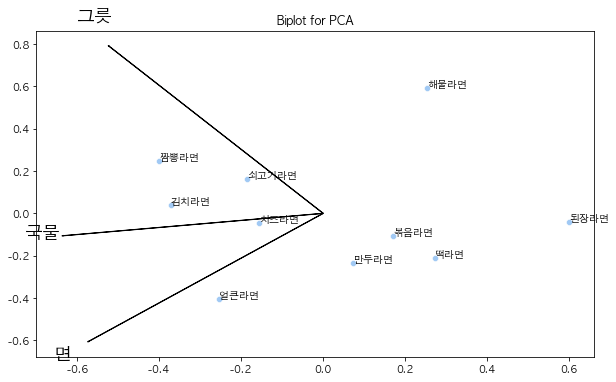

In [615]:
### Biplot
PC1 = pca.fit_transform(ramen_scaled)[:,0]
PC2 = pca.fit_transform(ramen_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = ramen.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for score in principal_ramen.index:
    plt.annotate(score, (principal_ramen.loc[score, 'pc1']*scalePC1, principal_ramen.loc[score, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

In [616]:
### Computer data
computer.head()

Price  Software  Aesthetics  Brand
0      6         5           3      4
1      7         3           2      2
2      6         4           4      5
3      5         7           1      3
4      7         7           5      5

In [617]:
computer_scaled = StandardScaler().fit_transform(computer)

In [618]:
pca = PCA(n_components=len(computer.columns))
pca_fit = pca.fit(computer_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [6.23575624 3.92163681 2.72666932 1.51703106]
분산 설명력:  [0.60757275 0.24030055 0.11616759 0.03595911]


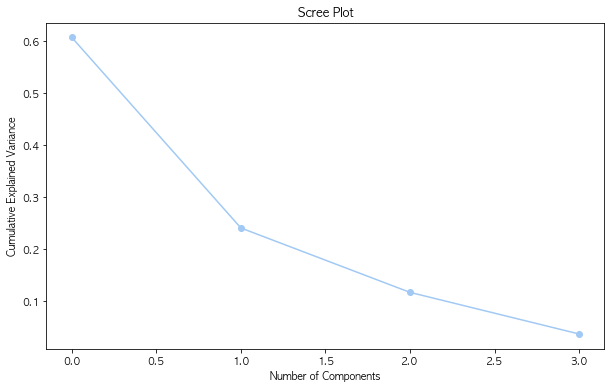

In [619]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [620]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(computer_scaled)
principal_computer = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2'])
principal_computer.index = computer.index
principal_computer.head()

pc1       pc2
0  1.145209  0.205853
1  2.135793  1.826921
2  0.375393  0.720388
3  2.093693 -0.916507
4  0.690569 -1.394867

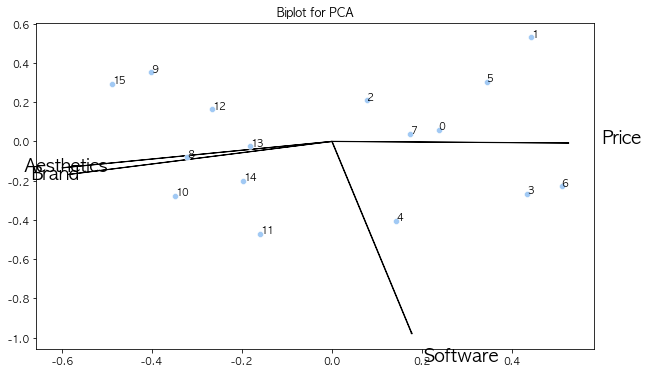

In [621]:
### Biplot
PC1 = pca.fit_transform(computer_scaled)[:,0]
PC2 = pca.fit_transform(computer_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = computer.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for score in principal_computer.index:
    plt.annotate(score, (principal_computer.loc[score, 'pc1']*scalePC1, principal_computer.loc[score, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

In [622]:
x = mnist["data"]
y = mnist["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [623]:
### PCA for Compression
pca = PCA(n_components=0.95) # 분산 설명 비율도 지정 가능
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [624]:
pca.n_components_ # image 차원

154

In [625]:
np.sum(pca.explained_variance_ratio_) # 분산 설명량 합

0.9504233611892169

In [626]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

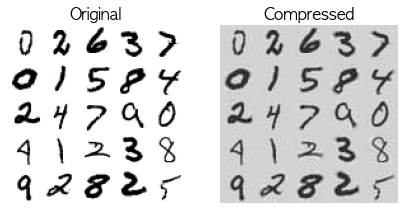

In [627]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [628]:
### Random PCA
# 처음 d개의 주성분 근삿값을 빠르게 찾아 줌
# 속도가 빠름
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
x_reduced = rnd_pca.fit_transform(x_train)

In [629]:
from sklearn.decomposition import IncrementalPCA

In [630]:
### Incremental PCA
# 조금씩 데이터를 쌓아가면서 PCA 구현
# 메모리 사용량 조절
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(x_batch)

x_reduced_inc = inc_pca.transform(x_train)

....................................................................................................

In [631]:
x_recovered_inc_pca = inc_pca.inverse_transform(x_reduced_inc)

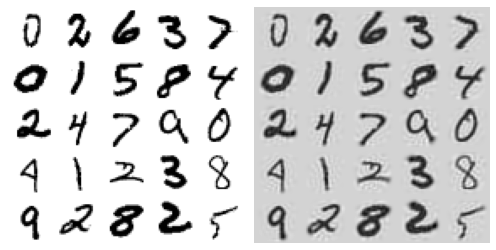

In [632]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.subplot(122)
plot_digits(x_recovered_inc_pca[::2100])
plt.tight_layout()

In [633]:
# 평균은 같으나, 결과가 완전히 동일하지는 않음
print(np.allclose(pca.mean_, inc_pca.mean_))
print(np.allclose(x_reduced, x_reduced_inc))

True
False


In [634]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

In [635]:
### kernel PCA
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

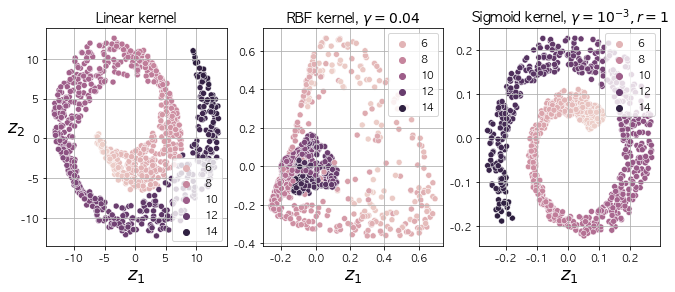

In [636]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    x_reduced = pca.fit_transform(x)
    if subplot == 132:
        x_reduced_rbf = x_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [637]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

In [638]:
### Hyperparameter tuning with kernels
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__kernel": ["rbf", "sigmoid"]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [639]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [640]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)
x_preimage = rbf_pca.inverse_transform(x_reduced)

In [641]:
mean_squared_error(x, x_preimage)

32.78630879576617

#### LLE
- Locally Linear Embedding
- 비선형 차원 축소
- 각 train sample이 가장 가까운 이웃과 얼마나 선형적으로 연관되는지 측정
- 큰 데이터에는 적용 어려움

In [642]:
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [643]:
from sklearn.manifold import LocallyLinearEmbedding

In [644]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
x_reduced = lle.fit_transform(x)

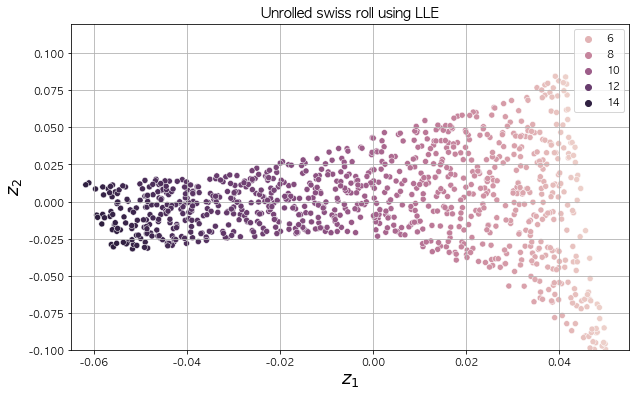

In [645]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

#### Isomap
- 각 sample을 가장 가까운 이웃과 연결
- sample들의 geodesic distance (두 노드의 최단거리 노드 개수) 유지하면서 차원 축소

In [646]:
from sklearn.manifold import Isomap

In [647]:
isomap = Isomap(n_components=2)
x_reduced_isomap = isomap.fit_transform(x)

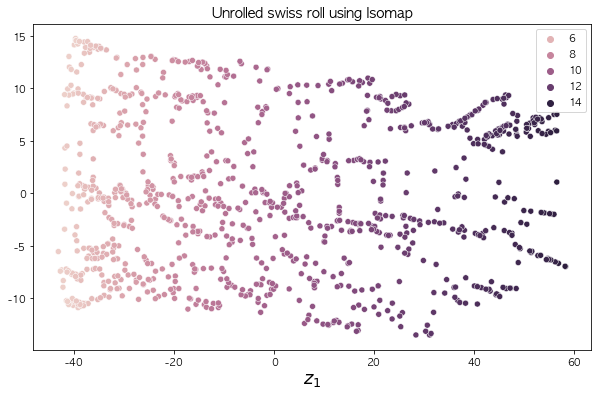

In [648]:
plt.title("Unrolled swiss roll using Isomap", fontsize=14)
sns.scatterplot(x=x_reduced_isomap[:, 0], y=x_reduced_isomap[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)

plt.show()

#### t-SNE
- t-distributed Stochastic Neighbor Embedding
- 비슷한 sample은 가까이, 비슷하지 않은 sample은 멀리 
- 쿨백-라이블러 발산 (KLD) 최소화
- 주로 2D 시각화에 사용

In [649]:
from sklearn.manifold import TSNE

In [650]:
tsne = TSNE(n_components=2, random_state=42)
x_reduced_tsne = tsne.fit_transform(x)

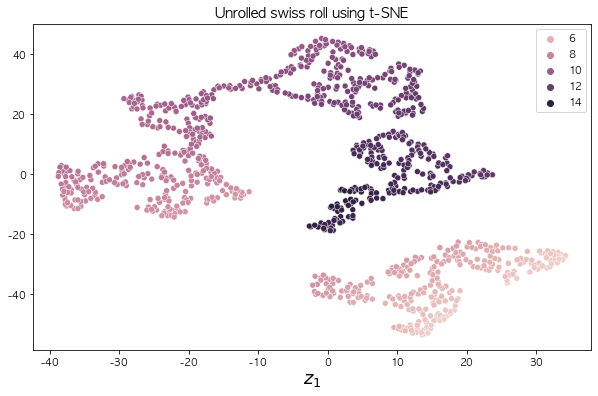

In [651]:
plt.title("Unrolled swiss roll using t-SNE", fontsize=14)
sns.scatterplot(x=x_reduced_tsne[:, 0], y=x_reduced_tsne[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)

plt.show()

#### MDS
- Multidimensional Scaling
- 여러 대상 간의 거리가 주어져 있고, 동일한 상대적 거리를 가진 실수공간의 점들로 배치시키는 방법
- 데이터 포인트의 유사성을 학습하여 자료들의 상대적 관계 이해

In [652]:
from sklearn.manifold import MDS

In [653]:
mds = MDS(n_components=2, random_state=42)
x_reduced_mds = mds.fit_transform(x)

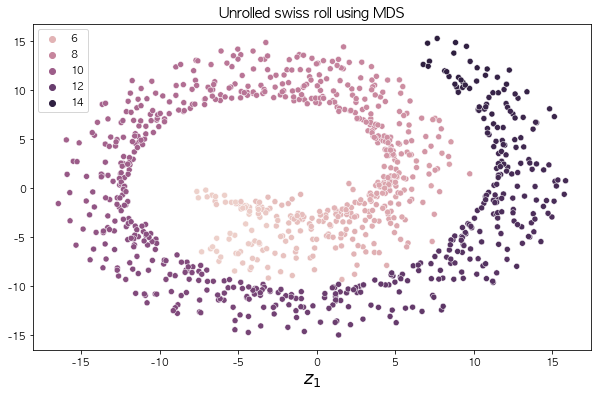

In [654]:
plt.title("Unrolled swiss roll using MDS", fontsize=14)
sns.scatterplot(x=x_reduced_mds[:, 0], y=x_reduced_mds[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)

plt.show()

In [655]:
### eurodist data
eurodist.head()

Athens  Barcelona  Brussels  Calais  Cherbourg  Cologne  \
city                                                                 
Athens          0       3313      2963    3175       3339     2762   
Barcelona    3313          0      1318    1326       1294     1498   
Brussels     2963       1318         0     204        583      206   
Calais       3175       1326       204       0        460      409   
Cherbourg    3339       1294       583     460          0      785   

           Copenhagen  Geneva  Gibraltar  Hamburg  ...  Lisbon  Lyons  Madrid  \
city                                               ...                          
Athens           3276    2610       4485     2977  ...    4532   2753    3949   
Barcelona        2218     803       1172     2018  ...    1305    645     636   
Brussels          966     677       2256      597  ...    2084    690    1558   
Calais           1136     747       2224      714  ...    2052    739    1550   
Cherbourg        1545     853       2047     1115  ...    1827    789    1347   

           Marseilles  Milan  Munich  Paris  Rome  Stockholm  Vienna  
city                                                                  
Athens           2865   2282    2179   3000   817       3927    1991  
Barcelona         521   1014    1365   1033  1460       2868    1802  
Brussels         1011    925     747    285  1511       1616    1175  
Calais           1059   1077     977    280  1662       1786    1381  
Cherbourg        1101   1209    1160    340  1794       2196    1588  

[5 rows x 21 columns]

In [656]:
mds = MDS()
eurodist_transform = mds.fit_transform(eurodist)
eurodist_transform_df = pd.DataFrame(eurodist_transform)
eurodist_transform_df.index = eurodist.index
eurodist_transform_df.columns = ['x', 'y']

In [657]:
eurodist_transform_df.head()

x            y
city                               
Athens     8197.568923 -2389.180470
Barcelona  -185.540540  2812.946375
Brussels  -2558.485128  -788.757912
Calais    -2476.281793  -486.301904
Cherbourg -2169.970396   482.866835

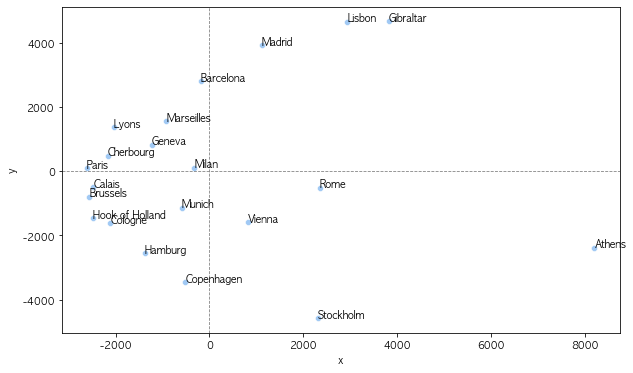

In [658]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=eurodist_transform_df['x'], y=eurodist_transform_df['y'])

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)

for language in eurodist_transform_df.index:
    plt.annotate(language, (eurodist_transform_df.loc[language, 'x'], eurodist_transform_df.loc[language, 'y']))
    
plt.show()

#### CA
- Correspondence Analysis
- MDS의 범주형 버전
- 범주형 변수(수준)들 간의 연관성을 분석한 후, 그 결과를 시각적 해석이 용이하도록 그래프화
- 범주형 변수의 빈도를 나타내고 있는 빈도교차표의 행과 열(명목변수의 범주 값들)을 그래프상의 자극점 형태로 표시하는 방법
- 단순 상응분석은 2개의 변수, 다중 상응분석은 3개 이상의 변수 활용
- 카이제곱 검정과 같이 범주형 변수간의 상호연관성을 바탕으로 진행되므로, 범주형 변수가 서로 연관성을 가지고 있다는 전제가 필요함

In [659]:
# !pip install prince
import prince

In [660]:
### Simple CA
x = pd.DataFrame(
    data=[[326, 38, 241, 110, 3],
          [688, 116, 584, 188, 4],
          [343, 84, 909, 412, 26],
          [98, 48, 403, 681, 85]], columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']), index=pd.Series(['Blue', 'Light', 'Medium', 'Dark']))

x.columns.rename('Hair color', inplace=True)
x.index.rename('Eye color', inplace=True)
x.head()

Hair color  Fair  Red  Medium  Dark  Black
Eye color                                 
Blue         326   38     241   110      3
Light        688  116     584   188      4
Medium       343   84     909   412     26
Dark          98   48     403   681     85

In [661]:
ca = prince.CA()
ca.fit(x)

In [662]:
### row coordinates
coords_r = ca.row_coordinates(x)
coords_r.columns = ['x', 'y']
coords_r

x         y
Eye color                    
Blue      -0.400300 -0.165411
Light     -0.440708 -0.088463
Medium     0.033614  0.245002
Dark       0.702739 -0.133914

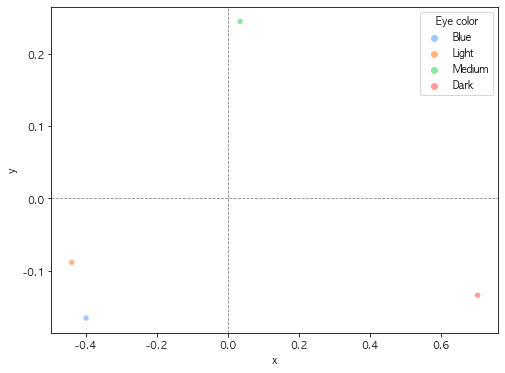

In [663]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_r, hue=coords_r.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [664]:
### column coordinates
coords_c = ca.column_coordinates(x)
coords_c.columns = ['x', 'y']
coords_c

x         y
Hair color                    
Fair       -0.543995 -0.173844
Red        -0.233261 -0.048279
Medium     -0.042024  0.208304
Dark        0.588709 -0.103950
Black       1.094388 -0.286437

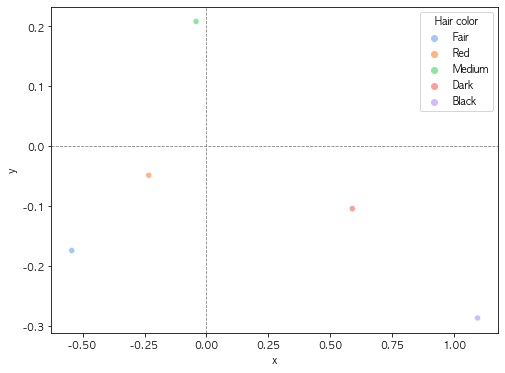

In [665]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_c, hue=coords_c.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [666]:
### Multiple CA
x = pd.read_csv('./data/adult_stretch.csv')
x.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
x.head()

Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        F
2  YELLOW  SMALL      DIP  ADULT        F
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  LARGE  STRETCH  ADULT        T

In [667]:
mca = prince.MCA()
mca.fit_transform(x)

0             1
0   0.705387  9.084235e-15
1  -0.386586  6.949708e-15
2  -0.386586  7.989232e-15
3  -0.852014  6.737549e-15
4   0.783539 -6.333333e-01
5   0.783539 -6.333333e-01
6  -0.308434 -6.333333e-01
7  -0.308434 -6.333333e-01
8  -0.773862 -6.333333e-01
9   0.783539  6.333333e-01
10  0.783539  6.333333e-01
11 -0.308434  6.333333e-01
12 -0.308434  6.333333e-01
13 -0.773862  6.333333e-01
14  0.861691 -6.276341e-15
15  0.861691 -6.276341e-15
16 -0.230282 -8.410868e-15
17 -0.230282 -7.371344e-15
18 -0.695710 -8.623027e-15

In [668]:
### 차원 좌표
coords = mca.column_coordinates(x)
coords.columns = ['x', 'y']
coords

x             y
Color_PURPLE    0.117308  6.892024e-01
Color_YELLOW   -0.130342 -7.657805e-01
Size_LARGE      0.117308 -6.892024e-01
Size_SMALL     -0.130342  7.657805e-01
Action_DIP     -0.853864 -2.037959e-16
Action_STRETCH  0.620992  1.872995e-16
Age_ADULT       0.620992  1.079135e-15
Age_CHILD      -0.853864 -1.470106e-15
Inflated_F     -0.731466 -5.841431e-16
Inflated_T      1.253942  1.068422e-15

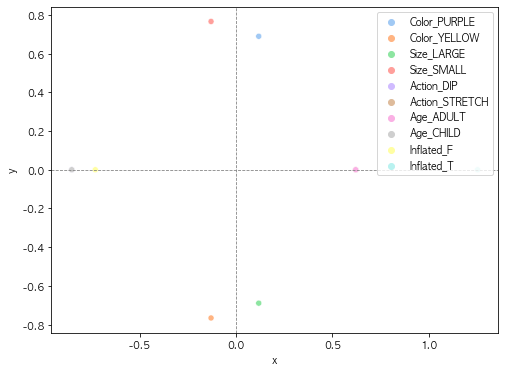

In [669]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords, hue=coords.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [670]:
mca.eigenvalues_

array([0.40165657, 0.21111111])

In [671]:
mca.total_inertia_

1.0

#### LDA
- Linear Discriminant Analysis
- 분류 알고리즘으로 사용되기도 함
- Train 과정에서 class를 가장 잘 구분하는 축 학습
- 클래스 내 분산과 클래스 내부 분산의 비율 최대화
- StandardScaler로 스케일링 해야 함

In [672]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [673]:
loan3000 = pd.read_csv("./Practical_Statictics/data/loan3000.csv")
loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

x = loan3000[predictors]
y = loan3000[outcome]

In [674]:
pd.concat([x, y], axis=1)

borrower_score  payment_inc_ratio   outcome
0               0.40            5.11135  paid off
1               0.40            5.43165   default
2               0.70            9.23003  paid off
3               0.40            2.33482  paid off
4               0.45           12.10320   default
...              ...                ...       ...
2995            0.50           18.36620  paid off
2996            0.60            1.80421  paid off
2997            0.20           15.42180   default
2998            0.45            8.92335   default
2999            0.40           12.88190   default

[3000 rows x 3 columns]

In [675]:
loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(x, y)
pd.DataFrame(loan_lda.scalings_, index=x.columns)

0
borrower_score     7.175839
payment_inc_ratio -0.099676

In [676]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]), columns=loan_lda.classes_)
print(pred.head())

    default  paid off
0  0.553544  0.446456
1  0.558953  0.441047
2  0.272696  0.727304
3  0.506254  0.493746
4  0.609952  0.390048


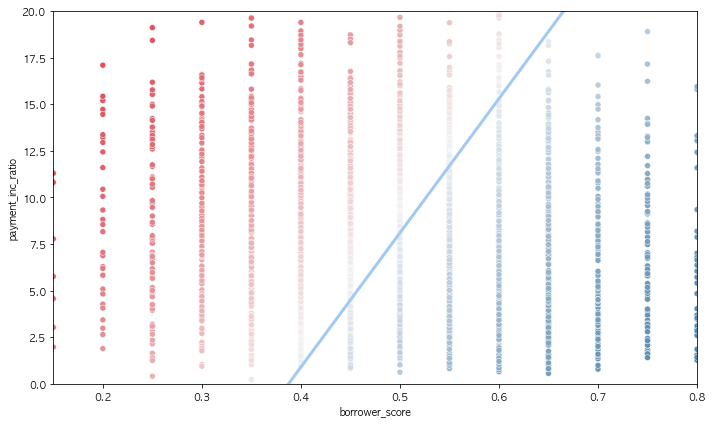

In [677]:
# Use scalings and center of means to determine decision boundary
center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

sns.scatterplot(x='borrower_score', y='payment_inc_ratio', hue='default', data=lda_df, 
                palette=sns.diverging_palette(240, 10, n=9, as_cmap=True), legend=False)

plt.plot((x_0, x_20), (0, 20), linewidth=3)

plt.ylim(0, 20)
plt.xlim(0.15, 0.8)


plt.tight_layout()
plt.show()

In [678]:
### mnist
lda = LinearDiscriminantAnalysis(n_components=2)

x_mnist = mnist["data"]
y_mnist = mnist["target"]

In [679]:
lda.fit(x_mnist, y_mnist)
x_reduced_lda = lda.transform(x_mnist)

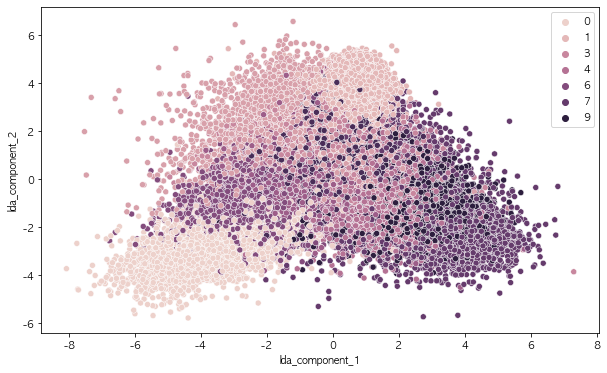

In [680]:
lda_columns = ['lda_component_1','lda_component_2']
mnist_lda = pd.DataFrame(x_reduced_lda, columns=lda_columns)
sns.scatterplot(x=mnist_lda['lda_component_1'], y=mnist_lda['lda_component_2'], hue=y_mnist)
plt.show()

In [681]:
### iris data
x = iris.drop(columns = 'Class')
iris_scaled = StandardScaler().fit_transform(x)

In [682]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.Class)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


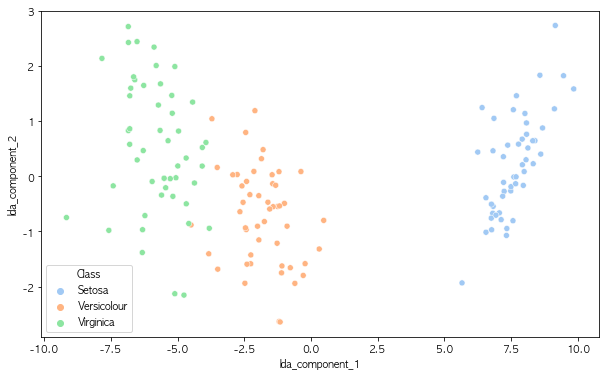

In [683]:
lda_columns = ['lda_component_1', 'lda_component_2']
iris_lda = pd.DataFrame(iris_lda, columns=lda_columns)
sns.scatterplot(x=iris_lda['lda_component_1'], y=iris_lda['lda_component_2'], hue=iris.Class)
plt.show()

#### QDA
- Quadratic Discriminant Analysis
- 2차 판별분석

In [684]:
# 데이터 생성
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [685]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [686]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x, y)

QuadraticDiscriminantAnalysis()

In [687]:
clf.predict([[-0.8, -1]])

array([1])

#### ICA
- Independent Component Analysis
- Feature에 들어있는 독립 신호 추출
- 독립적인 feature를 추출하려고 하기 때문에, 새로운 각 축은 직교하지 않을 수 있음 (PCA와의 차이점)
- 신호 처리 작업에 주로 사용

In [688]:
from sklearn.decomposition import FastICA

In [689]:
fastICA = FastICA(n_components=2, algorithm='parallel', max_iter=100, random_state=1)

In [690]:
x_mnist_ica = fastICA.fit_transform(x_mnist)

<AxesSubplot:>

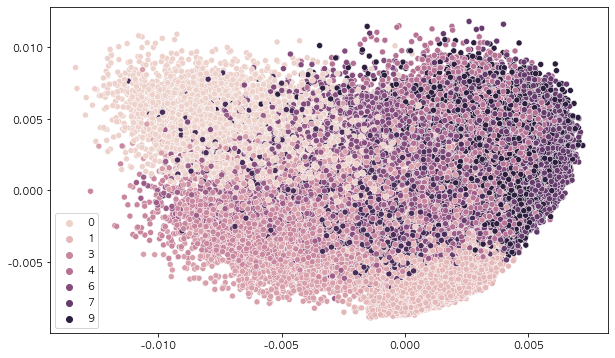

In [691]:
sns.scatterplot(x=x_mnist_ica.T[0], y=x_mnist_ica.T[1], hue=y_mnist)

#### SVD
- Singular Value Decomposition
- 희소 행렬의 변환 가능
- 패턴 인식, 토픽 모델링, 문서 클러스터링, 상품 추천 등

In [692]:
from numpy.linalg import svd
from scipy.sparse.linalg import svds

In [693]:
# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [694]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [695]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [696]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [697]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [698]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [699]:
### Truncated SVD
# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

In [700]:
from sklearn.decomposition import TruncatedSVD, PCA

Text(0, 0.5, 'TruncatedSVD Component 2')

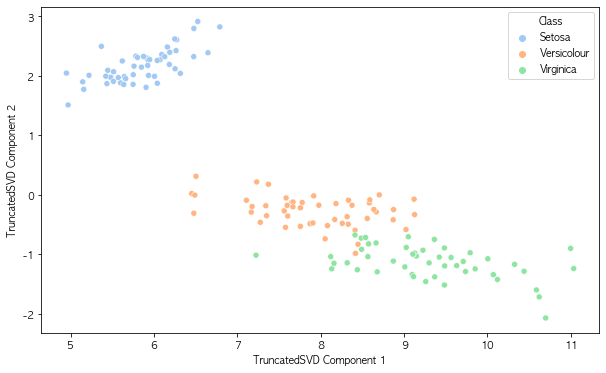

In [701]:
### TruncatedSVD from scikit-learn
# 분해한 행렬을 반환하지는 않고, 차원 축소 변환
iris_ftrs = iris.iloc[:, :4]

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0, 0.5, 'TruncatedSVD Component 2')

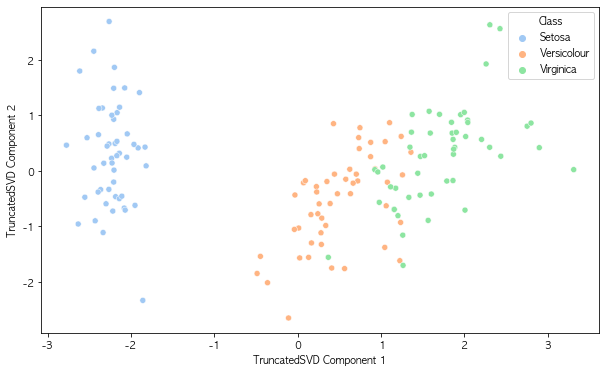

In [702]:
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# TruncatedSVD 변환 데이터 표현
# PCA 축소 결과와 거의 동일
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

#### NMF
- Non-Negative Matrix Factorization
- SVD와 유사한, 낮은 랭크 행렬 근사 방법
- 사용 분야도 SVD와 유사
- 원본 행렬이 모두 양수일 때, 두 개의 양수 행렬로 분해
- 스케일링 하면 안됨, 하더라도 MinMaxScaler 해야 함

In [703]:
from sklearn.decomposition import NMF

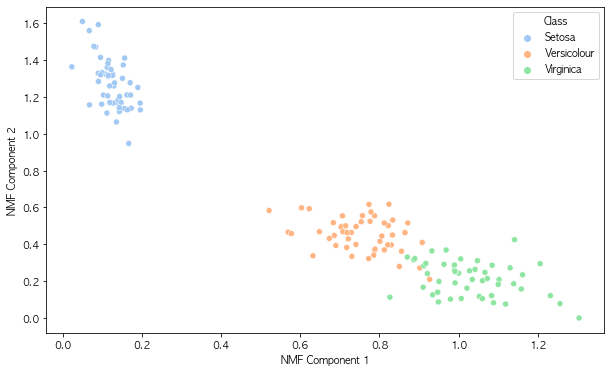

In [704]:
iris_ftrs = iris.iloc[:, :4]

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

sns.scatterplot(x=iris_nmf[:,0], y=iris_nmf[:,1], hue=iris.Class)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

#### FA
- Factor Analysis (요인분석)
- 유사한 변수를 묶어 다중공선성을 줄이는 것이 목적
- 공동 요인을 이용하여 변수의 상관 구조 분석
- Clustering과 유사하나, 분석가의 사전 지식이 어느 정도 필요함

In [705]:
bfi = pd.read_csv("./data/bfi.csv", index_col="Unnamed: 0")

bfi.drop(['gender', 'education', 'age'], axis=1, inplace=True)
bfi.dropna(inplace=True)
bfi.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N1   N2   N3  \
61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  3.0  4.0  2.0   
61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  3.0  3.0  3.0   
61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  4.0  5.0  4.0   
61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  2.0  5.0  2.0   
61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  2.0  3.0  4.0   

        N4   N5   O1  O2   O3   O4   O5  
61617  2.0  3.0  3.0   6  3.0  4.0  3.0  
61618  5.0  5.0  4.0   2  4.0  3.0  3.0  
61620  2.0  3.0  4.0   2  5.0  5.0  2.0  
61621  4.0  1.0  3.0   3  4.0  3.0  5.0  
61622  4.0  3.0  3.0   3  4.0  3.0  3.0  

[5 rows x 25 columns]

In [706]:
# !pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [707]:
### 데이터 세트의 “인자 가능성”을 평가
# 요인 분석 가능성은 “데이터 세트에서 요인을 찾을 수 있는가?”를 의미함
# 바틀렛 테스트: 관측된 변수가 단위 행렬과 상호 관련되는지 여부를 확인. 귀무가설을 기각해야 요인분석 진행 가능
# -> H0: 모집단의 상관행렬은 단위행렬과 동일하다 / H1:  모집단의 상관행렬은 단위행렬과 동일하지 않다
chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
chi_square_value, p_value # 유의함.

(18146.065577235022, 0.0)

In [708]:
# KMO(Kaiser-Meyer-Olkin) 테스트
# -> 요인 분석에 대한 데이터의 적합성 측정. 모든 관측 변수 간의 분산 비율을 추정하며, KMO 값의 범위는 0에서 1 사이
# -> 0.6 미만의 KMO 값은 부적합한 것으로 간주함
kmo_all, kmo_model = calculate_kmo(bfi)
kmo_model

0.8486452309468395

In [709]:
from factor_analyzer import FactorAnalyzer

In [710]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(bfi, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

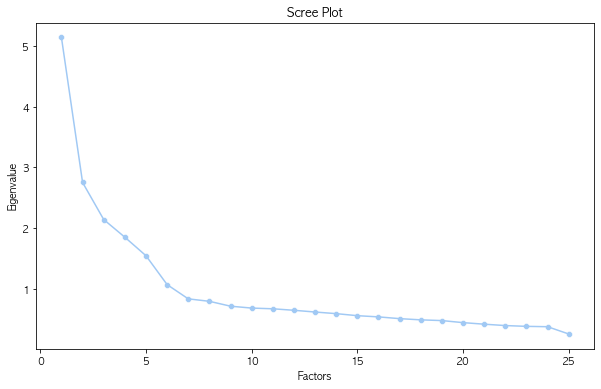

In [711]:
# Create scree plot
sns.scatterplot(x=range(1, bfi.shape[1]+1), y=ev)
sns.lineplot(x=range(1, bfi.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [712]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(bfi)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

<AxesSubplot:>

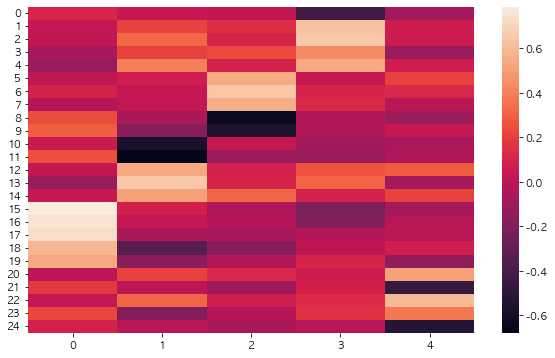

In [713]:
# 요인 적재량
sns.heatmap(pd.DataFrame(fa.loadings_))

In [714]:
# SS Loadings
# Proportion Var
# Cumulative Var
fa.get_factor_variance()

(array([2.70963262, 2.47308982, 2.04110564, 1.844498  , 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

In [715]:
from sklearn.decomposition import FactorAnalysis

In [716]:
### Scikit-learn
fa = FactorAnalysis(n_components=5, rotation="varimax")
fa.fit(bfi)

FactorAnalysis(n_components=5, rotation='varimax')

<AxesSubplot:>

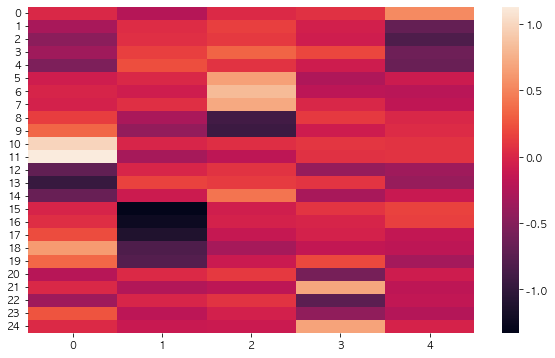

In [717]:
### 요인 적재 행렬 
sns.heatmap(pd.DataFrame(fa.components_).T)

In [718]:
# The estimated noise variance for each feature
fa.noise_variance_ 

array([1.63948936, 0.79959992, 0.80401417, 1.5220757 , 0.82419538,
       1.00515335, 0.9897638 , 1.12694924, 0.96456765, 1.49181394,
       1.67908697, 1.18046475, 1.01763303, 1.00548583, 1.067968  ,
       0.68998572, 0.79163628, 1.20884314, 1.2495894 , 1.7524464 ,
       0.85538357, 1.79549585, 0.75626997, 1.07088509, 1.26833739])

In [719]:
bfi_trans_df = pd.DataFrame(fa.transform(bfi))
bfi_trans_df

0         1         2         3         4
0    -0.153588  0.204795 -1.139972  1.551594  0.860195
1    -0.515970 -0.070053 -0.630235  0.196533  0.165677
2    -0.246942 -0.708131  0.051659 -0.238087  0.696860
3    -0.065624  0.131695 -1.045406  1.008858 -0.077362
4    -0.368067  0.245645 -0.040606  0.675983  0.779880
...        ...       ...       ...       ...       ...
2431  1.294707 -1.358452 -0.076894 -0.446021  0.933602
2432 -0.149995 -0.759848 -0.604543 -1.081443  0.251889
2433 -0.682748 -0.018803  0.845983 -0.937561  1.029193
2434 -0.497376 -1.179826  0.099787 -0.745508  1.857543
2435  1.236819  1.477643  0.049164  0.295011  2.125499

[2436 rows x 5 columns]

#### Reliability Analysis 
- Internal consistency (내적 일관성 분석, 변수의 신뢰도와 관련)
- 요인분석과 동시에 진행하는 경우도 많음
- 주로 조사 데이터에 활용하며, 신뢰성을 평가하여 신뢰성이 낮은 컬럼 제외
- 하나의 개념을 측정하기 위해 여러 개의 하위 측정항목들이 존재할 경우 이들 측정 값 사이의 상관관계를 분석하여 신뢰성을 평가하는 방법
- 크론바흐 알파계수 활용 (계수 >= 0.6 신뢰성이 존재, 계수 >= 0.7신뢰성이 높음)
- 크론바흐 알파계수가 낮을 경우에는 측정 항목들 간의 내적일관성이 떨어지는 것을 의미하므로 다른 측정 항목들과 상관관계가 낮은 측정항목을 제거하여 내적일관성을 향상시킬 수 있음
- 하나의 개념에 대해 신뢰성과 타당성을 평가하기 위한 최소의 항목 수는 3개이므로 가급적 모든 개념의 측정 항목 수는 3개 이상으로 유지하는 것이 중요

In [720]:
# enter survey responses as a DataFrame
df = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                   'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})
df

Q1  Q2  Q3
0   1   1   1
1   2   1   1
2   2   1   2
3   3   2   1
4   2   3   2
5   2   3   3
6   3   2   3
7   3   3   3
8   2   3   2
9   3   3   3

In [721]:
pg.cronbach_alpha(data=df)

(0.7734375, array([0.336, 0.939]))

## Unstructured Data

### (1) Text Process
- Text Mining의 기능: 문서 요약/분류/군집, 특성 추출
- Corpus: 텍스트 문서들의 집합. TDM(Term-Document Matrix)로 구현됨
- Cleansing, Stopword removing, Tokenization, Stemming등의 전처리 수행

#### Regular Expressions 
- [expression]: includes character
- [^expression]: not includes character
- .: exists any 1 character
- ?: decide if preceding character exists. character exists or not exists (0, 1)
- [abc] - match one of character a, b or c
    - a : OK
    - apple : OK
    - double : Not OK
- \d: match digits, same as [0-9]
- \D: match non-digits, same as [^0-9]
- \s: match whitespace character
- \S: match non-whitespace character 
- \w: match all character and digits, same as [a-zA-Z0-9]
- \W: match non-character or non-digits, same as [^a-zA-Z0-9]
- a.b : allows all character except line space between 'a' and 'b'
- a[.]b : allows only 'dot' character between 'a' and 'b'
- ca*t : allows 'a' character repeating zero time or above
- ca+t : allows 'a' character repeating one time or above
- ca?t : no 'a' character or allows repeating just one time
- ca{3}t : match if 'a' character repeats three times
- ca{2, 3}t : match if 'a' character repeats 2~3 times

In [722]:
import re

In [723]:
# select character to find
# find a or b
# search a or b from 'toast'
pattern = re.compile('[ab]')
print(pattern.search('toast'))

<re.Match object; span=(2, 3), match='a'>


In [724]:
pattern = re.compile('[^ab]') # must not 'ab'
pattern.search('abc')

<re.Match object; span=(2, 3), match='c'>

In [725]:
pattern.match("abc") # no results

In [726]:
pattern = re.compile('a.c')

pattern.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [727]:
pattern.match("cab")

In [728]:
pattern.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [729]:
pattern.search('abbc') # no results

In [730]:
pattern = re.compile('a?b')

pattern.search('ab')

<re.Match object; span=(0, 2), match='ab'>

In [731]:
pattern = re.compile('test?t')
pattern.search('test')

<re.Match object; span=(0, 4), match='test'>

In [732]:
pattern = re.compile("^data\s\w+")
pattern.match("data science")

<re.Match object; span=(0, 12), match='data science'>

In [733]:
### String replace
pattern = re.compile('(blue|white|red)')
pattern.sub('colour', 'blue socks and red shoes')

'colour socks and colour shoes'

In [734]:
pattern.sub('colour', 'blue socks and red shoes', count=1)

'colour socks and red shoes'

In [735]:
pattern = re.compile('(blue|white|red)')
pattern.subn( 'colour', 'blue socks and red shoes')

('colour socks and colour shoes', 2)

In [736]:
pattern = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
pattern.sub("\g<phone> \g<name>", "park 010-1234-1234")

'010-1234-1234 park'

#### Pre-processing
- Cleansing
- Tokenization
- Filtering (Stopword removal)
- Stemming/Lemmatization

##### Tokenization

In [737]:
# !pip install nltk
import nltk
nltk.download('punkt')

from nltk import sent_tokenize
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /Users/a10053/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [738]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [739]:
sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [740]:
#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


##### Stopword removal

In [741]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a10053/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [742]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [743]:
stop_words = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stop_words:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


##### Stemming, Lemmatization

In [744]:
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/a10053/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [745]:
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [746]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


In [747]:
### chatgpt sample
text_df.head()

Datetime             Tweet Id  \
0  2023-01-22 13:44:39+00:00  1617156291046133761   
1  2023-01-22 13:44:49+00:00  1617156332297256961   
2  2023-01-22 13:45:03+00:00  1617156389217894400   
3  2023-01-22 13:45:04+00:00  1617156393898745858   
4  2023-01-22 13:45:06+00:00  1617156404137295878   

                                                Text         Username  \
0  @AlexandrovnaIng Prohibition of ChatGPT has be...  Caput_LupinumSG   
1  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...    Vishwasrisiri   
2  ChatGPT runs 10K Nvidia training GPUs with pot...   FierceElectron   
3  @SWENGDAD There is repetitive work in every jo...       xlr8harder   
4  I created a fictional jewelry brand using Chat...      Kosuke_dazo   

                                           Permalink  \
0  https://twitter.com/Caput_LupinumSG/status/161...   
1  https://twitter.com/Vishwasrisiri/status/16171...   
2  https://twitter.com/FierceElectron/status/1617...   
3  https://twitter.com/xlr8harder/status/16171563...   
4  https://twitter.com/Kosuke_dazo/status/1617156...   

                                  User  \
0  https://twitter.com/Caput_LupinumSG   
1    https://twitter.com/Vishwasrisiri   
2   https://twitter.com/FierceElectron   
3       https://twitter.com/xlr8harder   
4      https://twitter.com/Kosuke_dazo   

                                            Outlinks  \
0                                                NaN   
1  ['https://twitter.com/agadmator/status/1617155...   
2  ['https://www.fierceelectronics.com/sensors/ch...   
3                                                NaN   
4                  ['https://oriori.my.canva.site/']   

                    CountLinks  ReplyCount  RetweetCount  LikeCount  \
0                          NaN           1             0          5   
1  ['https://t.co/ENTSzi2AQ9']           0             0          2   
2  ['https://t.co/Uhq62t0Uw4']           0             0          0   
3                          NaN           1             0          3   
4  ['https://t.co/gtWdNZ0laM']           0             1          2   

   QuoteCount       ConversationId  \
0           0  1617148639993806848   
1           0  1617156332297256961   
2           0  1617156389217894400   
3           0  1617149595901104130   
4           1  1617156404137295878   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="https://mobile.twitter.com" rel="nofo...   
4  <a href="http://twitter.com/download/iphone" r...   

                                               Media  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [Photo(previewUrl='https://pbs.twimg.com/media...   

                                         QuotedTweet  \
0                                                NaN   
1  https://twitter.com/agadmator/status/161715501...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      MentionedUsers  \
0  [User(username='AlexandrovnaIng', id=282705900...   
1                                                NaN   
2                                                NaN   
3  [User(username='SWENGDAD', id=1460452950875193...   
4                                                NaN   

                       hashtag  hastag_counts  
0                           []              0  
1                           []              0  
2                           []              0  
3                           []              0  
4  ['#ChatGPT', '#midjourney']              2

In [748]:
text = text_df.Text
text

0        @AlexandrovnaIng Prohibition of ChatGPT has be...
1        Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
2        ChatGPT runs 10K Nvidia training GPUs with pot...
3        @SWENGDAD There is repetitive work in every jo...
4        I created a fictional jewelry brand using Chat...
                               ...                        
32071    I joined the @aipadtech x @moonsalecom exclusi...
32072    @iamjohnoliver I think ChatGPT is taking the p...
32073    Digital Marketers adopt new skills. Artificial...
32074    Remember when @Twitter was down a lot in the e...
32075    Portland Shop Uses ChatGPT To Tell Family Stor...
Name: Text, Length: 32076, dtype: object

In [749]:
### regex 사용 치환
text = text.str.replace(r'@*', '')
text = text.str.replace(r'https://*', '')
text = text.str.replace(r'http://*', '')

### 문장 부호 제거
text = text.str.replace(r'[^\w\s]+', '')

### 소문자 변환
text = text.str.lower()

In [750]:
from nltk.stem import PorterStemmer

In [751]:
### Tokenizing, Stopword removing & stemming
stop_words = set(nltk.corpus.stopwords.words('english')) 
stemmer = PorterStemmer()

In [752]:
for i in text.index:
    word_tokens = word_tokenize(text[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
            
    text[i] = ' '.join([stemmer.stem(word) for word in word_tokens])

In [753]:
text.head()

0    alexandrovna prohibit of chatgpt ha been ad to...
1                    bow down to chatgpt tcoentszi2aq9
2    chatgpt run 10k nvidia train gpu with potenti ...
3    swengdad there is repetit work in everi job th...
4    i creat a fiction jewelri brand use chatgpt an...
Name: Text, dtype: object

##### Sparse matrix
- COO 형식: 0이 아닌 데이터만 별도의 배열에 저장하고, 행과 열의 위치를 별도의 배열로 저장
- CSR 형식: 행 위치 배열 내에 있는 고유한 값의 시작 위치만 위치 배열로 저장 -> 메모리 사용이 적고 빠른 연산
- 희소 행렬 연산이 효율적인 ML models: Logistic Regression, Linear SVM, Naive Bayes

In [754]:
from scipy import sparse

In [755]:
dense = np.array([[3, 0, 1], [0, 2, 0]])

In [756]:
# 0 이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [757]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [758]:
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [759]:
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense2)
csr = sparse.csr_matrix(dense2)

##### Bag of Words – BOW
- 문서가 가지는 모든 단어를 한데 모아놓고 (순서 무시), 일괄적으로 빈도 부여
- 구축이 빠르나, 문맥 의미 반영이 부족하고 희소 행렬 문제가 발생함
- Feature Vectorization: CSR 형식
    - CountVectorizer
    - TfidfVectorizer

In [760]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [761]:
### CountVectorizer
# 단어빈도수 세고, matrix 형태로 만들어주기
cv = CountVectorizer(max_features=500, stop_words='english')
tdm = cv.fit_transform(text) # tdm 완성
tdm.shape

(32076, 500)

In [762]:
doc = tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [763]:
# 단어 목록 확인하기
words = cv.get_feature_names()
print(words[:10])

# 빈도수 확인하기
count = tdm.sum(axis=0)
print(count)

['10', '100', '12', '20', '2023', '42', 'abil', 'abl', 'academ', 'access']
[[  697   139   138   193   378   339   225   354   152   551   177   168
    138   419   223   197   135   249   149   164  7566   227   569   138
    285   291  1125   143   696   467   250  1241   269   258   254   336
    210   168   486   727   621  2219   139   147   302   163   284   237
    133   241   241   175   358   235   542   375   406   228   483   143
    799   394   960   160   156   254   322   485   144   179   161   393
    133   864   132   226   191   309   172   155   743  2710   893 32334
    150   291   228   488   184   155   165  1044   139   708   172   213
    519   228   330   197   255   181   729   142   393   176   180   211
    210   266  1011   244   694   242   284   183   192   373   639   610
    305   186   221   655   557   261   381   204   273   173   672   400
    384  1036   141   161   171   878   190   357   160   339   138   252
    548   351   154   327   345   279

In [764]:
word_count = list(zip(words, count.flat))
word_count[:10]

[('10', 697),
 ('100', 139),
 ('12', 138),
 ('20', 193),
 ('2023', 378),
 ('42', 339),
 ('abil', 225),
 ('abl', 354),
 ('academ', 152),
 ('access', 551)]

In [765]:
len(words)

500

In [766]:
### TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=500, stop_words='english')
tdm_tfidf = tf_idf.fit_transform(text)
tdm_tfidf[0].toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.61191639,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### WordCloud

In [767]:
# !pip install wordcloud
from wordcloud import WordCloud

In [768]:
wc = WordCloud(background_color='White', width=400, height=300)

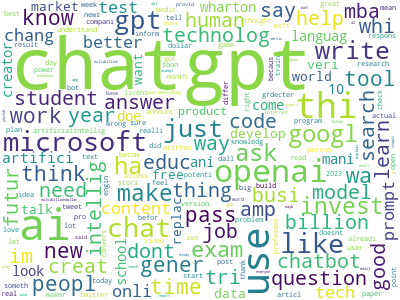

In [769]:
cloud = wc.fit_words(dict(word_count))
cloud.to_image()

#### Associations: Co-occurance

In [770]:
word_to_find = 'chatgpt'
co_occurance_dict = dict()
for i in range(tdm.shape[0]):
    if tdm[i].toarray()[0][words.index(word_to_find)] !=0:
        co_words = [words[word_index] for word_index in np.where(tdm[i].toarray()[0]==1)[0]]
        try:
            co_words.remove(word_to_find)
        except ValueError:
            pass
        
        for word in co_words:
            if word==word_to_find:
                continue
            try:
                co_occurance_dict[word] += 1
            except KeyError:
                co_occurance_dict[word] = 1

In [771]:
asso_value = 0.05
for key in co_occurance_dict.keys():
    if co_occurance_dict[key]/tdm.shape[0] >= asso_value:
        print(key, ':', co_occurance_dict[key]/tdm.shape[0])

ha : 0.055773787255268735
use : 0.12052625015587978
ai : 0.1498940017458536
write : 0.05661553809701958
openai : 0.0876044394562913
just : 0.06210250654695099
ask : 0.05605437086918568
like : 0.0652201022571393
thi : 0.10783763561541339
microsoft : 0.05705200149644594


#### Sentiment Analysis (Unsupervised)

In [772]:
nltk.download('wordnet')
nltk.download('sentiwordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package wordnet to /Users/a10053/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/a10053/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [773]:
### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해
term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [774]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

In [775]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

tree  lion  tiger   cat   dog
tree   1.00  0.07   0.07  0.08  0.12
lion   0.07  1.00   0.33  0.25  0.17
tiger  0.07  0.33   1.00  0.25  0.17
cat    0.08  0.25   0.25  1.00  0.20
dog    0.12  0.17   0.17  0.20  1.00

In [776]:
senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [777]:
father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0
fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


In [778]:
### IMDB text - Sentiment Analysis
review_df = pd.read_csv('./data/labeledTrainData.tsv', header=0, sep="\t", quoting=3)

In [779]:
# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [780]:
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [781]:
### Sentiwordnet 적용
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [782]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [783]:
# 높은 성능은 아님
print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target , preds), 4))
print("정밀도:", np.round(precision_score(y_target , preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7649 4851]
 [3578 8922]]
정확도: 0.6628
정밀도: 0.6478
재현율: 0.7138


In [784]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/a10053/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [785]:
senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'compound': -0.8278}


In [786]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

In [787]:
### VADER 적용
# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6819  5681]
 [ 1936 10564]]
정확도: 0.6953
정밀도: 0.6503
재현율: 0.8451


#### Topic Modeling
- 문서 집합에 숨어 있는 주제를 찾아내는 것
- 중심 단어는 함축적으로 추출
- 주요 기법
    - LSA (Latent Semantic Analysis): TruncatedSVD 이용
    - LDA (Latent Dirichlet Allocation): LSA에서 토픽 모델링으로 발달된 형태

In [788]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [789]:
# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

#LDA는 Count 기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [790]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [791]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [792]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


#### Document Clustering
- 비슷한 텍스트 구성의 문서를 Clustering

In [793]:
pd.set_option('display.max_colwidth', 700)

path = r'./data/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일 내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})
document_df.head()

filename  \
0            
1            
2            
3            
4            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  opinion_text  
0                                                                                                                                                                                                                                                                                                 short battery life  I moved up from an 8gb .\n0                                                                                                                                                                                                                                                                                            I love this ipod except for the battery life .\n1                             ...  
1                                                                                                                                                                                                                                                                                                                                                                              Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0                                                                                                                                                                                                                                                  ...  
2                                                                                                                                                                                                                                                                                                                                                                                                                          We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...  
3                                                                                                                                                                                                                                                                                                                  Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0                                                                                                                                                                                                                                                                All in all, a normal chain hotel on a nice lo...  
4                                                                                                                                                                                                                                                                                                                                                                                                       

In [794]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

In [795]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [796]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [797]:
# Stemming과 Lemmatization 같은 어근 변환은 TfidfVectorizer에서 직접 지원하진 않으나 tokenizer 파라미터에 커스텀 어근 변환 함수를 적용하여 어근 변환을 수행할 수 있음
# TfidfVectorizer 생성자의 tokenizer인자로 위에서 생성 LemNormalize 함수 설정.
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1, 2), min_df=0.05, max_df=0.85)

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [798]:
# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [799]:
document_df['cluster_label'] = cluster_label
document_df.head()

filename  \
0            
1            
2            
3            
4            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  opinion_text  \
0                                                                                                                                                                                                                                                                                                 short battery life  I moved up from an 8gb .\n0                                                                                                                                                                                                                                                                                            I love this ipod except for the battery life .\n1                             ...   
1                                                                                                                                                                                                                                                                                                                                                                              Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0                                                                                                                                                                                                                                                  ...   
2                                                                                                                                                                                                                                                                                                                                                                                                                          We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...   
3                                                                                                                                                                                                                                                                                                                  Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0                                                                                                                                                                                                                                                                All in all, a normal chain hotel on a nice lo...   
4                                                                                                                                                                                                                                                                                                                                                                                                  

In [800]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

filename  \
2             
3             
4             
13            
16            
17            
20            
27            
28            
30            
31            
32            
39            
46            
49            
50            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   opinion_text  \
2                                                                                                                                                                                                                                                                                                                                                                                                                           We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...   
3                                                                                                                                                                                                                                                                                                                   Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0                                                                                                                                                                                                                                                                All in all, a normal chain hotel on a nice lo...   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Staff are friendl...   
13                                                                                                                                                                                                                                                                                                                                                  Mediocre room and service for a very extravagant price .\n0                                                                                                                                                                                                                                                                                                             ...   
16                                                                                                                                                           Both of us having worked in tourism for over 14 years w

In [801]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

filename  \
5             
6             
7             
8             
10            
12            
14            
19            
21            
25            
33            
34            
37            
40            
48            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   opinion_text  \
5                                                                                                                                                                                                    The voice prompts and maps are wonderful especially when driving after dark .\n0                                                                                                                                                                               I also thought the the voice prompts of the 750 where more pleasant sounding than the 255w's .\n1                                                                                                                                                       ...   
6                                                                                                                                                             Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0                                                                                                                                                                   I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1                                                                                       ...   
7                                                                                                                                                                                                         A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0                                                                                                                                                                                                                                                                                                           The full size right shift k...   
8                                                                                                                                                                                                       It is easy to read and when touching the screen it works great !\n0                                                                                                                                                                    and zoom out   buttons on the 255w to the same side of the screen which makes it a bit easier .\n1                                                                                                                                                                           ...   
10                                                                                                                                                                                                                                 

In [802]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

filename  \
1             
18            
22            
23            
29            
35            
42            
43            
45            
47            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   opinion_text  \
1                                                                                                                                                                                                                                                                                                                                                                               Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0                                                                                                                                                                                                                                                  ...   
18                                                                                                                                                                                                                                                                                                                                                                                                Drivers seat not comfortable, the car itself compared to other models of similar class .\n0                                                                                                                                                                                                                               ...   
22                                                                                                                                                                                                                                      First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0                                                                                                                                                                       3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...   
23                                                                                                                                                                                                                                                                                                                                                                               After slowing down, transmission has to be  kicked  to speed up .\n0                                                                                                                                                                                                                                                                       ...   
29                                                                                                                                                                                                                                                                                      Front seats are very u

In [803]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

filename  \
0             
9             
11            
15            
24            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   opinion_text  \
0                                                                                                                                                                                                                                                                                                  short battery life  I moved up from an 8gb .\n0                                                                                                                                                                                                                                                                                            I love this ipod except for the battery life .\n1                             ...   
9                                                                                                                                                                                                                After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0                                                                                                                                     After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1                                                     ...   
11                                                                                                                                                                                                                                                                                                                  6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery  , and a 1 .\n0                                                                                                                                                                                                                                                                                              Not to mention that as of now...   
15                                                                                                            The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0                                                                                                                                                                                                                  In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1                                                                                                                  One...   
24      headphone jack i got a clear case for it and it  i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0                                                                                                 

In [804]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

filename  \
26            
36            
38            
41            
44            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   opinion_text  \
26                                                                                                                                             I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0                                                                                                                                                                                                            As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1                                                                                   ...   
36                                                                                                                                                                                            It feels as easy to read as the K1 but doesn't seem any crisper to my eyes   .\n0                                                                                                                                                            the white is really GREY, and to avoid considerable eye, strain I had to refresh pages   every other page .\n1                                    The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...   
38                                                                                                                                                                                                                                                                                                                   In fact, the entire navigation structure has been completely revised ,  I'm still getting used to it but it's a huge step forward .\n0                                                                                                                                                                                                                                                                 ...   
41                                                                                                                                                                                                                                 If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0                                                                                                                                                                                                                                                                                lower overall price, with nice leather cover .\n1                                                     ...   
44                                                                                                                                                                                                                                                                                                                     Being able to change the font sizes is awesome !\n0               

In [805]:
# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label').head()

filename  \
0             
48            
44            
41            
40            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   opinion_text  \
0                                                                                                                                                                                                                                                                                                  short battery life  I moved up from an 8gb .\n0                                                                                                                                                                                                                                                                                            I love this ipod except for the battery life .\n1                             ...   
48                                                                                                                                                                                                                                                       3 quot  widescreen display was a bonus .\n0                                                                                                                                           This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a  jerky  movement .\n1                                                                                                                         ...   
44                                                                                                                                                                                                                                                                                                                     Being able to change the font sizes is awesome !\n0                                                                                                                                                                                                                                                                        For whatever reason, Amazon decided to make the Font on the Home Screen   ...   
41                                                                                                                                                                                                                                 If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0                                                                                                                                                                                                                                                                                lower overall price, with nice leather cover .\n1                                                     ...   
40                                                                                                                        Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0                                                   

In [806]:
### 군집 별 핵심 단어 추출
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [807]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = {}
clusters_num=3
top_n_features=10

# cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
# 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
centroid_feature_ordered_ind = km_cluster.cluster_centers_.argsort()[:,::-1]
    
# 개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화. 
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num
        
    # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]
        
    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
    top_feature_values = km_cluster.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
    # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = document_df[document_df['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()
    cluster_details[cluster_num]['filenames'] = filenames

for cluster_num, cluster_detail in cluster_details.items():
    print('####### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('Reviews 파일명 :',cluster_detail['filenames'][:7])
    print('==================================================')

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['', '', '', '', '', '', '']


#### Document Similarty
- Cosine Similarity
    - 벡터의 방향성 비교
    - 희소 행렬 기반에서 성능이 좋음

In [808]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [809]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [810]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [811]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [812]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [813]:
from sklearn.metrics.pairwise import cosine_similarity

In [814]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [815]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [816]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [817]:
path = r'./data/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [818]:
# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')
##### 비교 기준 문서명    와 타 문서 유사도######
[[1.         0.19917258 0.22235374 0.37631406 0.26026786 0.15836737
  0.19544761 0.40020673 0.31124876 0.77312013 0.51442299 0.15026112
  0.16717527 0.81484367 0.11154184 0.10831277]]


#### Korean text

In [819]:
### 대통령 연설 데이터
with open('./data/president.txt') as f:
    contents = f.readlines()

for i, line in enumerate(contents):
    contents[i] = line.replace('\n', '')
    
contents = [line for line in contents if line]

In [820]:
txt = ' '.join(contents)
txt

'존경하고 사랑하는 국민 여러분, 해외 동포 여러분 2023년 희망찬 새해가 밝았습니다. 새해 복 많이 받으십시오. 지난해 세계 경제의 복합위기와 불확실성 속에서 나라 안팎으로 녹록지 않았습니다만은 국민 여러분의 땀과 의지로 극복해 나갈 수 있었습니다. 글로벌 공급망 교란으로 인한 원자재 가격의 급등과 물가 상승에 대해 세계 각국은 금리 인상 정책으로 대응해 왔습니다. 올해 세계 경제는 그 어느 때보다 경기침체의 가능성이 큽니다. 세계 경기침체의 여파가 우리 실물경제의 둔화로 이어질 수 있는 엄중한 경제 상황을 면밀하게 점검해 나가겠습니다. 물가 상승을 억제하기 위해 실시하는 불가피한 금리 인상의 조치가 우리 가계와 기업의 과도한 채무 부담으로 확대되지 않도록 선제적으로 관리해 나아가겠습니다. 복합의 위기를 수출로 돌파해야 합니다. 수출은 우리 경제의 근간이고 일자리의 원천입니다. 그러나 WTO 체제가 약화되고 보호주의가 강화되는 과정에서 안보, 경제, 기술협력 등이 패키지로 운영되고 있습니다. 우리의 수출전략은 과거와는 달라져야 합니다. 자유, 인권, 법치라는 보편적 가치를 공유하는 나라들이 경제와 산업을 통해 연대하고 있으며, 보편적 가치를 기반으로 한 연대는 지금의 외교적 현실에서 가장 전략적인 선택입니다. 모든 외교의 중심을 경제에 놓고, 수출전략을 직접 챙기겠습니다. ‘해외 수주 500억 불 프로젝트’를 가동하고, 인프라 건설, 원전, 방산 분야를 새로운 수출 동력으로 육성할 것입니다. 무역금융을 역대 최대규모인 360조 원으로 확대하고, 대한민국의 수출 영토를 전 세계로 확대해 나가기 위해 모든 정책 역량을 총동원하겠습니다. 세계사를 돌아보면 위기와 도전이 세계 경제를 휘몰아칠 때 혁신을 통해 새로운 기술과 산업을 발굴한 나라가 양질의 일자리를 창출하고, 지속 가능한 성장을 이룰 수 있었습니다. ‘기업가 정신’을 가진 미래세대가 새로운 기술과 산업에 도전하고 그 도전이 꽃피울 수 있도록 모든 지원을 아끼지 않겠습니다. IT와 바이오산업뿐 아니라 방산

In [821]:
# !pip install konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Komoran
from konlpy.tag import Twitter

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()
komoran = Komoran()
twitter = Twitter()

In [822]:
sample = txt[:206]

print("Hannanum을 쓰면 아래와 같이 됩니다.")
print(hannanum.morphs(sample))

print("Kkma를 쓰면 아래와 같이 됩니다.")
print(kkma.morphs(sample))

print("Okt를 사용하면 아래와 같이 됩니다.")
print(okt.morphs(sample))

print("Komoran를 사용하면 아래와 같이 됩니다.")
print(komoran.morphs(sample))

print("Twitter를 사용하면 아래와 같이 됩니다.")
print(twitter.morphs(sample))

Hannanum을 쓰면 아래와 같이 됩니다.
['존경', '하고', '사랑', '하', '는', '국민', '여러분', ',', '해외', '동포', '여러분', '2023년', '희망찬', '새', '어', '하', '어', '가', '아', '밝', '아ㅂ니다', '.', '새', '어', '하', '어', '복', '많', '이', '받', '으십시오', '.', '지난해', '세계', '경제', '의', '복합위', '이', '기', '와', '불확실성', '속', '에서', '나', '아', '안팎', '으로', '녹록지', '않았습니다만', '은', '국민', '여러분', '의', '땀', '과', '의지', '로', '극복', '하', '어', '나', '아', '가', 'ㄹ', '수', '있', '었습니다', '.', '글로벌', '공급망', '교란', '으로', '인하', 'ㄴ', '원자재', '가격', '의', '급등', '과', '물', '가', '상승', '에', '대', '어', '하', '어', '세계', '각국', '은', '금리', '인상', '정책', '으로', '대응', '하', '어', '오', '아ㅂ니다', '.']
Kkma를 쓰면 아래와 같이 됩니다.
['존경', '하', '고', '사랑', '하', '는', '국민', '여러분', ',', '해외', '동포', '여러분', '2023', '년', '희망차', 'ㄴ', '새해', '가', '밝', '았', '습니다', '.', '새해', '복', '많이', '받', '으시', 'ㅂ시오', '.', '지난해', '세계', '경제', '의', '복합', '위기', '와', '불', '확실성', '속', '에서', '나라', '안팎', '으로', '녹록', '지', '않', '았', '습니다만', '은', '국민', '여러분', '의', '땀', '과', '의지', '로', '극복', '하', '어', '나가', 'ㄹ', '수', '있', '었', '습니다', '.', '글로',

In [823]:
stopwords = ['습니다', '습니다만', 'ㅂ시오', 'ㅂ니다', 'ㅂ시다']

tokenized = komoran.morphs(txt)
tokenized = [token for token in tokenized if (len(token)>2 and len(token)<5) and token not in stopwords]

In [824]:
freq_dict = dict()
for token in tokenized:
    try:
        freq_dict[token] += 1
    except KeyError:
        freq_dict[token] = 1

In [825]:
### WordCloud
wc = WordCloud(background_color='White', width=400, height=300, font_path='./malgun.ttf')

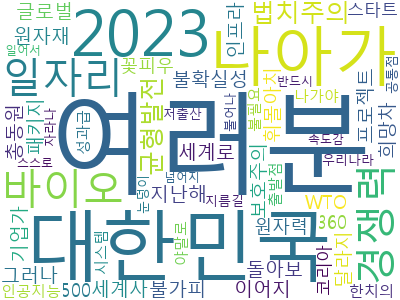

In [826]:
cloud = wc.fit_words(dict(freq_dict))
cloud.to_image()

### (2) Social Network Analysis
- 개인과 집단들 간의 관계를 노드와 링크로 모델링한 것
    - 집합론적 방법: 각 객체들의 관계를 관계 쌍으로 표현
    - 그래프 이론 방법: Node와 Link로 표현
    - 행렬 방법: 행렬로 표현. 연결되어 있으면 1, 없으면 0 -> 분석하기 편해서 자주 사용

- 중심성 척도
    - 연결정도 중심성: 한 노드에 직접적으로 연결된 노드들의 합
    - 근접 중심성: 노드 간 거리 측정. 간접적으로 연결된 모든 노드 간의 거리를 합산
    - 매개 중심성: 한 노드가 담당하는 매개/중재 역할의 정도
    - 위세 중심성: 연결된 노드의 중요성에 가중치를 둠
    

In [827]:
sample_n = 30

In [828]:
### 단어 간 연관성 분석
tdm_T = tdm.T

In [829]:
tdm_T = tdm_T.toarray()[:sample_n, :5000]
tdm_T.shape

(30, 5000)

In [830]:
tdm_T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [831]:
# 값 출현 빈도로 전환
tdm_T = np.where(tdm_T > 0, 1, 0)

In [832]:
# 행렬곱
term_matrix = np.dot(tdm_T, tdm_T.T)

In [833]:
term_matrix_df = pd.DataFrame(term_matrix, columns=words[:sample_n], index=words[:sample_n])
term_matrix_df.head()

10  100  12  20  2023  42  abil  abl  academ  access  ...  ai  allow  \
10    63    4   1   2     0   2     0    0       1       0  ...   7      0   
100    4   30   0   0     0   1     0    0       0       0  ...   5      0   
12     1    0  23   0     2   0     0    0       0       1  ...   9      0   
20     2    0   0  21     2   0     0    2       0       0  ...   6      0   
2023   0    0   2   2    53   1     1    0       0       0  ...  16      0   

      alreadi  altern  alway  amaz  amp  analysi  ani  announc  
10          1       0      0     0    1        0    0        1  
100         1       0      1     0    3        0    0        0  
12          0       0      2     0    1        0    0        1  
20          0       0      2     0    0        0    1        1  
2023        0       0      0     1    3        0    1        0  

[5 rows x 30 columns]

In [834]:
sources = list()
targets = list()
weights = list()

# build the graph
for i in term_matrix_df.columns:
    index = term_matrix_df.loc[:, i].index
    for j in index:
        sources.append(i)
        targets.append(j)
        weights.append(term_matrix_df.loc[j, i])

In [835]:
edges = pd.DataFrame()

edges['source'] = pd.DataFrame(sources)
edges['target'] = pd.DataFrame(targets)
edges['weight'] = pd.DataFrame(weights)

In [836]:
edges = edges[edges['weight'] > 1]
edges = edges[edges['source'] != edges['target']]

In [837]:
import networkx as nx

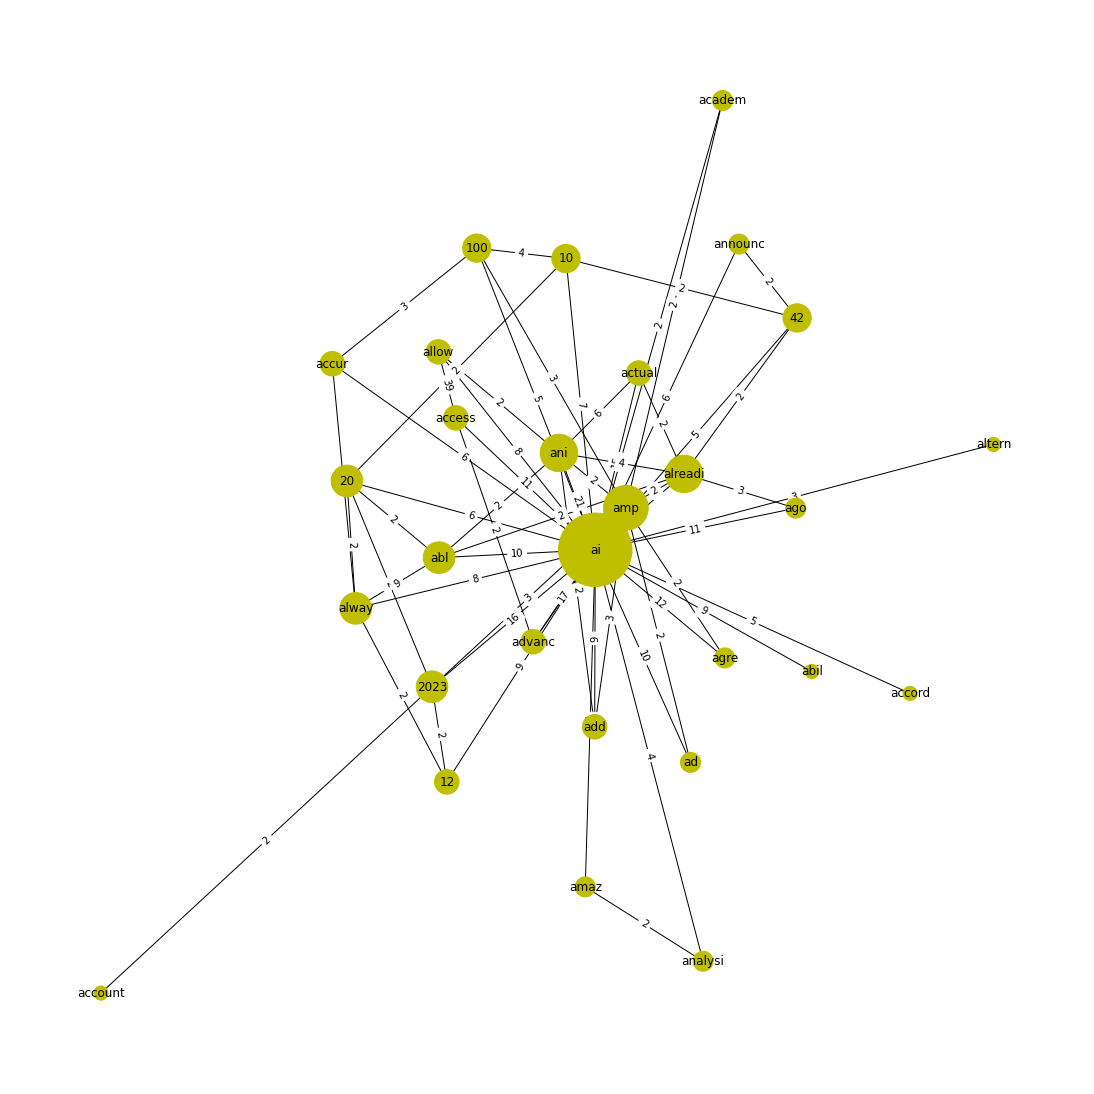

In [838]:
G = nx.from_pandas_edgelist(edges, edge_attr='weight')
# G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
weight = nx.get_edge_attributes(G, 'weight')
degree = nx.degree(G)

nx.draw(G, pos, with_labels=True, node_size=[v * 200 for v in dict(degree).values()], node_color='y')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)

plt.show()

In [839]:
# node의 degree
nx.degree(G)

DegreeView({'10': 4, '100': 4, '20': 5, '42': 4, 'ai': 27, 'accur': 3, 'amp': 10, '12': 3, '2023': 5, 'alway': 5, 'abl': 5, 'account': 1, 'alreadi': 7, 'announc': 2, 'abil': 1, 'ani': 7, 'academ': 2, 'access': 3, 'advanc': 3, 'allow': 3, 'accord': 1, 'actual': 3, 'ad': 2, 'add': 3, 'ago': 2, 'agre': 2, 'altern': 1, 'amaz': 2, 'analysi': 2})

In [840]:
# 밀집도
nx.density(G)

0.15024630541871922

In [841]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('ai', 0.9655172413793104),
 ('amp', 0.6086956521739131),
 ('alreadi', 0.56),
 ('ani', 0.56),
 ('20', 0.5490196078431373)]

In [842]:
### Twitter connections
tw_mentioned = text_df[text_df.MentionedUsers.notna()]
tw_mentioned.shape

(12450, 19)

In [843]:
tw_data = pd.DataFrame()
tw_data['names'] = tw_mentioned['Username']
tw_data['mentions'] = tw_mentioned['MentionedUsers']

In [844]:
for i in tw_data.index:
    mention_list = list()
    for user in tw_data['mentions'][i].split(', User'):
        mention_list.append(user.split(',')[0].split('=')[1].replace("'", ''))
        
    tw_data['mentions'][i] = mention_list

In [845]:
tw_data.reset_index(inplace=True, drop=True)
tw_data

names                        mentions
0      Caput_LupinumSG               [AlexandrovnaIng]
1           xlr8harder                      [SWENGDAD]
2           WesHellyar         [Slipcatch, nickhedley]
3      ACAPITALGROUP17                        [paulgp]
4        JoycemwangiKE                     [FrankDeya]
...                ...                             ...
12445      savagesazid  [getpeid, Irenezhao_, getpeid]
12446     sinitzelcisi        [AIPADTECH, moonsalecom]
12447   khaled_awad098        [AIPADTECH, moonsalecom]
12448        bellia_us                 [iamjohnoliver]
12449     IAmKarlMarks               [Twitter, OpenAI]

[12450 rows x 2 columns]

In [846]:
weights_dict = dict()

# build the graph
for i in tw_data.index:
    for mention in tw_data.mentions[i]:
        try:
            weights_dict[f'{mention}-{tw_data.names[i]}'] += 1
        except KeyError:
            weights_dict[f'{mention}-{tw_data.names[i]}'] = 1

In [847]:
sources = list()
targets = list()
weights = list()
for i in weights_dict.keys():
    sources.append(i.split('-')[1])
    targets.append(i.split('-')[0])
    
    weights.append(weights_dict[i])

In [848]:
edges = pd.DataFrame()

edges['source'] = pd.DataFrame(sources)
edges['target'] = pd.DataFrame(targets)
edges['weight'] = pd.DataFrame(weights)

In [849]:
edges = edges[edges['weight'] > 3]
edges

source        target  weight
216             igblan  adrianbowyer       4
647           Omedalus   DavidRozado       4
658        robbezdjian      GRDecter       6
744    saqlainhaidar16   Charles_SEO       6
900          lisperati  shawnwillden       5
...                ...           ...     ...
14008   Drewshearer444     EFisherWX       4
14046   WhateverCallMe      LinkedIn       5
15127       Roooaaarrr      jtrain56       4
15911         fermonte     KimZetter       4
17134   harshul_bhatia        zomato       4

[78 rows x 3 columns]

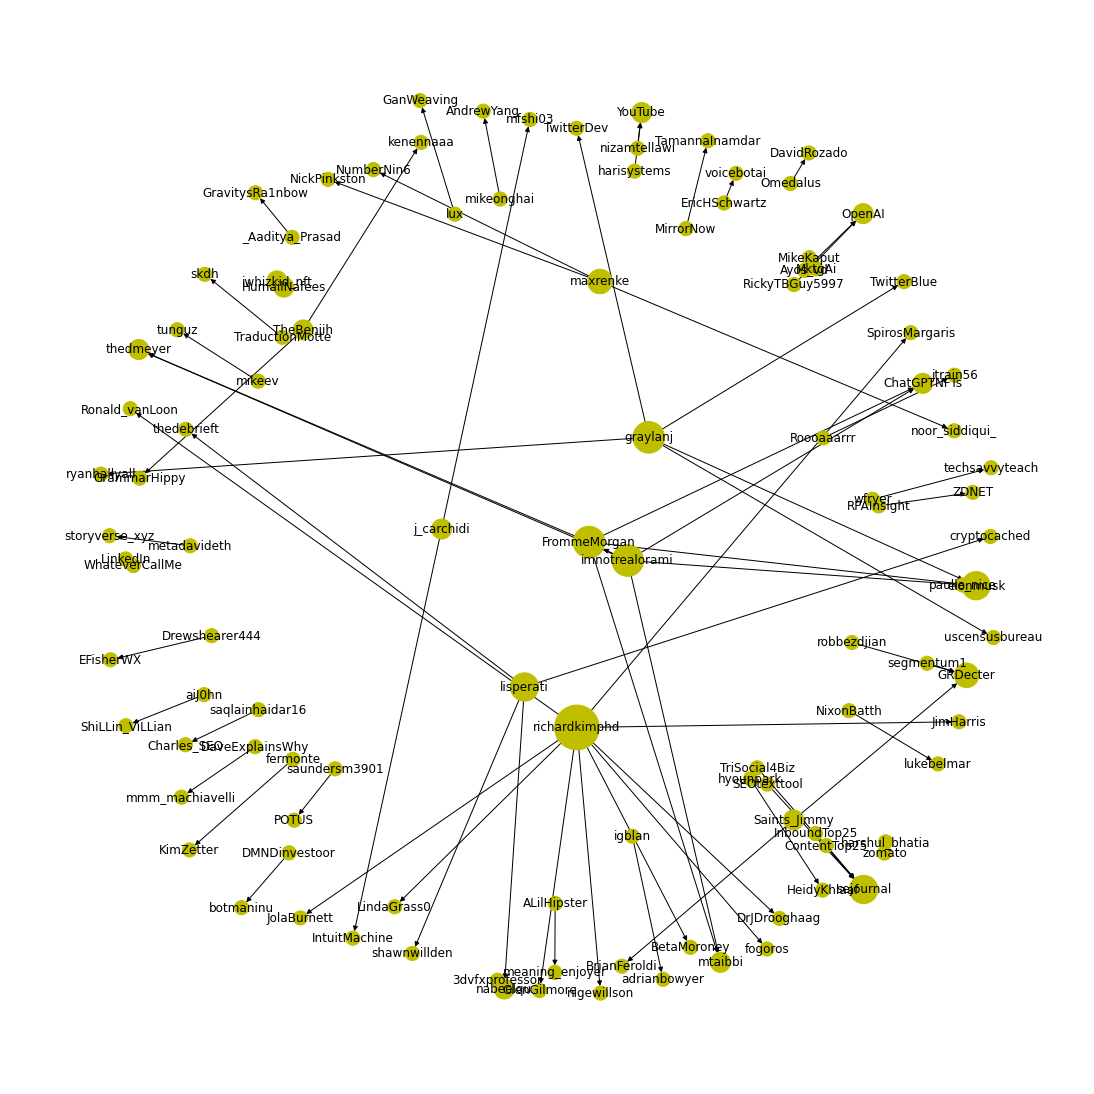

In [850]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, edge_attr='weight', create_using=nx.DiGraph())
G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
degree = nx.degree(G)

nx.draw(G, pos, with_labels=True, node_size=[v * 200 for v in dict(degree).values()], node_color='y')
plt.show()

In [851]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('elonmusk', 0.037037037037037035),
 ('sejournal', 0.037037037037037035),
 ('GRDecter', 0.027777777777777776),
 ('nabeelqu', 0.018518518518518517),
 ('YouTube', 0.018518518518518517)]

In [852]:
### Grey data
ga_data = pd.read_csv('./data/ga_edgelist.csv')
ga_data.head()

from      to
0   lexi   sloan
1   lexi   karev
2   owen    yang
3   owen  altman
4  sloan  torres

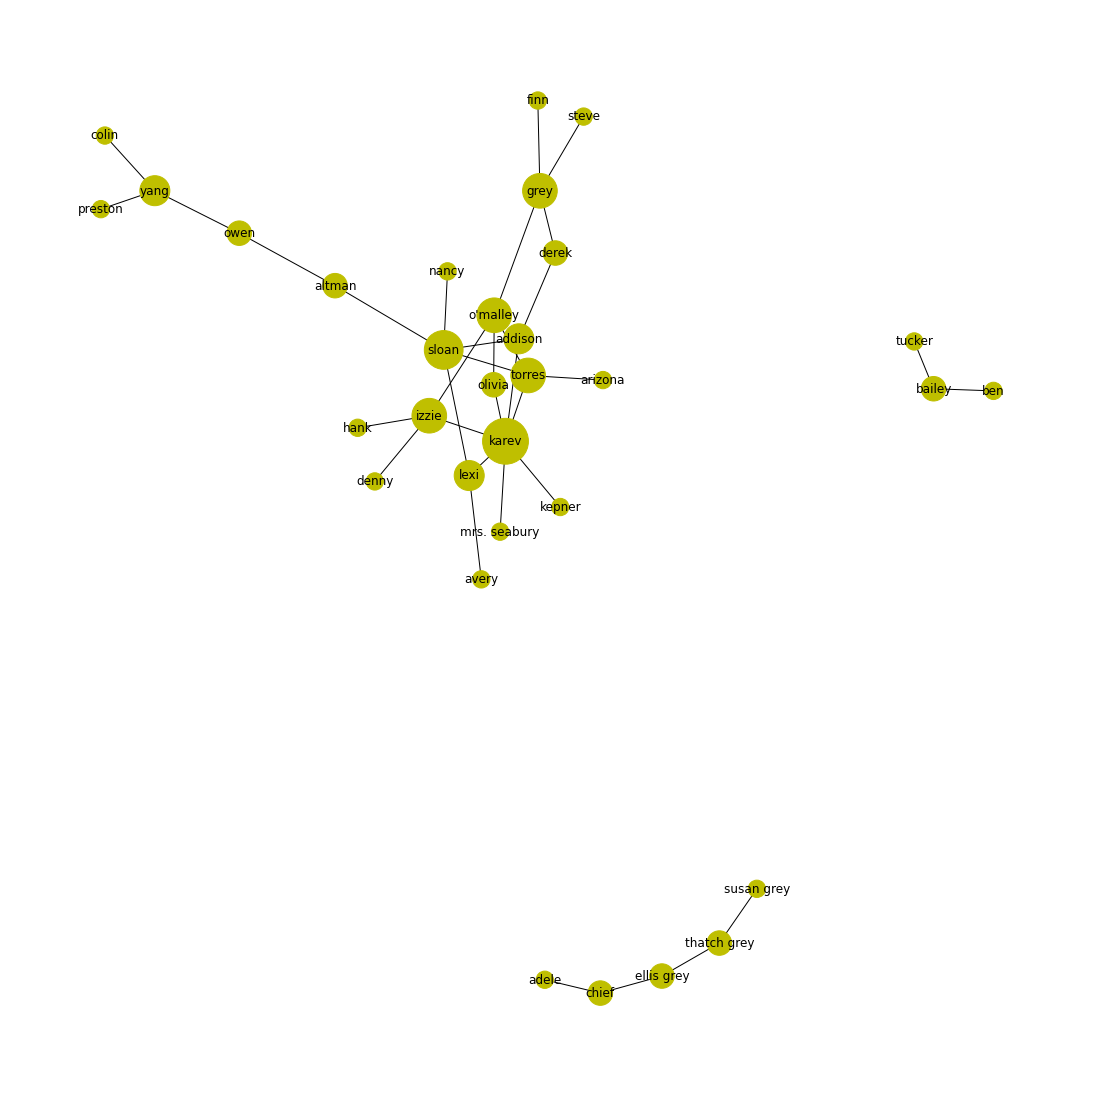

In [853]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(ga_data, source='from', target='to')

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
degree = nx.degree(G)

nx.draw(G, pos, with_labels=True, node_size=[v * 300 for v in dict(degree).values()], node_color='y')
plt.show()

In [854]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('torres', 0.29937747594793435),
 ('sloan', 0.2892290869327502),
 ('karev', 0.2892290869327502),
 ('addison', 0.2892290869327502),
 ("o'malley", 0.2708653353814644)]